 Fontes (5 datasets)

> Datasets Kaggle
fonte: https://www.kaggle.com/komalkhetlani/out-of-school-rates-global-data/version/2?select=Lower+Secondary.csv
fonte original: https://data.unicef.org/topic/education/overview/

> Nome das regiões 
fonte: https://apps.who.int/gho/data/node.searo-metadata.WORLDBANKREGION?lang=en

> IDH de países e regiões
fonte: http://hdr.undp.org/en/indicators/137506#

> Pib per capita
fonte:https://data.worldbank.org/indicator/NY.GDP.PCAP.KD

In [10]:
# instalações
!pip install plotly

In [11]:
# importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [12]:
# importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

 ## Exposição do case: ***TAXA DE CRIANÇAS FORA DA ESCOLA***
A educação tem o papel crítico no desenvolvimento das crianças do futuro e, em última análise, no desenvolvimento de um país. A **Unicef** coletou formulários nos últimos **10 anos** para calcular a taxa de presença. Esse dataset pode ser utilizado para gerar insights sobre a **taxa de crianças fora das escolas** entre diversas localidades. Além disso, foram utilizados 2 datasets extras para ter mais informações sobre o nome da região e seu índice de desenvolvimento.

Entre os datasets temos 3 graus de ensino: 
 - **Primário 5-10 anos** (Primary) 👶🏾
 - **Ensino Fundamental 10-15 anos** (Lower Secondary) 👦🏻
 - **Ensino Médio 15-18 anos** (Upper Secondary) 👱🏻‍♂️
 
Obs.:  A taxa de crianças fora da escola pode ser interpretada como o oposto da taxa de escolarização líquida. A Taxa de Escolarização Líquida representa a razão entre o número de matrículas de alunos com idade prevista para estar cursando determinada etapa de ensino e a população total na mesma faixa etária. Ou seja, a taxa de crianças fora da escola é o percentual de crianças com idade prevista em determinada etapa de ensino que não está na escola.

In [13]:
# lendo os datasets de educação Kaggle
pr = pd.read_csv("Primary.csv", sep=",", encoding="ISO-8859-1")
ls = pd.read_csv("Lower_Secondary.csv", sep=",", encoding="ISO-8859-1")
us = pd.read_csv("Upper_Secondary.csv", sep=",", encoding="ISO-8859-1")

# lendos os datasets de regiões e IDH que serão adicionados no original
regioes = pd.read_csv("data-verbose.csv", sep=",", names=["worldbank", "id_regiao", "regiao"], encoding="ISO-8859-1")
idh = pd.read_csv("Human Development Index (HDI).csv", sep=",", usecols=["HDI Rank", "Country", "2019"], skiprows=5, encoding="ISO-8859-1")
pib = pd.read_csv("pib_per_capita.csv", sep=",", usecols=["Country Name", "Country Code", "2019"], skiprows=4, encoding="ISO-8859-1")

In [14]:
pr.head(3) #primário

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   37.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    2.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    47.0  28.0             42.0             19.0                     42.0   
1     2.0   3.0              4.0              1.0                      4.0   
2     2.0   2.0              2.0              2.0                      3.0   

   Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
0                    47.0                    46.0                    32.0   
1                     3.0                     2.0                     2.0   
2                     2.0                     2.0                     2.0   

   Richest_Wealth quintile   Data source  Time period  
0                     16.0      DHS 2015       2015.0  
1                      1.0   DHS 2017-18       2018.0  
2                      1.0  MICS 2012-13       2013.0

In [15]:
ls.head(3) #ensino fundamental

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   40.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    6.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    56.0  25.0             46.0             23.0                     50.0   
1     2.0   2.0              2.0              2.0                      4.0   
2     6.0   5.0              8.0              4.0                     12.0   

   Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
0                    48.0                    49.0                    33.0   
1                     2.0                     2.0                     1.0   
2                     6.0                     5.0                     3.0   

   Richest_Wealth quintile   Data source  Time period  
0                     21.0      DHS 2015       2015.0  
1                      1.0   DHS 2017-18       2018.0  
2                      2.0  MICS 2012-13       2013.0

In [16]:
us.head(3) #ensino médio

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   58.0   
1  ALB             Albania    ECA       EECA      More Developed   12.0   
2  DZA             Algeria   MENA       MENA      Less Developed   25.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    73.0  43.0             63.0             45.0                     70.0   
1    12.0  12.0             16.0              9.0                     27.0   
2    23.0  28.0             33.0             21.0                     40.0   

   Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
0                    64.0                    64.0                    54.0   
1                    11.0                    11.0                     5.0   
2                    29.0                    24.0                    20.0   

   Richest_Wealth quintile   Data source  Time period  
0                     40.0      DHS 2015       2015.0  
1                      5.0   DHS 2017-18       2018.0  
2                     12.0  MICS 2012-13       2013.0

### Campos dos datasets:

- ISO3: Abreviação do país
- Countries and areas: Países e regiões
- Region: Nome da região
- Sub-region: Nome da sub-região
- Development Regions: O quanto essa região é desenvolvida
- Total: % crianças fora da escola
- Female: % das meninas que responderam que estavam fora da escola
- Male: % dos meninos que responderam que estavam fora da escola
- Rural_Residence: % de crianças fora da escola e que residem na área rural
- Urban_Residence: % de crianças fora da escola e que residem na área urbana
- Quintile: % de crianças que estão em determinado quintil de renda 
(*Poorest* indica a % das crianças que caem no quintil Mais Pobres de riqueza) 
- Time period: ano da coleta de dados

Atualmente, as economias estão divididas em quatro agrupamentos de renda:
low, lower-middle, upper-middle, and high

### A base contém dados de crianças que não estão na escola em países de várias regiões no globo classificadas conforme abaixo:

 - EAP: Leste da Ásia e países banhados pelo oceano Pacífico
 - ECA: Europa e Ásia Central
 - EECA: Leste da Europa e Ásia Central
 - ESA: Leste e Sul da África
 - LAC: América Latina e Caribe
 - MENA: Centroeste e sul da África
 - NA: América do Norte
 - SA: Sul da Ásia
 - SSA: África subsaariana
 - WCA: Oeste e centro da África

### Visão geral dos datasets: 

 - Todos os dados são de alunos que estão fora da escola

 - A Taxa de Escolarização Líquida representa a razão entre o número de matrículas de alunos com idade prevista (seis ou sete a 14 anos de idade) para estar cursando determinada etapa de ensino e a população total na mesma faixa etária.

 - A base foi dividida em quintil por faixa de renda, cada número dos quintis representa o percentual de alunos que não está na escola daquela determinada faixa de renda.

 - Os 3 datasets têm **202 linhas e 17 colunas cada**

### Objetivos: 🎯🎯

Neste projeto, faremos um estudo investigativo a fim de identificar fatores que influenciam na evasão e matrícula em escolas das regiões mencionadas acima e sua correlação, considerando os anos de 2016 a 2019. Para isso, serão feitas as seguintes etapas: 

1) Tratamento dos datasets extras
2) Análise Primary (*Análise exploratória*, *limpeza e tratamento dos dados* e *exploração dos dados* levando em conta os seguintes fatores do dataframe: **Região, Gênero, Condição Financeira e Escala de desenvolvimento da região**)
3) Análise Lower Secondary (*Análise exploratória*, *limpeza e tratamento dos dados* e *exploração dos dados* levando em conta os seguintes fatores do dataframe: **Região, Gênero, Condição Financeira e Escala de desenvolvimento da região**)
4) Análise Upper Secondary (*Análise exploratória*, *limpeza e tratamento dos dados* e *exploração dos dados* levando em conta os seguintes fatores do dataframe: **Região, Gênero, Condição Financeira e Escala de desenvolvimento da região**)
5) Conclusão e resultados

## 1) Tratamento dos datasets extras - Pedro 🎲👨‍💻

In [17]:
# Tratamento REGIÕES

# Filtrando para o que temos nos datasets
regioes.drop(2, axis=0, inplace=True)
regioes.drop(["worldbank"], axis = 1, inplace=True)
regioes = regioes.iloc[0:6].reset_index().drop(["index"], axis=1)

# Adicionando coluna númerica para o índice de desenvolvimento
desenv_regioes = pd.DataFrame({'id_desenvolvimento_regiao' : [0, 1, 2, 3],
                               'desenvolvimento_regiao' : ['Not Classified', 'Least Developed', 'Less Developed', 'More Developed']
                               })

# Tratamento DADOS IDH

# Corrigindo os nomes de acordo com o nosso DF e limpando nulos

idh.loc[196, "Country"] = "Middle East and North Africa"
idh.loc[197, "Country"] = "East Asia and Pacific"
idh.loc[199, "Country"] = "Latin America and Caribbean"

idh.dropna(axis=0, how="all", inplace=True)

idh.rename(columns={"Country": "pais_regiao", "2019" : "idh_2019"}, inplace=True)


# Removendo espaços dos nomes dos países para poder fazer merge

lista_paises = idh["pais_regiao"].tolist()

for i in range(len(lista_paises)):
    lista_paises[i] = lista_paises[i].strip()

idh.replace(idh["pais_regiao"].tolist(), lista_paises, inplace=True)


# Mudando o tipo dos dados da coluna idh_2019 de string para float

lista_idh = pd.to_numeric(idh['idh_2019'], errors="coerce", downcast="float")

idh.replace(idh["idh_2019"].tolist(), lista_idh, inplace=True)


# Tratamento PIB PER CAPITA

pib.rename(columns={"2019": "pib_per_capita_2019"}, inplace=True)
pib.loc[204, "Country Code"] = "SA"
pib.loc[153, "Country Code"] = "MENA"

In [18]:
regioes

id_regiao                        regiao
0       EAP         East Asia and Pacific
1       ECA       Europe and Central Asia
2       LAC   Latin America and Caribbean
3      MENA  Middle East and North Africa
4        SA                    South Asia
5       SSA            Sub-Saharan Africa

In [19]:
idh

HDI Rank                                        pais_regiao  idh_2019
0        169                                        Afghanistan     0.511
1         69                                            Albania     0.795
2         91                                            Algeria     0.748
3         36                                            Andorra     0.868
4        148                                             Angola     0.581
..       ...                                                ...       ...
201                                          Sub-Saharan Africa     0.547
202                                   Least Developed Countries     0.538
203                              Small Island Developing States     0.728
204           Organization for Economic Co-operation and Dev...     0.900
205                                                       World     0.737

[206 rows x 3 columns]

In [20]:
pib

Country Name Country Code  pib_per_capita_2019
0                          Aruba          ABW                  NaN
1    Africa Eastern and Southern          AFE          1499.256275
2                    Afghanistan          AFG           577.563058
3     Africa Western and Central          AFW          1843.558468
4                         Angola          AGO          3458.650512
..                           ...          ...                  ...
261                       Kosovo          XKX          4256.053173
262                  Yemen, Rep.          YEM                  NaN
263                 South Africa          ZAF          5574.643890
264                       Zambia          ZMB          1348.743220
265                     Zimbabwe          ZWE          1367.676915

[266 rows x 3 columns]

## 2) Análise Primary

### Análise Exploratória - Pedro 📊🔎📈

In [21]:
pr.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   37.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    2.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   22.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    47.0  28.0             42.0             19.0                     42.0   
1     2.0   3.0              4.0              1.0                      4.0   
2     2.0   2.0              2.0              2.0                      3.0   
3     NaN   NaN              NaN              NaN                      NaN   
4    22.0  21.0             35.0             14.0                     39.0   

   Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
0                    47.0                    46.0                    32.0   
1                     3.0                     2.0                     2.0   
2                     2.0                     2.0                     2.0   
3                     NaN                     NaN                     NaN   
4                    33.0                    19.0                    12.0   

   Richest_Wealth quintile   Data source  Time period  
0                     16.0      DHS 2015       2015.0  
1                      1.0   DHS 2017-18       2018.0  
2                      1.0  MICS 2012-13       2013.0  
3                      NaN           NaN          NaN  
4                      5.0   DHS 2015-16       2016.0

In [22]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     202 non-null    object 
 1   Countries and areas      202 non-null    object 
 2   Region                   200 non-null    object 
 3   Sub-region               200 non-null    object 
 4   Development Regions      202 non-null    object 
 5   Total                    112 non-null    float64
 6   Female                   112 non-null    float64
 7   Male                     112 non-null    float64
 8   Rural_Residence          109 non-null    float64
 9   Urban_Residence          109 non-null    float64
 10  Poorest_Wealth quintile  103 non-null    float64
 11  Second_Wealth quintile   103 non-null    float64
 12  Middle_Wealth quintile   103 non-null    float64
 13  Fourth_Wealth quintile   103 non-null    float64
 14  Richest_Wealth quintile  1

In [23]:
pr.describe()

Total      Female        Male  Rural_Residence  Urban_Residence  \
count  112.000000  112.000000  112.000000       109.000000       109.000000   
mean    10.160714   10.357143   10.017857        12.321101         5.889908   
std     13.637226   14.520478   12.971891        16.380250         7.763089   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.750000    2.000000    2.000000         2.000000         1.000000   
50%      4.000000    3.000000    4.000000         5.000000         3.000000   
75%     15.250000   14.250000   15.000000        19.000000         7.000000   
max     72.000000   75.000000   70.000000        78.000000        56.000000   

       Poorest_Wealth quintile  Second_Wealth quintile  \
count               103.000000              103.000000   
mean                 17.650485               13.000000   
std                  20.584931               17.414778   
min                   0.000000                0.000000   
25%                   2.000000                2.000000   
50%                   8.000000                4.000000   
75%                  32.000000               21.000000   
max                  86.000000               84.000000   

       Middle_Wealth quintile  Fourth_Wealth quintile  \
count              103.000000              103.000000   
mean                 9.932039                7.281553   
std                 14.955661               11.614239   
min                  0.000000                0.000000   
25%                  1.000000                1.000000   
50%                  3.000000                3.000000   
75%                 14.000000                6.500000   
max                 77.000000               65.000000   

       Richest_Wealth quintile  Time period  
count               103.000000   112.000000  
mean                  3.864078  2015.455357  
std                   6.082841     2.581599  
min                   0.000000  2010.000000  
25%                   1.000000  2013.750000  
50%                   2.000000  2016.000000  
75%                   4.000000  2018.000000  
max                  44.000000  2019.000000

### Limpeza e tratamento dos dados - Mari 🧹🎲

Nós começamos adicionando os datasets extras já tratados no nosso dataset original.

In [24]:
# Adicionando datasets de informações e idh no dataframe Primary
pr_original = pr
pr = pr.merge(regioes[["id_regiao", "regiao"]], how='left', left_on='Region', right_on='id_regiao')
pr = pr.merge(desenv_regioes, how='left', left_on='Development Regions', right_on='desenvolvimento_regiao')
pr = pr.merge(idh, how='left', left_on='Countries and areas', right_on='pais_regiao')
pr = pr.merge(pib[["Country Code", "pib_per_capita_2019"]], how="left", left_on="ISO3", right_on="Country Code").drop(["Country Code"], axis=1)

pr_mesclado = pr.copy() #plotar o gráfico comparativo

pr.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   37.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    2.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   22.0   

   Female  Male  Rural_Residence  Urban_Residence  ...   Data source  \
0    47.0  28.0             42.0             19.0  ...      DHS 2015   
1     2.0   3.0              4.0              1.0  ...   DHS 2017-18   
2     2.0   2.0              2.0              2.0  ...  MICS 2012-13   
3     NaN   NaN              NaN              NaN  ...           NaN   
4    22.0  21.0             35.0             14.0  ...   DHS 2015-16   

   Time period  id_regiao                        regiao  \
0       2015.0         SA                    South Asia   
1       2018.0        ECA       Europe and Central Asia   
2       2013.0       MENA  Middle East and North Africa   
3          NaN        ECA       Europe and Central Asia   
4       2016.0        SSA            Sub-Saharan Africa   

   id_desenvolvimento_regiao desenvolvimento_regiao  HDI Rank  pais_regiao  \
0                          1        Least Developed       169  Afghanistan   
1                          3         More Developed        69      Albania   
2                          2         Less Developed        91      Algeria   
3                          3         More Developed        36      Andorra   
4                          1        Least Developed       148       Angola   

  idh_2019  pib_per_capita_2019  
0    0.511           577.563058  
1    0.795          4549.457441  
2    0.748          4111.306192  
3    0.868         39003.384448  
4    0.581          3458.650512  

[5 rows x 25 columns]

In [25]:
# Adicionando uma coluna de faixas do total

pr.loc[pr["Total"] <= 10, "Faixa Total"] = "Até 10%"
pr.loc[(pr["Total"] > 10) & (pr["Total"] <= 20), "Faixa Total"] = "Entre 10 e 20%"
pr.loc[(pr["Total"] > 20) & (pr["Total"] <= 30), "Faixa Total"] = "Entre 20 e 30%"
pr.loc[(pr["Total"] > 30) & (pr["Total"] <= 40), "Faixa Total"] = "Entre 30 e 40%"
pr.loc[(pr["Total"] > 40) & (pr["Total"] <= 50), "Faixa Total"] = "Entre 40 e 50%"

pr.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   37.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    2.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   22.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  Time period  \
0    47.0  28.0             42.0             19.0  ...       2015.0   
1     2.0   3.0              4.0              1.0  ...       2018.0   
2     2.0   2.0              2.0              2.0  ...       2013.0   
3     NaN   NaN              NaN              NaN  ...          NaN   
4    22.0  21.0             35.0             14.0  ...       2016.0   

   id_regiao                        regiao  id_desenvolvimento_regiao  \
0         SA                    South Asia                          1   
1        ECA       Europe and Central Asia                          3   
2       MENA  Middle East and North Africa                          2   
3        ECA       Europe and Central Asia                          3   
4        SSA            Sub-Saharan Africa                          1   

   desenvolvimento_regiao HDI Rank  pais_regiao idh_2019 pib_per_capita_2019  \
0         Least Developed      169  Afghanistan    0.511          577.563058   
1          More Developed       69      Albania    0.795         4549.457441   
2          Less Developed       91      Algeria    0.748         4111.306192   
3          More Developed       36      Andorra    0.868        39003.384448   
4         Least Developed      148       Angola    0.581         3458.650512   

      Faixa Total  
0  Entre 30 e 40%  
1         Até 10%  
2         Até 10%  
3             NaN  
4  Entre 20 e 30%  

[5 rows x 26 columns]

Depois, disso nós:
   1) Padronizamos os nomes de países e regiões
   2) Eliminamos as regiões sme nenhum dado, já que não daria para assumir a média
   3) Excluímos países sem dados recentes (2016)

In [26]:
# Tratamento de países e regiões

# Nomeando as regiões desses países
#Canadá
pr['Region'][33]='NA'
pr['Sub-region'][33]='NA'

#USA
pr['Region'][193]='NA'
pr['Sub-region'][193]='NA'

# eliminando regiões sem nenhum dado que não é possível assumir uma média
pr.drop(pr[pr['Sub-region'] == 'WE'].index, inplace=True)
pr.drop(pr[pr['Sub-region'] == 'NA'].index, inplace=True)

pr_pais_com_dados = pr.copy() # plotar o gráfico comparativo

# Exclusão de dados anteriores a 2016

pr = pr[pr["Time period"] >= 2016]


pr.reset_index(inplace=True)
pr.drop(['index'], axis=1, inplace=True) 

pr_pais_com_dados_recente = pr.copy()

In [27]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       61 non-null     object 
 1   Countries and areas        61 non-null     object 
 2   Region                     61 non-null     object 
 3   Sub-region                 61 non-null     object 
 4   Development Regions        61 non-null     object 
 5   Total                      61 non-null     float64
 6   Female                     61 non-null     float64
 7   Male                       61 non-null     float64
 8   Rural_Residence            60 non-null     float64
 9   Urban_Residence            60 non-null     float64
 10  Poorest_Wealth quintile    55 non-null     float64
 11  Second_Wealth quintile     55 non-null     float64
 12  Middle_Wealth quintile     55 non-null     float64
 13  Fourth_Wealth quintile     55 non-null     float64
 

**Considerando um total de 202 Países, a distribuição de dados por área de interesse para preenchimento fica:**

- ISO3, Countries and areas, Region, Sub-region and Development Regions com 202, ou seja, **não tem lacunas e nao vai necessitar preenchimento**.
- *GP1*: Total, Female e Male com 112 dados.
- *GP2*: Rural_Residence, Urban_Residence com 109 dados.
- *GP3*: Poorest_Wealth quintile, Second_Wealth quintile, Middle_Wealth quintile, Fourth_Wealth quintile, Richest_Wealth quintile com 103.
- *GP4*: Data source e Time Period com 112 dados.

In [28]:
# preenchendo espaços vazios
subRegions = pr['Sub-region'].unique()
for i in subRegions:
    pr.loc[pr['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ]= pr.loc[pr['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ].fillna(pr[pr['Sub-region']==i].median().round(1))

In [29]:
# Exclusão de HDI sem informações

pr.dropna(subset=["HDI Rank"], inplace=True)

In [30]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       58 non-null     object 
 1   Countries and areas        58 non-null     object 
 2   Region                     58 non-null     object 
 3   Sub-region                 58 non-null     object 
 4   Development Regions        58 non-null     object 
 5   Total                      58 non-null     float64
 6   Female                     58 non-null     float64
 7   Male                       58 non-null     float64
 8   Rural_Residence            58 non-null     float64
 9   Urban_Residence            58 non-null     float64
 10  Poorest_Wealth quintile    58 non-null     float64
 11  Second_Wealth quintile     58 non-null     float64
 12  Middle_Wealth quintile     58 non-null     float64
 13  Fourth_Wealth quintile     58 non-null     float64
 

In [31]:
pr.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  ALB             Albania    ECA       EECA      More Developed    2.0   
1  AGO              Angola    SSA        ESA     Least Developed   22.0   
2  ARM             Armenia    ECA       EECA      Less Developed    5.0   
3  BGD          Bangladesh     SA         SA     Least Developed    6.0   
4  BLZ              Belize    LAC        LAC      Less Developed    2.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  Time period  \
0     2.0   3.0              4.0              1.0  ...       2018.0   
1    22.0  21.0             35.0             14.0  ...       2016.0   
2     4.0   5.0              6.0              3.0  ...       2016.0   
3     5.0   8.0              6.0              6.0  ...       2019.0   
4     2.0   2.0              3.0              1.0  ...       2016.0   

   id_regiao                       regiao  id_desenvolvimento_regiao  \
0        ECA      Europe and Central Asia                          3   
1        SSA           Sub-Saharan Africa                          1   
2        ECA      Europe and Central Asia                          2   
3         SA                   South Asia                          1   
4        LAC  Latin America and Caribbean                          2   

   desenvolvimento_regiao HDI Rank  pais_regiao idh_2019 pib_per_capita_2019  \
0          More Developed       69      Albania    0.795         4549.457441   
1         Least Developed      148       Angola    0.581         3458.650512   
2          Less Developed       81      Armenia    0.776         4350.466198   
3         Least Developed      133   Bangladesh    0.632         1603.953501   
4          Less Developed      110       Belize    0.716         4701.089242   

      Faixa Total  
0         Até 10%  
1  Entre 20 e 30%  
2         Até 10%  
3         Até 10%  
4         Até 10%  

[5 rows x 26 columns]

Depois da limpeza e preenchimentos dos dados, esse foi o aproveitamento que tivemos do nosso dataset original:

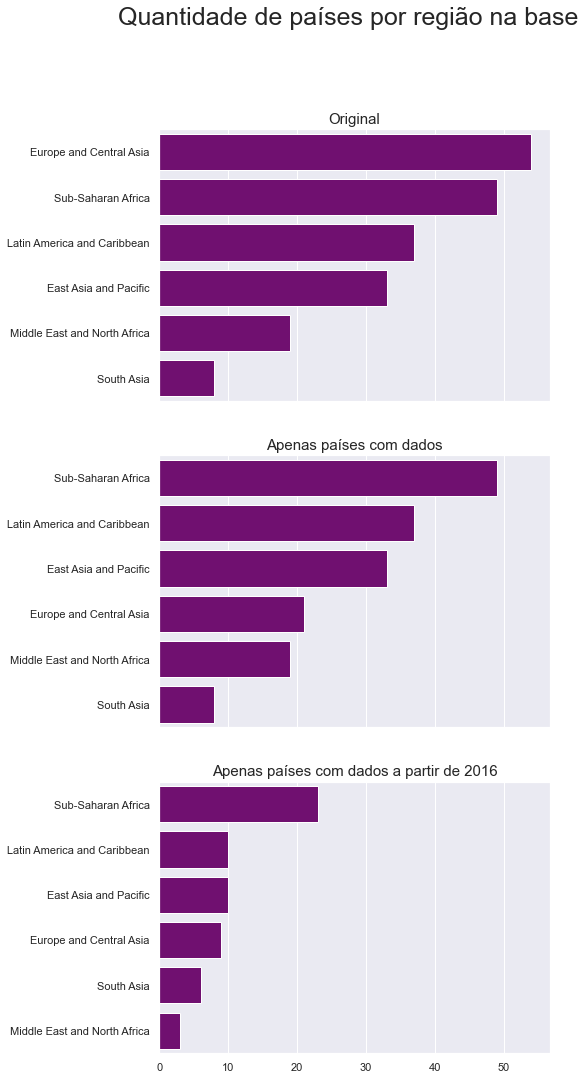

In [32]:
# Gráfico do aproveitamento dos dados

dfs_infos = {0 : [pr_mesclado, "Original", "IDH 2019"],
             1 : [pr_pais_com_dados, "Apenas países com dados", None],
             2 : [pr_pais_com_dados_recente, "Apenas países com dados a partir de 2016", None]}


fig, axs = plt.subplots(3, 1, sharex=True,  figsize=(7,17)) 
fig.suptitle("Quantidade de países por região na base", fontsize=25)


for i in dfs_infos.keys():

    df = dfs_infos[i][0]
    subtitulo = dfs_infos[i][1]
    y_label = dfs_infos[i][2]

    sns.countplot(ax=axs[i], y="regiao", data=df, color="purple", order=df['regiao'].value_counts().index)
    sns.set_style("darkgrid")
    axs[i].set_title(subtitulo, fontsize=15)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)

plt.show()

In [33]:
# organizando o novo dataframe tratado
pr.drop(['desenvolvimento_regiao', 'pais_regiao', 'id_regiao', 'Data source'], axis=1, inplace=True)
pr.to_csv('pr_tratados.csv', index=False)

### Análise dos dados - Thomaz 🔎🎲

#### Análise geral 📊📉📈

In [34]:
# importando e lendo o dataframe modificado
pr_tratados = pd.read_csv('pr_tratados.csv')
pr_tratados.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  ALB             Albania    ECA       EECA      More Developed    2.0   
1  AGO              Angola    SSA        ESA     Least Developed   22.0   
2  ARM             Armenia    ECA       EECA      Less Developed    5.0   
3  BGD          Bangladesh     SA         SA     Least Developed    6.0   
4  BLZ              Belize    LAC        LAC      Less Developed    2.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  \
0     2.0   3.0              4.0              1.0  ...   
1    22.0  21.0             35.0             14.0  ...   
2     4.0   5.0              6.0              3.0  ...   
3     5.0   8.0              6.0              6.0  ...   
4     2.0   2.0              3.0              1.0  ...   

   Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
0                     2.0                     2.0                      1.0   
1                    19.0                    12.0                      5.0   
2                     6.0                     3.0                      2.0   
3                     5.0                     6.0                      4.0   
4                     1.0                     1.0                      0.0   

   Time period                       regiao  id_desenvolvimento_regiao  \
0       2018.0      Europe and Central Asia                          3   
1       2016.0           Sub-Saharan Africa                          1   
2       2016.0      Europe and Central Asia                          2   
3       2019.0                   South Asia                          1   
4       2016.0  Latin America and Caribbean                          2   

  HDI Rank  idh_2019  pib_per_capita_2019     Faixa Total  
0       69     0.795          4549.457441         Até 10%  
1      148     0.581          3458.650512  Entre 20 e 30%  
2       81     0.776          4350.466198         Até 10%  
3      133     0.632          1603.953501         Até 10%  
4      110     0.716          4701.089242         Até 10%  

[5 rows x 22 columns]

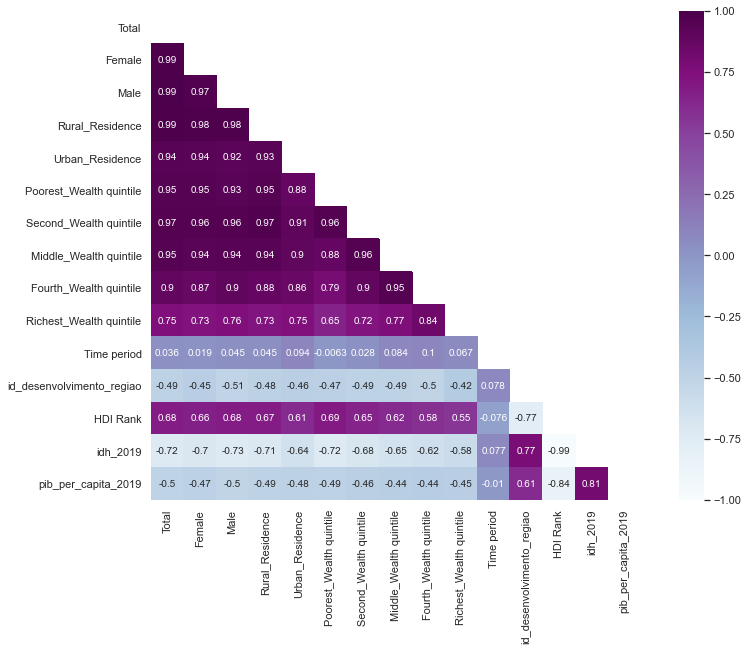

In [35]:
# Gráfico correlacional
corr = pr_tratados.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 9))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, center=0, cmap="BuPu", square=True)

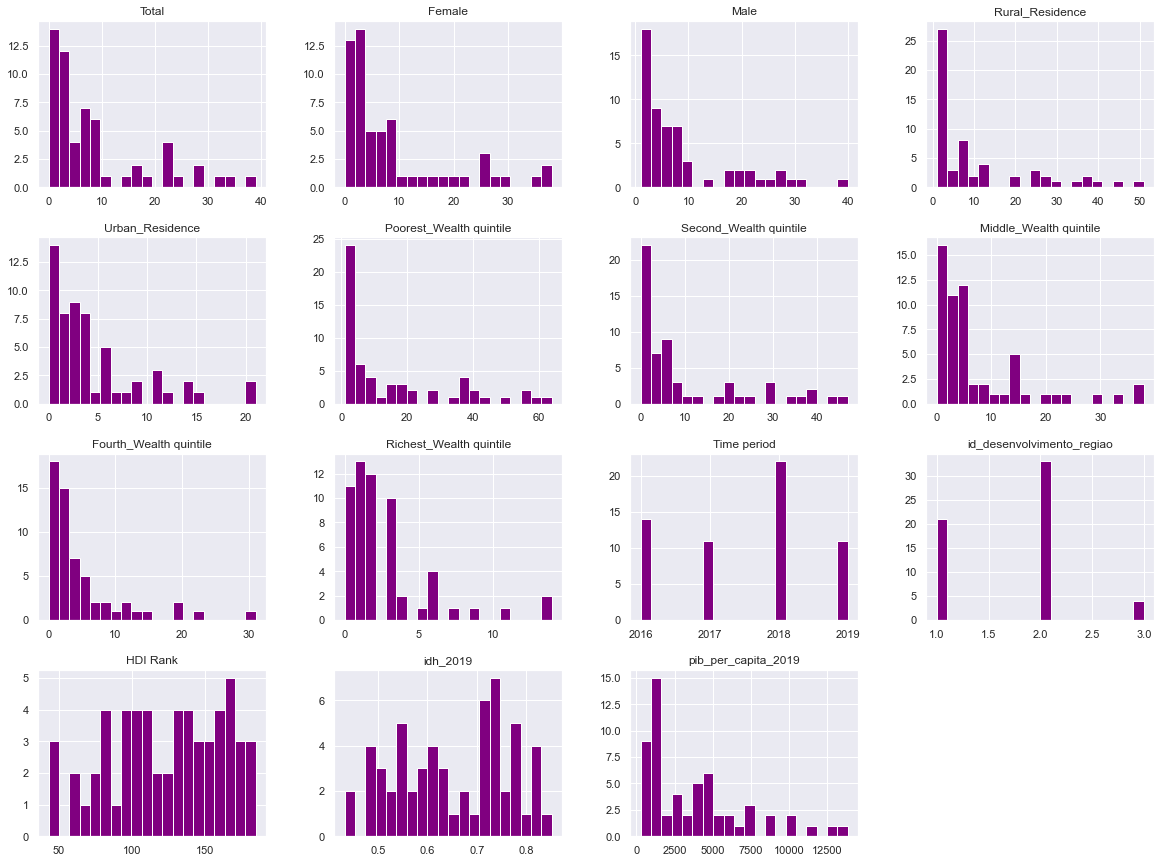

In [36]:
# plotagem de gráfico
pr_tratados.hist(bins=20, figsize=(20, 15), color="purple")
plt.show;

In [37]:
# piores países em relação a taxa de evasão (Total)
Piores10_pr=pr_tratados.sort_values(by=['Total'], ascending=False).head(10)
Piores10_pr

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
43  SEN             Senegal    SSA        WCA     Least Developed   39.0   
17  GIN              Guinea    SSA        WCA     Least Developed   34.0   
5   BEN               Benin    SSA        WCA     Least Developed   32.0   
37  NGA             Nigeria    SSA        WCA      Less Developed   28.0   
18  GNB       Guinea-Bissau    SSA        WCA     Least Developed   28.0   
14  ETH            Ethiopia    SSA        ESA     Least Developed   25.0   
39  PAK            Pakistan     SA         SA      Less Developed   23.0   
12  CIV       Côte d'Ivoire    SSA        WCA      Less Developed   23.0   
1   AGO              Angola    SSA        ESA     Least Developed   22.0   
29  MDG          Madagascar    SSA        ESA     Least Developed   22.0   

    Female  Male  Rural_Residence  Urban_Residence  ...  \
43    38.0  40.0             51.0             20.0  ...   
17    37.0  31.0             44.0             14.0  ...   
5     35.0  28.0             38.0             21.0  ...   
37    29.0  27.0             39.0             11.0  ...   
18    26.0  29.0             36.0             11.0  ...   
14    25.0  26.0             27.0              9.0  ...   
39    27.0  19.0             28.0             12.0  ...   
12    26.0  21.0             29.0             15.0  ...   
1     22.0  21.0             35.0             14.0  ...   
29    19.0  24.0             24.0             11.0  ...   

    Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
43                    37.0                    31.0                     14.0   
17                    38.0                    22.0                     11.0   
5                     30.0                    15.0                      7.0   
37                    17.0                     6.0                      3.0   
18                    34.0                    19.0                      6.0   
14                    22.0                    19.0                      9.0   
39                    14.0                     8.0                      4.0   
12                    23.0                    13.0                      6.0   
1                     19.0                    12.0                      5.0   
29                    14.0                     7.0                      3.0   

    Time period              regiao  id_desenvolvimento_regiao HDI Rank  \
43       2019.0  Sub-Saharan Africa                          1      168   
17       2018.0  Sub-Saharan Africa                          1      178   
5        2018.0  Sub-Saharan Africa                          1      158   
37       2018.0  Sub-Saharan Africa                          2      161   
18       2019.0  Sub-Saharan Africa                          1      175   
14       2016.0  Sub-Saharan Africa                          1      173   
39       2018.0          South Asia                          2      154   
12       2016.0  Sub-Saharan Africa                          2      162   
1        2016.0  Sub-Saharan Africa                          1      148   
29       2018.0  Sub-Saharan Africa                          1      164   

    idh_2019  pib_per_capita_2019     Faixa Total  
43     0.512          1381.601793  Entre 30 e 40%  
17     0.477           945.769349  Entre 30 e 40%  
5      0.545          1201.561388  Entre 30 e 40%  
37     0.539          2502.652281  Entre 20 e 30%  
18     0.480           650.069382  Entre 20 e 30%  
14     0.485           799.795134  Entre 20 e 30%  
39     0.557          1487.357222  Entre 20 e 30%  
12     0.538          2327.745364  Entre 20 e 30%  
1      0.581          3458.650512  Entre 20 e 30%  
29     0.528           488.913857  Entre 20 e 30%  

[10 rows x 22 columns]

#### Região 🏡📍

A análise a seguir tem o objetivo de identificar correlações entre o zona de residência (rural ou urbana) e os dados de crianças fora da escola em diferentes regiões do planeta apresentadas no dataset.

In [38]:
# Ordenando a partir do desenvolvimento da região e IDH dos países
pr_tratados[['regiao', 'Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','id_desenvolvimento_regiao', 'idh_2019']].sort_values(['Development Regions', 'idh_2019']).head()

regiao Countries and areas  Urban_Residence  Rural_Residence  \
8   Sub-Saharan Africa             Burundi              6.0             19.0   
44  Sub-Saharan Africa        Sierra Leone              8.0             24.0   
17  Sub-Saharan Africa              Guinea             14.0             44.0   
18  Sub-Saharan Africa       Guinea-Bissau             11.0             36.0   
30  Sub-Saharan Africa              Malawi              2.0              6.0   

   Development Regions  id_desenvolvimento_regiao  idh_2019  
8      Least Developed                          1     0.433  
44     Least Developed                          1     0.452  
17     Least Developed                          1     0.477  
18     Least Developed                          1     0.480  
30     Least Developed                          1     0.483

In [39]:
#Verificando a média do % de pessoas fora da escola em cada zona de residência e relacionando 
# com o desenvolvimento da região
pr_residence_dev = pr_tratados[['regiao','Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','idh_2019' ]]

pr_residence_dev.head()

regiao Countries and areas  Urban_Residence  \
0      Europe and Central Asia             Albania              1.0   
1           Sub-Saharan Africa              Angola             14.0   
2      Europe and Central Asia             Armenia              3.0   
3                   South Asia          Bangladesh              6.0   
4  Latin America and Caribbean              Belize              1.0   

   Rural_Residence Development Regions  idh_2019  
0              4.0      More Developed     0.795  
1             35.0     Least Developed     0.581  
2              6.0      Less Developed     0.776  
3              6.0     Least Developed     0.632  
4              3.0      Less Developed     0.716

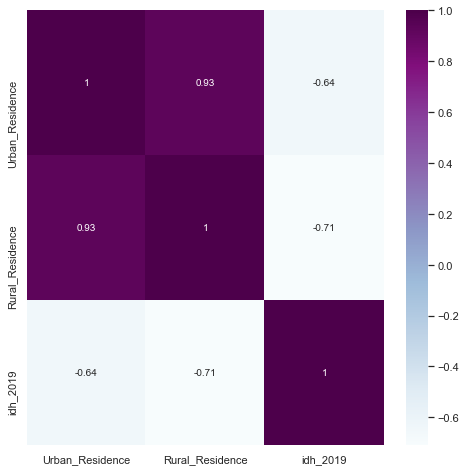

In [40]:
# Verificando a correlação entre desenvolvimento e % de pessoas fora da escola em cada zona de residência
plt.figure(figsize = (8,8))
pr_corr_residence = sns.heatmap(pr_residence_dev.corr(), annot = True, cmap = 'BuPu')

Aqui, observamos que crianças na Zona Rural são mais afetadas pelo desenvolvimento do país, em termos de educação, do que as crianças da Zona Urbana. 

In [41]:
#Top 10 países com maior % de crianças fora da escola em zona rural
pr_top10Rural = pr_residence_dev.sort_values('Rural_Residence', ascending = False).head(10)
pr_top10Rural

regiao Countries and areas  Urban_Residence  Rural_Residence  \
43  Sub-Saharan Africa             Senegal             20.0             51.0   
17  Sub-Saharan Africa              Guinea             14.0             44.0   
37  Sub-Saharan Africa             Nigeria             11.0             39.0   
5   Sub-Saharan Africa               Benin             21.0             38.0   
18  Sub-Saharan Africa       Guinea-Bissau             11.0             36.0   
1   Sub-Saharan Africa              Angola             14.0             35.0   
12  Sub-Saharan Africa       Côte d'Ivoire             15.0             29.0   
39          South Asia            Pakistan             12.0             28.0   
14  Sub-Saharan Africa            Ethiopia              9.0             27.0   
44  Sub-Saharan Africa        Sierra Leone              8.0             24.0   

   Development Regions  idh_2019  
43     Least Developed     0.512  
17     Least Developed     0.477  
37      Less Developed     0.539  
5      Least Developed     0.545  
18     Least Developed     0.480  
1      Least Developed     0.581  
12      Less Developed     0.538  
39      Less Developed     0.557  
14     Least Developed     0.485  
44     Least Developed     0.452

In [42]:
#Top 10 países com maior % de crianças fora da escola em zona urbana

pr_top10Urban = pr_residence_dev.sort_values('Urban_Residence', ascending = False).head(10)
pr_top10Urban

regiao Countries and areas  Urban_Residence  Rural_Residence  \
5   Sub-Saharan Africa               Benin             21.0             38.0   
43  Sub-Saharan Africa             Senegal             20.0             51.0   
12  Sub-Saharan Africa       Côte d'Ivoire             15.0             29.0   
1   Sub-Saharan Africa              Angola             14.0             35.0   
17  Sub-Saharan Africa              Guinea             14.0             44.0   
39          South Asia            Pakistan             12.0             28.0   
18  Sub-Saharan Africa       Guinea-Bissau             11.0             36.0   
37  Sub-Saharan Africa             Nigeria             11.0             39.0   
29  Sub-Saharan Africa          Madagascar             11.0             24.0   
14  Sub-Saharan Africa            Ethiopia              9.0             27.0   

   Development Regions  idh_2019  
5      Least Developed     0.545  
43     Least Developed     0.512  
12      Less Developed     0.538  
1      Least Developed     0.581  
17     Least Developed     0.477  
39      Less Developed     0.557  
18     Least Developed     0.480  
37      Less Developed     0.539  
29     Least Developed     0.528  
14     Least Developed     0.485

#### Gênero - Mari 🚹🚺⚧️

In [43]:
#Colocando o nome das regiões no pr.

conditions = [
    (pr_tratados['Region'] == 'EAP'),
    (pr_tratados['Region'] == 'ECA'),
    (pr_tratados['Region'] == 'LAC'),
    (pr_tratados['Region'] == 'MENA'),
    (pr_tratados['Region'] == 'SA'),
    (pr_tratados['Region'] == 'SSA')]
choices = ['East Asia and Pacific', 'Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'South Asia','Sub-Saharan Africa' ]
pr_tratados['Regiao'] = np.select(conditions, choices, default='black')

In [44]:
pr_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       58 non-null     object 
 1   Countries and areas        58 non-null     object 
 2   Region                     58 non-null     object 
 3   Sub-region                 58 non-null     object 
 4   Development Regions        58 non-null     object 
 5   Total                      58 non-null     float64
 6   Female                     58 non-null     float64
 7   Male                       58 non-null     float64
 8   Rural_Residence            58 non-null     float64
 9   Urban_Residence            58 non-null     float64
 10  Poorest_Wealth quintile    58 non-null     float64
 11  Second_Wealth quintile     58 non-null     float64
 12  Middle_Wealth quintile     58 non-null     float64
 13  Fourth_Wealth quintile     58 non-null     float64
 

A partir de uma visão geral comparativa entre os percentuais de crianças fora do primário por gênero e relacionando ao Desenvolvimento da região, é possível perceber que (gráfico abaixo):

- Em países menos desenvolvidos, os indicadores são os mais altos.
- A relação entre os percentuais de homens e mulheres é aproximadamente linear independente da região.

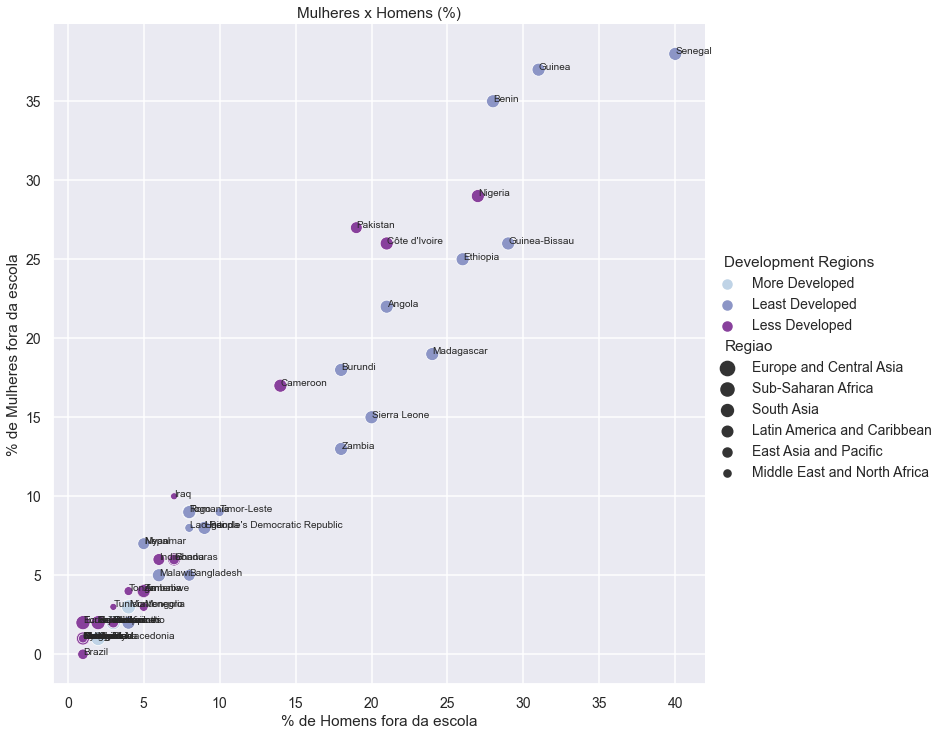

In [45]:
#plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid")
sns.set_context("talk", font_scale=0.85
               )
sns.relplot(
    data=pr_tratados,
    x="Male", y="Female", hue="Development Regions",
    size="Regiao",palette="BuPu", sizes=(50, 200), height = 10 
).set(title='Mulheres x Homens (%)')
plt.ylabel("% de Mulheres fora da escola")
plt.xlabel("% de Homens fora da escola")
#plt.title("Seaborn Default Legend Position")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=10)

label_point(pr_tratados.Male, pr_tratados.Female, pr_tratados['Countries and areas'], plt.gca()) 

plt.show()


**Abaixo vou construir o grafico bidirecional de homens e mulheres**

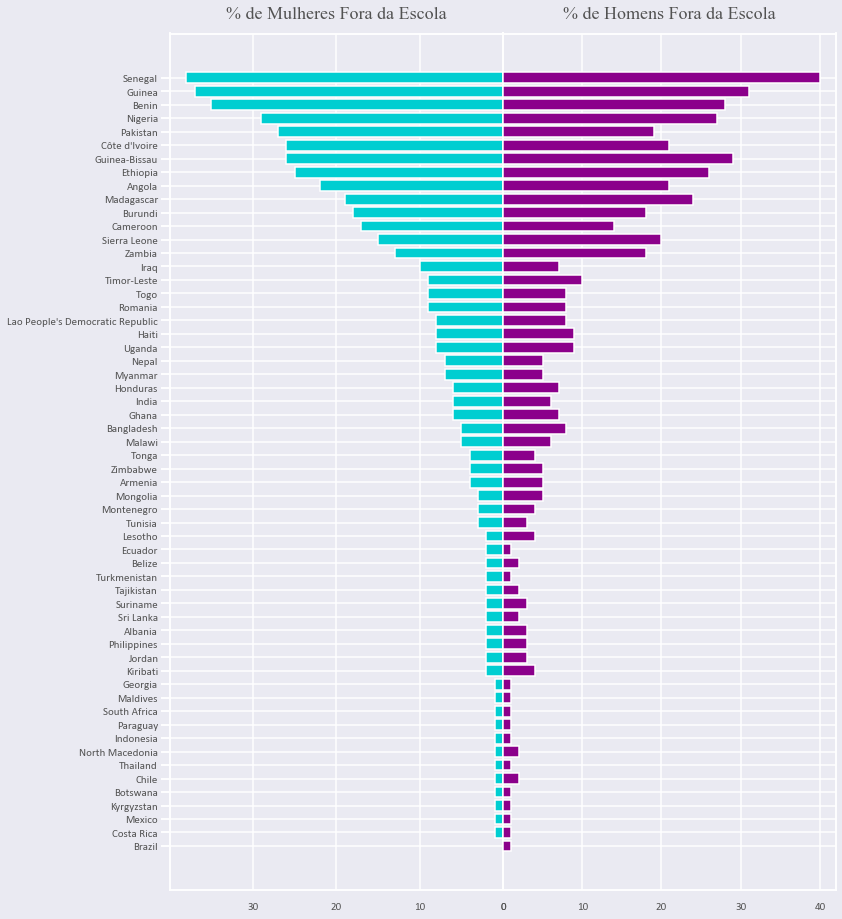

In [46]:
#Selecionando o dado que eu quero ordenado de acordo com o Female:
data = pr_tratados.sort_values(by=['Female'], ascending=False)[['Countries and areas','Female','Male']]
data.set_index('Countries and areas', inplace=True)


#Setando os parâmetros necessários para montar o gráfico:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
hfontitle = {'fontname':'Times New Roman'}
facecolor = '#eaeaf2'
color_title = '#525252'
color_red = '#00CED1'
color_blue = '#8B008B'
index = data.index
column0 = data['Female']
column1 = data['Male']
title0 = '% de Mulheres Fora da Escola'
title1 = '% de Homens Fora da Escola'

#Cosntruindo a figura:
fig, axes = plt.subplots(figsize=(12,14), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

#Plotando os gráficos de barra:
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_title, **hfontitle)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_title, **hfontitle)

#Invertendo o eixo do gráfico da esquerda:
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

#Modificando parametros de eixo:
axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


#Mudando a cor dos nomes de países
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=11, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=11, color=font_color, **hfont)

#Ajustando o plot:
plt.subplots_adjust(wspace=0, top=0.95, bottom=0.1, left=0.18, right=0.95)

**A partir do gráfico acima, é possível perceber que, apesar da variação em algumas seções do gráfico, o percentual de homens e mulheres fora do colégio por país é semelhante.**

Quando passamos para a visualização comparativa por região o comportamento se mantém. Veja abaixo:

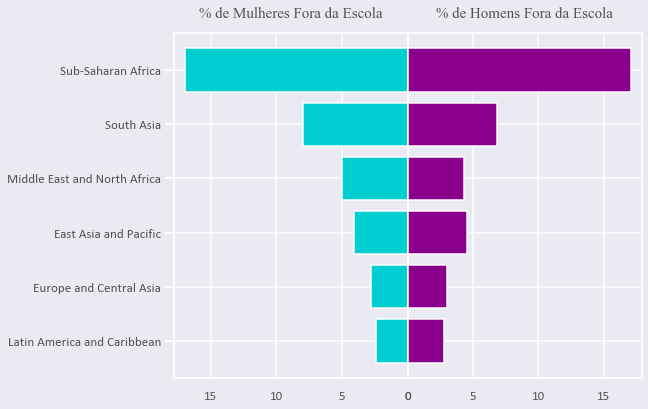

In [47]:
#Selecionando o dado que eu quero ordenado de acordo com o Total:
#data = pr_tratados.sort_values(by=['Total'], ascending=False)[['Regiao','Female','Male']]
#data = pr_tratados[['NomeRegiao','Female','Male']].groupby('NomeRegiao').mean().sort_values(by=['Female'], ascending=False)
data = pr_tratados[['Regiao','Female','Male', 'Total']].groupby('Regiao').mean().sort_values(by=['Total'], ascending=False)
#data = data.sort_values(by=['Total'], ascending=False)
#data.set_index('Regiao', inplace=True)
#data

#Setando os parâmetros necessários para montar o gráfico:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
hfontitle = {'fontname':'Times New Roman'}
facecolor = '#eaeaf2'
color_title = '#525252'
color_red = '#00CED1'
color_blue = '#8B008B'
index = data.index
column0 = data['Female']
column1 = data['Male']
title0 = '% de Mulheres Fora da Escola'
title1 = '% de Homens Fora da Escola'

#Cosntruindo a figura:
fig, axes = plt.subplots(figsize=(10,6), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

#Plotando os gráficos de barra:
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=15, pad=15, color=color_title, **hfontitle)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=15, pad=15, color=color_title, **hfontitle)

#Invertendo o eixo do gráfico da esquerda:
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

#Modificando parametros de eixo:
axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


#Mudando a cor dos nomes de países
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

#Ajustando o plot:
plt.subplots_adjust(wspace=0, top=0.9, bottom=0.1, left=0.25, right=0.9)

**Percebidas estas tendências, podemos destacar destes dois gráficos os cinco países com maior percentuais de crianças fora do colégio. Assim como a região Sub-Sahariana como o maior índice em ambos os gêneros.** 

Os cinco países com maior taxa de **crianças** fora da escola:
1. Senegal
- Guiné
- Benim
- Nigeria
- Guiné Bissau


Os cinco países com maior taxa de **homens** fora da escola:
1. Senegal
- Guiné
- Guiné Bissau
- Benim
- Nigeria


Os cinco países com maior taxa de **mulheres** fora da escola:
1. Senegal
- Guiné
- Benim
- Nigeria
- Paquistão

O que podemos notar como fatores que implicam no resultado deste ranking?

- Senegal, Guiné, Benim e Nigeria aparecem em todos os três tops. Importante notar que todos estes países estão localizados na região da África Sub-Sahariana.
- De todos os países citados, apenas na Nigeria e em Benim a religião predominante é o cristianismo, enquanto nos outros países é o islamismo.
- No Paquistão a presença de costumes tradicionais e do talibã é poderosa.
- Nigeria é o país com maior índice de mortalidade infantil de meninos e meninas no mundo, assim como possui uma das maiores taxas de homicidio infantil mundial. Com exceção de Senegal, todos os outros também mantém médias muito maiores que a mundial desta taxa.
- Todos os países tem taxa de fertilidade acima de 3 filhos por mulher.
- Sequestros em massa de crianças na idade escolar na Nigeria.
- Casamento Infantil e Mutilação Genital.
- Falta de investimento do governo.


#### Condição Financeira - Bruna 💵👑🤑 

Vamos analisar aqui a nossa base de dados tratada em relação aos quintis relacionados a condição financeira das crianças que não frequentam a escola.

Olhando para o exemplo da Albania, para compreendermos melhor a questão dos quintis vemos que:
 - 1% das crianças que estão no quintil mais rico, não frequentam a escola
 - 2% das crianças que estão no segundo quintil mais rico, não frequentam a escola
 - 2% das crianças que estão no quintil do meio, não frequentam a escola
 - 3% das crianças que estão no segundo quintal mais pobre, não frequentam a escola
 - 4% das criaças que estão no quintil mais pobre, não frequentam a escola


In [48]:
pr_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']].head()

Countries and areas  Total  Poorest_Wealth quintile  Second_Wealth quintile  \
0             Albania    2.0                      4.0                     3.0   
1              Angola   22.0                     39.0                    33.0   
2             Armenia    5.0                      6.0                     7.0   
3          Bangladesh    6.0                      9.0                     7.0   
4              Belize    2.0                      4.0                     4.0   

   Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  
0                     2.0                     2.0                      1.0  
1                    19.0                    12.0                      5.0  
2                     6.0                     3.0                      2.0  
3                     5.0                     6.0                      4.0  
4                     1.0                     1.0                      0.0

Observando agora a média por quintis, a gnt percebe que quanto mais pobre o quintil é, maior a taxa de evasão escola fica.

In [49]:
pr_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']].describe()

Total  Poorest_Wealth quintile  Second_Wealth quintile  \
count  58.000000                58.000000               58.000000   
mean    8.689655                16.077586               10.568966   
std     9.880349                17.796067               12.712906   
min     0.000000                 1.000000                0.000000   
25%     2.000000                 3.000000                2.000000   
50%     5.000000                 6.500000                4.500000   
75%     9.500000                26.250000               16.500000   
max    39.000000                64.000000               47.000000   

       Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  
count               58.000000               58.000000                58.000000  
mean                 7.456897                5.068966                 2.741379  
std                  9.427602                6.022945                 3.131954  
min                  0.000000                0.000000                 0.000000  
25%                  1.125000                1.000000                 1.000000  
50%                  4.000000                3.000000                 2.000000  
75%                  9.500000                5.750000                 3.000000  
max                 38.000000               31.000000                14.000000

Olhando agora a correlação entre as áreas por condição financeira, podemos tirar alguns insights:
 - Os mais pobres da população tem uma maior correlação com a área rural (correlação de 0.95 na área rural X correlação de 0.88 na área rural)
 - Os mais ricos da população tem uma maior correlação com a área urbana (correlação de 0.73 na área rural X correlação de 0.75 na área rural)
 - Fatores econômicos parecem influenciar as taxas de evasão de mulheres mais do que de homens (quanto mais pobre, mais impacta as mulheres)
 - Os mais ricos da população constumam ter mais o idh mais alto, como podemos ver na relação proporcional entre a condição financeira 

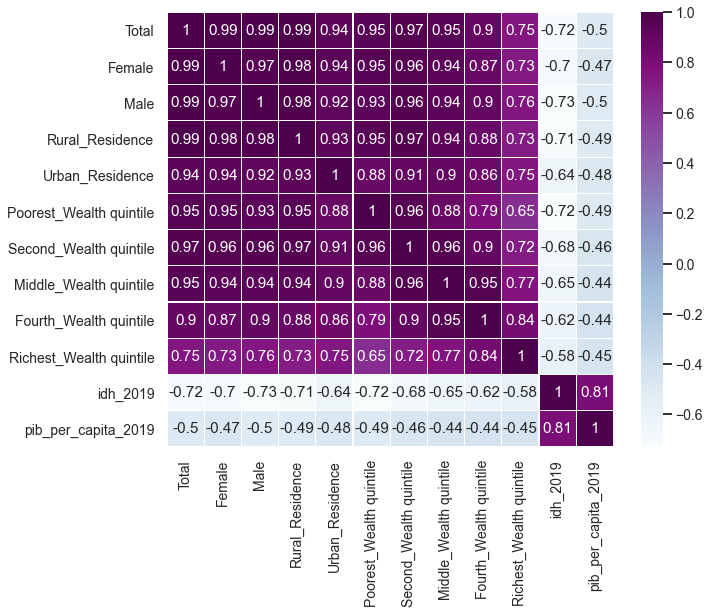

In [50]:
pr_heatmap = pr_tratados.drop(columns=['Time period', 'id_desenvolvimento_regiao', 'HDI Rank'])
sns.heatmap(pr_heatmap.corr(),annot=True,cmap='BuPu',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Vamos olhar agora em questão da desigualdade de condição social em questão da evasão escolar. A gente percebe uma grande concetração de países africanos em relação a desigualdade. Além disso, também existe uma grande correlação entre a desiguldade e a taxa de evasão escolar.

In [51]:
pr_desigualdade = pr_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']]
pr_desigualdade['Diferença entre o mais rico e mais pobre'] = pr_desigualdade['Poorest_Wealth quintile'] - pr_desigualdade['Richest_Wealth quintile']
pr_desigualdade.sort_values(by=['Diferença entre o mais rico e mais pobre'], ascending=False).head(10)

Countries and areas  Total  Poorest_Wealth quintile  \
37             Nigeria   28.0                     64.0   
5                Benin   32.0                     59.0   
39            Pakistan   23.0                     50.0   
17              Guinea   34.0                     55.0   
43             Senegal   39.0                     56.0   
29          Madagascar   22.0                     44.0   
9             Cameroon   15.0                     37.0   
1               Angola   22.0                     39.0   
14            Ethiopia   25.0                     41.0   
18       Guinea-Bissau   28.0                     38.0   

    Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
37                    36.0                    17.0                     6.0   
5                     39.0                    30.0                    15.0   
39                    24.0                    14.0                     8.0   
17                    43.0                    38.0                    22.0   
43                    47.0                    37.0                    31.0   
29                    30.0                    14.0                     7.0   
9                     18.0                    10.0                     4.0   
1                     33.0                    19.0                    12.0   
14                    30.0                    22.0                    19.0   
18                    39.0                    34.0                    19.0   

    Richest_Wealth quintile  Diferença entre o mais rico e mais pobre  
37                      3.0                                      61.0  
5                       7.0                                      52.0  
39                      4.0                                      46.0  
17                     11.0                                      44.0  
43                     14.0                                      42.0  
29                      3.0                                      41.0  
9                       2.0                                      35.0  
1                       5.0                                      34.0  
14                      9.0                                      32.0  
18                      6.0                                      32.0

In [52]:
Piores10_pr

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
43  SEN             Senegal    SSA        WCA     Least Developed   39.0   
17  GIN              Guinea    SSA        WCA     Least Developed   34.0   
5   BEN               Benin    SSA        WCA     Least Developed   32.0   
37  NGA             Nigeria    SSA        WCA      Less Developed   28.0   
18  GNB       Guinea-Bissau    SSA        WCA     Least Developed   28.0   
14  ETH            Ethiopia    SSA        ESA     Least Developed   25.0   
39  PAK            Pakistan     SA         SA      Less Developed   23.0   
12  CIV       Côte d'Ivoire    SSA        WCA      Less Developed   23.0   
1   AGO              Angola    SSA        ESA     Least Developed   22.0   
29  MDG          Madagascar    SSA        ESA     Least Developed   22.0   

    Female  Male  Rural_Residence  Urban_Residence  ...  \
43    38.0  40.0             51.0             20.0  ...   
17    37.0  31.0             44.0             14.0  ...   
5     35.0  28.0             38.0             21.0  ...   
37    29.0  27.0             39.0             11.0  ...   
18    26.0  29.0             36.0             11.0  ...   
14    25.0  26.0             27.0              9.0  ...   
39    27.0  19.0             28.0             12.0  ...   
12    26.0  21.0             29.0             15.0  ...   
1     22.0  21.0             35.0             14.0  ...   
29    19.0  24.0             24.0             11.0  ...   

    Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
43                    37.0                    31.0                     14.0   
17                    38.0                    22.0                     11.0   
5                     30.0                    15.0                      7.0   
37                    17.0                     6.0                      3.0   
18                    34.0                    19.0                      6.0   
14                    22.0                    19.0                      9.0   
39                    14.0                     8.0                      4.0   
12                    23.0                    13.0                      6.0   
1                     19.0                    12.0                      5.0   
29                    14.0                     7.0                      3.0   

    Time period              regiao  id_desenvolvimento_regiao HDI Rank  \
43       2019.0  Sub-Saharan Africa                          1      168   
17       2018.0  Sub-Saharan Africa                          1      178   
5        2018.0  Sub-Saharan Africa                          1      158   
37       2018.0  Sub-Saharan Africa                          2      161   
18       2019.0  Sub-Saharan Africa                          1      175   
14       2016.0  Sub-Saharan Africa                          1      173   
39       2018.0          South Asia                          2      154   
12       2016.0  Sub-Saharan Africa                          2      162   
1        2016.0  Sub-Saharan Africa                          1      148   
29       2018.0  Sub-Saharan Africa                          1      164   

    idh_2019  pib_per_capita_2019     Faixa Total  
43     0.512          1381.601793  Entre 30 e 40%  
17     0.477           945.769349  Entre 30 e 40%  
5      0.545          1201.561388  Entre 30 e 40%  
37     0.539          2502.652281  Entre 20 e 30%  
18     0.480           650.069382  Entre 20 e 30%  
14     0.485           799.795134  Entre 20 e 30%  
39     0.557          1487.357222  Entre 20 e 30%  
12     0.538          2327.745364  Entre 20 e 30%  
1      0.581          3458.650512  Entre 20 e 30%  
29     0.528           488.913857  Entre 20 e 30%  

[10 rows x 22 columns]

#### Escala de desenvolvimento da região - Pedro 📈🌍🗾

##### Distribuição dos países por desenvolvimento da região

- Primeiro analisamos a distribuição dos países por desenvolvimento da região.<br>
- Depois desagregamos esta distribuição por faixa do % Total de crianças fora da escola.

In [53]:
pr_tratados.groupby(["Development Regions"])[["ISO3"]].count()

ISO3
Development Regions      
Least Developed        21
Less Developed         33
More Developed          4

In [54]:
pr_tratados.pivot_table(index=["Development Regions"],
                        columns=["Faixa Total"],
                        values=["ISO3"],
                        aggfunc={"ISO3" : "count"},
                        fill_value=0,
                        margins=1,
                        margins_name="Total")

ISO3                                                   
Faixa Total         Até 10% Entre 10 e 20% Entre 20 e 30% Entre 30 e 40% Total
Development Regions                                                           
Least Developed          11              3              4              3    21
Less Developed           29              1              3              0    33
More Developed            4              0              0              0     4
Total                    44              4              7              3    58

Pontos importantes:

- Vemos que a concentração maior de países está nas regiões Less Developed, seguida da Least Developed e da More Developed
- Os países também se concentram em grande parte na faixa até 10% do total de crianças fora da escola
- A região Least Developed é a que contém mais países entre as faixas superiores de % de crianças fora da escola
- Não há nenhum país da região More Developed com mais de 10% de crianças fora da escola

Podemos constatar isso visualmente pelos gráficos abaixo.

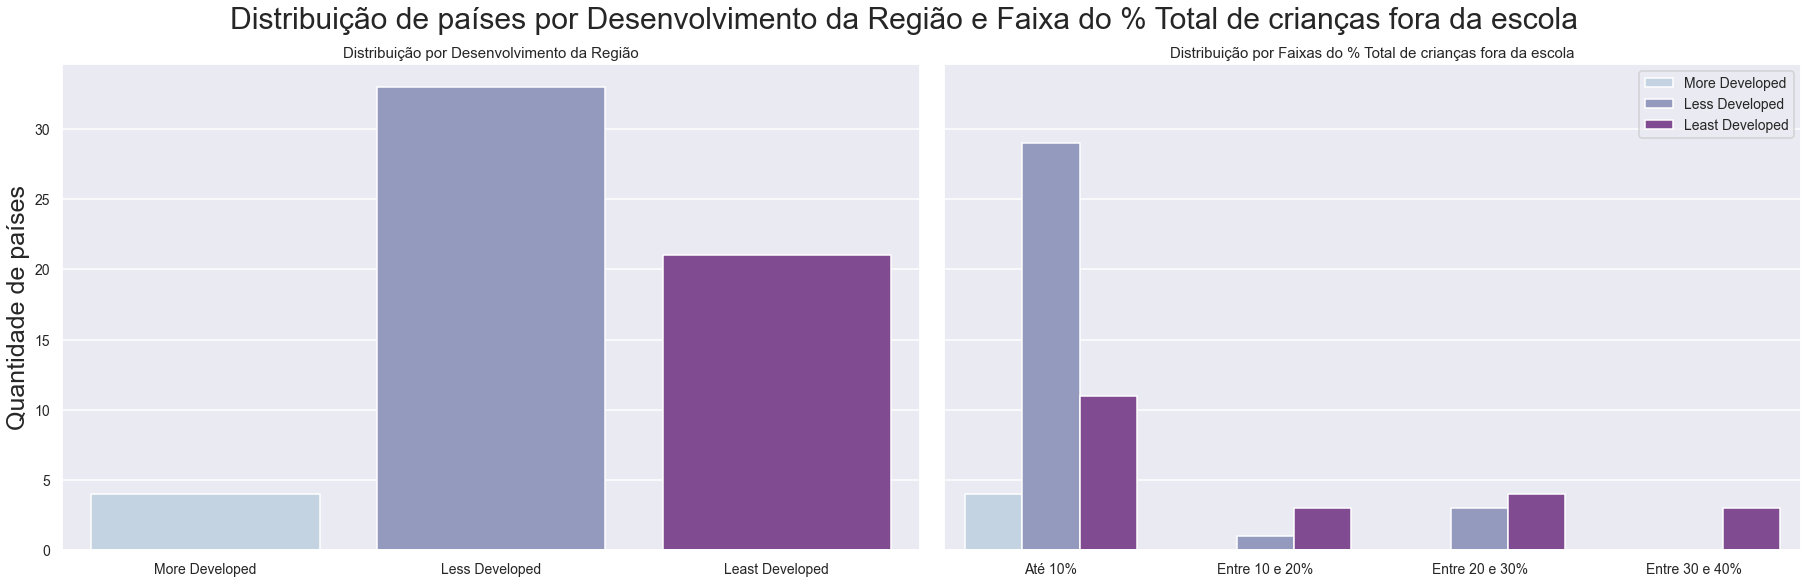

In [55]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(25,8)) 
fig.suptitle("Distribuição de países por Desenvolvimento da Região e Faixa do % Total de crianças fora da escola", fontsize=30)


sns.countplot(ax=axs[0], data = pr_tratados, x = "Development Regions", order=["More Developed", "Less Developed","Least Developed"], palette="BuPu")
sns.set_style("darkgrid")
axs[0].set_title("Distribuição por Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("Quantidade de países", fontsize=25)


sns.countplot(ax=axs[1], data = pr_tratados, x = "Faixa Total", hue="Development Regions", order=["Até 10%", "Entre 10 e 20%", "Entre 20 e 30%", "Entre 30 e 40%"],  hue_order=["More Developed", "Less Developed","Least Developed"], palette="BuPu")
plt.legend(loc="upper right")
axs[1].set_title("Distribuição por Faixas do % Total de crianças fora da escola", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)


plt.show()

A distribuição das regiões por desenvolvimento da região, nos mostra que:    
- Nas regiões **Least Developed** há uma concentração maior de países da África Subssariana.
- Nas regiões **Less Developed** é onde há maior heterogeneidade de regiões
- As regiões **More Developed** contém apenas países da Europa e Ásia Central.

In [56]:
pr_tratados.pivot_table(index=['regiao'],
                       columns=['Development Regions'],
                       values=['ISO3'],
                       aggfunc="count",
                       fill_value=0,
                       margins=1,
                       margins_name="Total")

ISO3                                \
Development Regions          Least Developed Less Developed More Developed   
regiao                                                                       
East Asia and Pacific                      4              5              0   
Europe and Central Asia                    0              5              4   
Latin America and Caribbean                1              9              0   
Middle East and North Africa               0              3              0   
South Asia                                 2              4              0   
Sub-Saharan Africa                        14              7              0   
Total                                     21             33              4   

                                    
Development Regions          Total  
regiao                              
East Asia and Pacific            9  
Europe and Central Asia          9  
Latin America and Caribbean     10  
Middle East and North Africa     3  
South Asia                       6  
Sub-Saharan Africa              21  
Total                           58

Após entendermos a distribuição dos países pelas regiões e seu desenvolvimento, entramos um pouco mais no detalhe para saber quais eram esses países.

- Todos os 4 países da região **More Developed** pertencem a Europa e Ásia Central.
- É possível identificar que na região **Less Developed** três países da África Subssariana (Nigéria, Côte d'Ivoire e Camarões) e um país do Sul da Ásia (Paquistão) se destoam em relação aos demais desse grupo, no que diz respeito ao % total de crianças fora da escola.
- A região **Less Developed** está bem distribuída no sentido de conter países de diversas regiões de forma mais ou menos proporcional.
- A região **Least Development** é composta principalmente por países da África Subssariana e onde se tem mais países com o % total de crianças fora da escola mais preocupante.


In [57]:
pr_tratados.groupby(["Development Regions", "regiao", "Countries and areas"])[["Total"]].mean().sort_values(["Development Regions", "regiao", "Total"], ascending=False)

Total
Development Regions regiao                       Countries and areas                    
More Developed      Europe and Central Asia      Romania                             8.0
                                                 Montenegro                          3.0
                                                 Albania                             2.0
                                                 North Macedonia                     2.0
Less Developed      Sub-Saharan Africa           Nigeria                            28.0
                                                 Côte d'Ivoire                      23.0
                                                 Cameroon                           15.0
                                                 Ghana                               7.0
                                                 Zimbabwe                            5.0
                                                 Botswana                            1.0
                                                 South Africa                        1.0
                    South Asia                   Pakistan                           23.0
                                                 India                               6.0
                                                 Sri Lanka                           2.0
                                                 Maldives                            1.0
                    Middle East and North Africa Iraq                                8.0
                                                 Jordan                              3.0
                                                 Tunisia                             3.0
                    Latin America and Caribbean  Honduras                            7.0
                                                 Belize                              2.0
                                                 Suriname                            2.0
                                                 Chile                               1.0
                                                 Costa Rica                          1.0
                                                 Ecuador                             1.0
                                                 Mexico                              1.0
                                                 Paraguay                            1.0
                                                 Brazil                              0.0
                    Europe and Central Asia      Armenia                             5.0
                                                 Tajikistan                          2.0
                                                 Georgia                             1.0
                                                 Kyrgyzstan                          1.0
                                                 Turkmenistan                        1.0
                    East Asia and Pacific        Mongolia                            4.0
                                                 Tonga                               4.0
                                                 Philippines                         2.0
                                                 Indonesia                           1.0
                                                 Thailand                            1.0
Least Developed     Sub-Saharan Africa           Senegal                            39.0
                                                 Guinea                             34.0
                                                 Benin                              32.0
                                                 Guinea-Bissau                      28.0
                                                 Ethiopia                           25.0
                                                 Angola                             22.0
                                                 Madagascar                   

A partir disso, voltamos para a análise macro das regiões. Procuramos entender como estava o % total de crianças fora da escola em cada uma das regiões. A princípio, utilizamos a média para esta análise.

Text(0, 0.5, '')

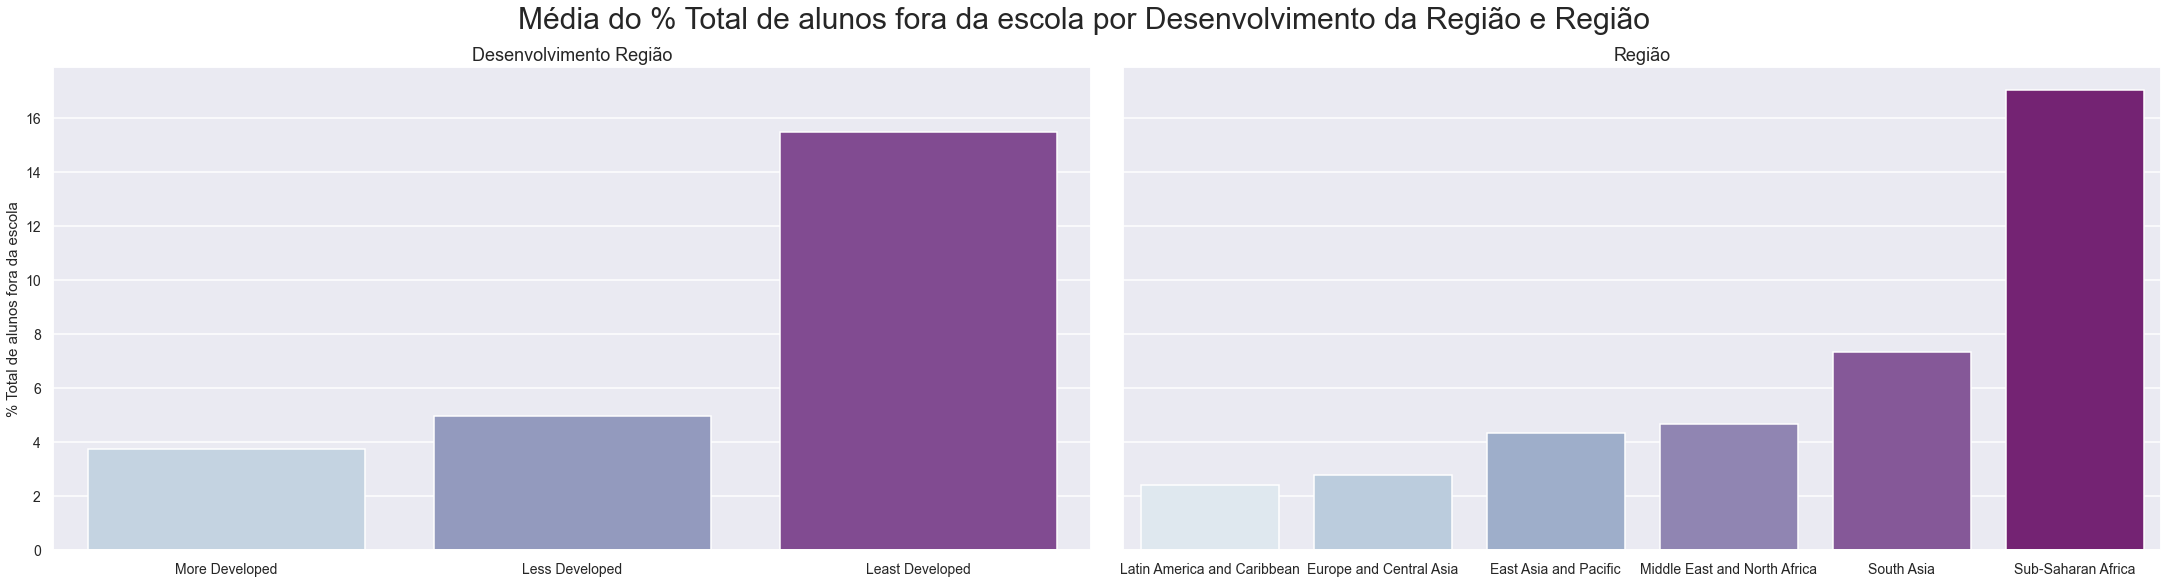

In [58]:
# Gráfico de colunas do % total de crianças fora da escola

pr_media_dev_regiao = pr_tratados.groupby(["Development Regions"])[["Total"]].mean().sort_values("Total").reset_index()
pr_media_regiao = pr_tratados.groupby(["regiao"])[["Total"]].mean().sort_values("Total").reset_index()


fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(30,8)) 
fig.suptitle("Média do % Total de alunos fora da escola por Desenvolvimento da Região e Região", fontsize=30)

sns.barplot(ax=axs[0], x="Development Regions", y='Total', data=pr_media_dev_regiao, palette="BuPu")
axs[0].set_title("Desenvolvimento Região", fontsize=18)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.barplot(ax=axs[1], x="regiao", y='Total', data=pr_media_regiao, palette="BuPu")
axs[1].set_title("Região", fontsize=18)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

# a região Europe contém países do leste europeu e da asia central, por isso está maior que da latina américa

Fica claro nos gráficos que:     
- A região Least Developed tem uma média do % do total de crianças fora da escola bem maior que das outras duas categorias de desenvolvimento da região. 
- Sabemos que grande parte dos países que pertencem a região Least Developed são da África Subssariana. Fica evidente no segundo gráfico a maior média dessa região em relação às outras.

A fim de enxergarmos a dispersão desta análise, plotamos dois gráficos boxplot.

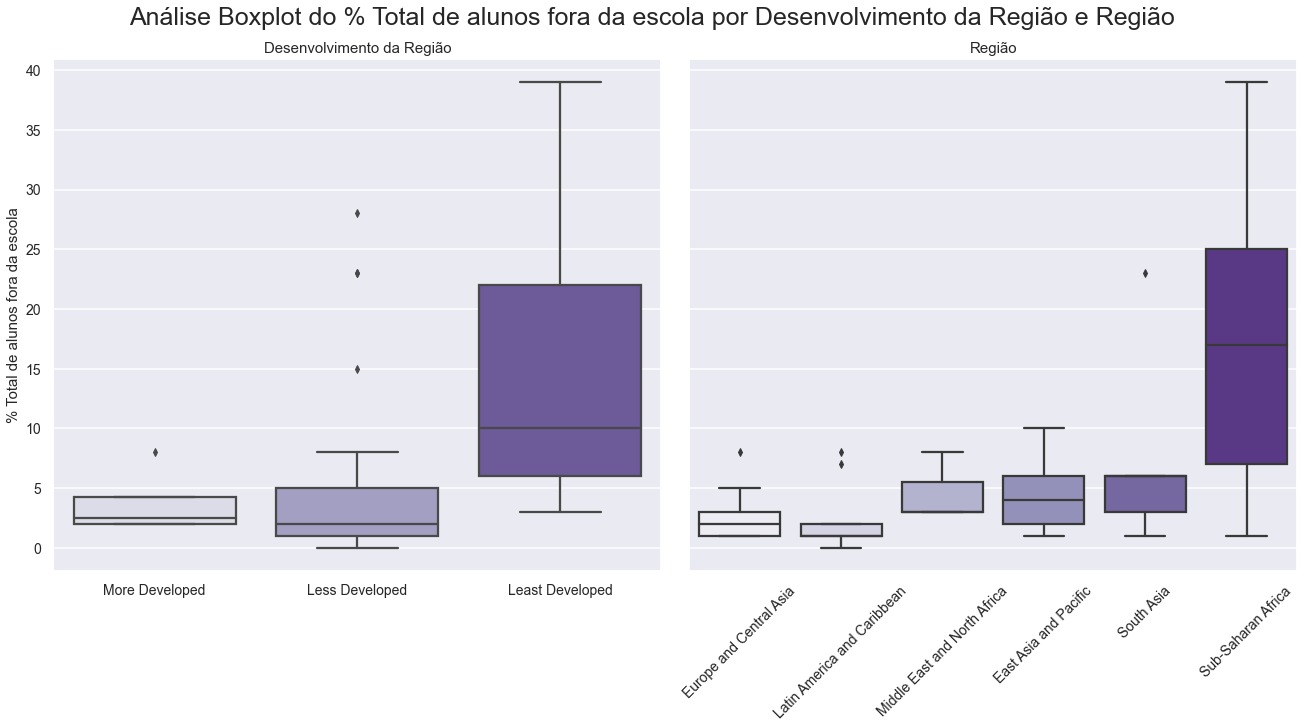

In [59]:
# Gráfico de boxplot do % total de crianças fora da escola

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(18,10)) 
fig.suptitle("Análise Boxplot do % Total de alunos fora da escola por Desenvolvimento da Região e Região", fontsize=25)


sns.boxplot(ax=axs[0], x="Development Regions", y='Total', data=pr_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.boxplot(ax=axs[1], x="regiao", y='Total', data=pr_tratados, order=['Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'East Asia and Pacific', 'South Asia', 'Sub-Saharan Africa' ], palette="Purples")
plt.xticks(rotation=45)
axs[1].set_title("Região", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)


plt.show()

Pela análise do boxplot, podemos verificar que:    

- Tanto as regiões **Least Development** (primeiro gráfico) quanto a região da **África Subssariana** (segundo gráfico) são as que apresentam maior variabilidade em relação ao % total de crianças fora da escola e apresentam diversos países com este % acima de 10%.
- As regiões que mais se aproximam de uma **distribuição normal** são Europa e Ásia Central, Leste da Ásia e Pacífico e África Subssariana.
- As regiões **Less Developed** é a que possue mais outliers (Nigéria, Côte'Ivoire, Camarões e Paquistão).
- Por conta desses **outliers**, resolvemos plotar novamente o gráfico de colunas do % do total de crianças fora da escola, porém utilizando a mediana ao invés da média, a fim de reduzir a distorção da média causada pelos outliers.

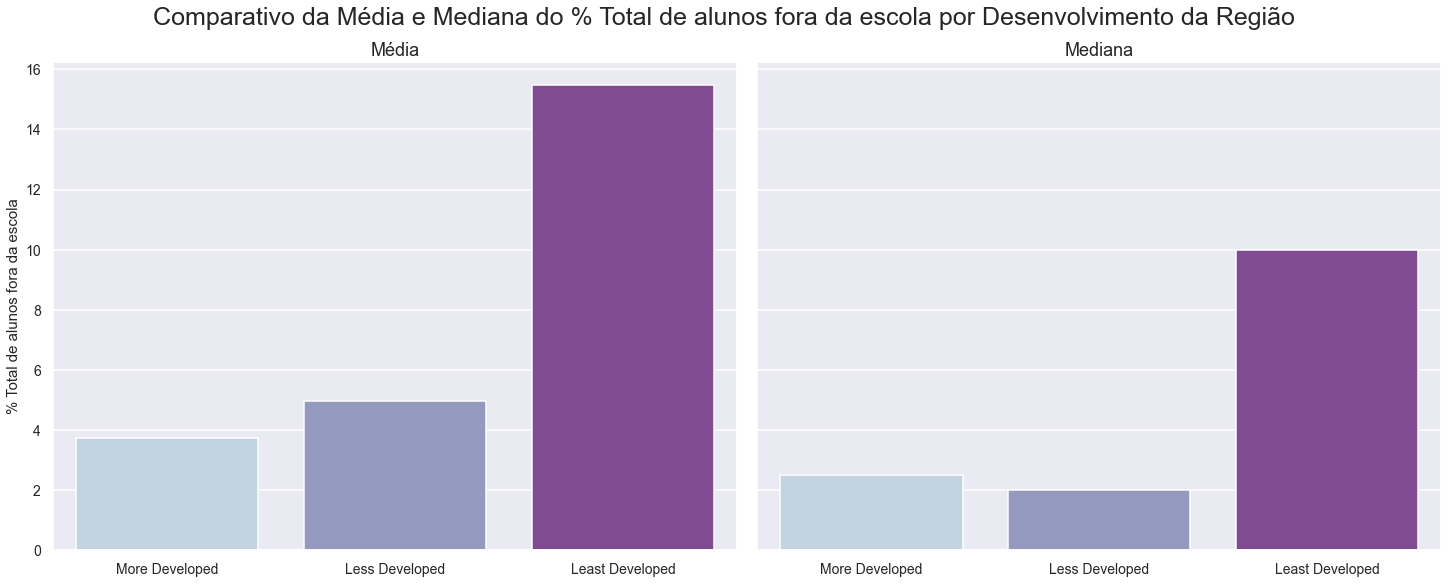

In [60]:
# comparativo da média e mediana

pr_mediana = pr_tratados.groupby(["Development Regions"])[["Total"]].median().sort_values("Total").reset_index()
pr_media = pr_tratados.groupby(["Development Regions"])[["Total"]].mean().sort_values("Total").reset_index()


fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(20,8)) 
fig.suptitle("Comparativo da Média e Mediana do % Total de alunos fora da escola por Desenvolvimento da Região", fontsize=25)

sns.barplot(ax=axs[0], x="Development Regions", y='Total', data=pr_media, order=['More Developed',  'Less Developed', 'Least Developed'], palette="BuPu")
axs[0].set_title("Média", fontsize=18)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.barplot(ax=axs[1], x="Development Regions", y='Total', data=pr_mediana, order=['More Developed',  'Less Developed', 'Least Developed'], palette="BuPu")
axs[1].set_title("Mediana", fontsize=18)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

A partir desse comparativo entre média e mediana podemos observar que:    
- Os outliers presentes nas regiões acabaram distorcendo a média para cima. 
- As regiões Less Developed têm uma mediana de % do total de crianças fora da escola menor que das regiões More Developed. 

Após análises dos dados em relação ao desenvolvimento das regiões, prosseguimos com a importação de novos dados para podermos fazer uma análise também por desenvolvimento de país, e não apenas região. Uma região pode ser desenvolvida, mas nem todos os países dentro dela também o são. Por isso, importamos dados do IDH.

In [61]:
# pegando todos os anos do idh

colunas = ["HDI Rank", "Country"] + [str(ano) for ano in range(1990, 2020)]

idh_todos = pd.read_csv("Human Development Index (HDI).csv", sep=",", usecols=colunas, skiprows=5, encoding="ISO-8859-1")
idh_todos.loc[196, "Country"] = "Middle East and North Africa"
idh_todos.loc[197, "Country"] = "East Asia and Pacific"
idh_todos.loc[199, "Country"] = "Latin America and Caribbean"

idh_todos.dropna(axis=0, how="all", inplace=True)


# transformando o idh de string para float

lista_anos = idh_todos.columns[2:].to_list()

for ano in lista_anos:

    lista_idh = pd.to_numeric(idh_todos[ano], errors="coerce", downcast="float")
    idh_todos.replace(idh_todos[ano].tolist(), lista_idh, inplace=True)

idh_todos.loc[196:201]

HDI Rank                       Country   1990   1991   1992   1993   1994  \
196           Middle East and North Africa  0.556  0.559  0.565  0.571  0.576   
197                  East Asia and Pacific  0.519  0.525  0.534  0.542  0.549   
198                Europe and Central Asia  0.652  0.650  0.646  0.643  0.638   
199            Latin America and Caribbean  0.628  0.634  0.639  0.644  0.650   
200                             South Asia  0.441  0.447  0.454  0.460  0.466   
201                     Sub-Saharan Africa  0.402  0.404  0.404  0.406  0.407   

      1995   1996   1997  ...   2010   2011   2012   2013   2014   2015  \
196  0.581  0.587  0.594  ...  0.676  0.681  0.687  0.688  0.691  0.695   
197  0.559  0.568  0.576  ...  0.691  0.700  0.707  0.714  0.721  0.727   
198  0.642  0.646  0.651  ...  0.735  0.744  0.750  0.759  0.766  0.770   
199  0.656  0.662  0.669  ...  0.731  0.737  0.740  0.748  0.752  0.754   
200  0.473  0.480  0.486  ...  0.585  0.593  0.601  0.607  0.617  0.624   
201  0.411  0.415  0.418  ...  0.498  0.505  0.512  0.521  0.527  0.532   

      2016   2017   2018   2019  
196  0.699  0.701  0.703  0.705  
197  0.733  0.737  0.741  0.747  
198  0.772  0.776  0.779  0.791  
199  0.756  0.758  0.759  0.766  
200  0.634  0.639  0.642  0.641  
201  0.535  0.539  0.541  0.547  

[6 rows x 32 columns]

In [62]:
# transformar colunas de anos em linhas

idh_todos = pd.melt(idh_todos, id_vars=["HDI Rank", "Country"], var_name="Ano", value_name="IDH")


# série histórica do idh das regiões

idh_regioes = idh_todos[(idh_todos["Country"].isin(regioes["regiao"]))]
idh_regioes_2016 = idh_regioes[idh_regioes["Ano"] >= "2016"]


# definindo valor mínimo e máximo para o eixo y

idh_min = idh_regioes["IDH"].min() - 0.005
idh_max = idh_regioes["IDH"].max() + 0.005

Nossa análise compreende dados educacionais de 2016 a 2019. Trouxemos a evolução do IDH para cada região nas últimas 3 décadas e depois recortamos a série histórica a partir de 2016 para identificarmos as variações nesse período.

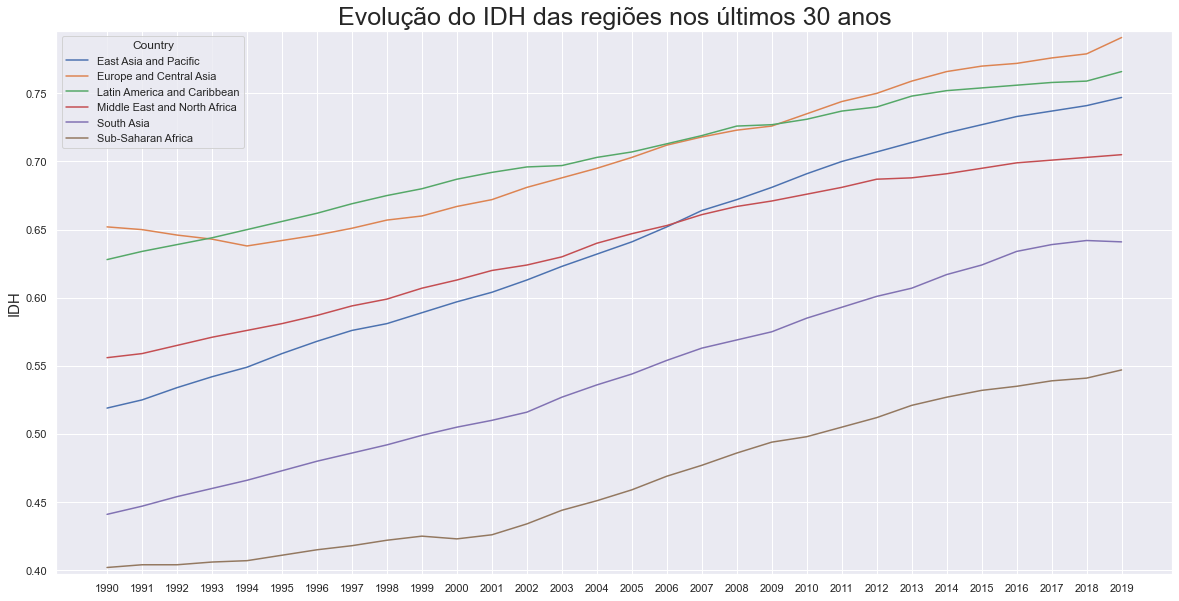

In [63]:
# série histórica completa

sns.set(rc = {"figure.figsize" : (20, 10)})
ax = sns.lineplot(data=idh_regioes, x="Ano", y="IDH", hue="Country", hue_order=regioes["regiao"].tolist())
ax.set_title('Evolução do IDH das regiões nos últimos 30 anos', fontsize=25)
ax.set_xlabel(None)
ax.set_ylabel("IDH", fontsize=15)
plt.ylim(idh_min, idh_max)

plt.show()

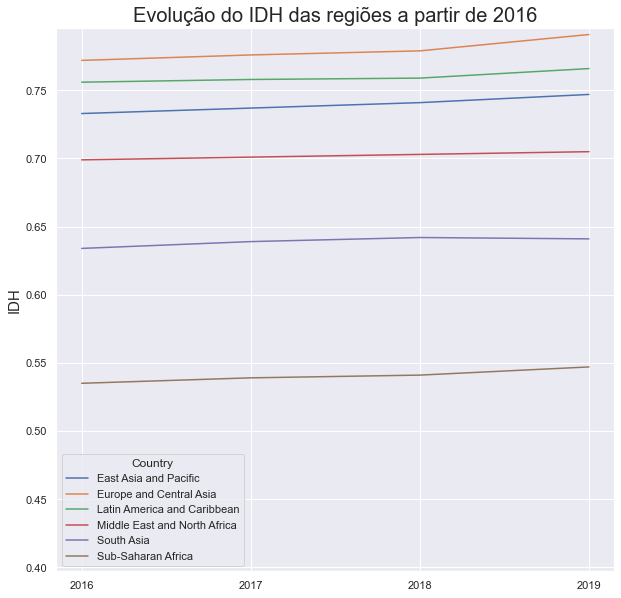

In [64]:
# série histórica a partir de 2016

sns.set(rc = {"figure.figsize" : (10, 10)})
ax = sns.lineplot(data=idh_regioes_2016, x="Ano", y="IDH", hue="Country", hue_order=regioes["regiao"].tolist())
ax.set_title('Evolução do IDH das regiões a partir de 2016', fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("IDH", fontsize=15)
plt.ylim(idh_min, idh_max)

plt.show()

Vimos que no período de 2016 a 2019 não houve grandes variações no IDH. Utilizamos isso como uma *proxy* das variações do IDH dos países destas regiões, para facilitar a análise, e adotamos o **IDH de 2019** para a análise com os países.

Também importamos dados de **PIB per capita** dos países em 2019, para avaliarmos a sua relação com o % de crianças fora da escola.

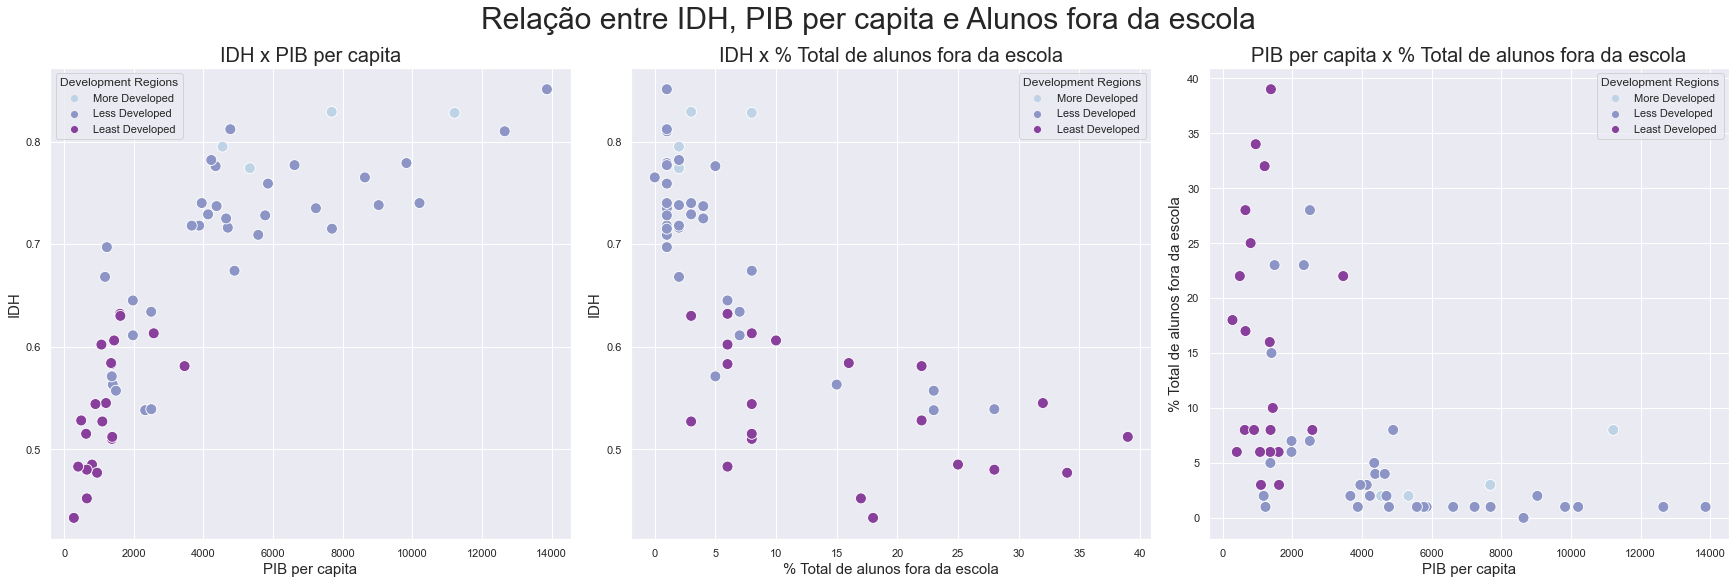

In [65]:
fig, axs = plt.subplots(1, 3, constrained_layout = True, figsize=(24,8)) 
fig.suptitle("Relação entre IDH, PIB per capita e Alunos fora da escola", fontsize=30)

# formato dos valores do dicionário [x, y, titulo, label x, label y]

dfs_infos = {0 : ["pib_per_capita_2019", "idh_2019", "IDH x PIB per capita", "PIB per capita", "IDH"],
             1 : ["Total", "idh_2019", "IDH x % Total de alunos fora da escola", "% Total de alunos fora da escola", "IDH"],
             2 : ["pib_per_capita_2019", "Total", "PIB per capita x % Total de alunos fora da escola", "PIB per capita", "% Total de alunos fora da escola"]}

lista_corr = []

for i in dfs_infos.keys():

    x = dfs_infos[i][0]
    y = dfs_infos[i][1]
    titulo = dfs_infos[i][2]
    label_x = dfs_infos[i][3]
    label_y = dfs_infos[i][4]

    sns.scatterplot(ax=axs[i], x=x, y=y, data=pr_tratados, hue='Development Regions', s=120, palette="BuPu", hue_order=["More Developed", "Less Developed", "Least Developed"])
    sns.set_style("darkgrid")
    axs[i].set_title(titulo, fontsize=20)
    axs[i].set_xlabel(label_x, fontsize=15)
    axs[i].set_ylabel(label_y, fontsize=15)


    # correlação entre variáveis e formatação do texto para imprimir

    correlacao = round(pr_tratados[x].corr(pr_tratados[y]), 2)
    txt = titulo + ": " + str(correlacao)
    lista_corr.append(txt)


plt.show()

In [66]:
print("Coeficiente de correlação de Pearson\n")

for txt in lista_corr:
    print(txt) 
    

Coeficiente de correlação de Pearson

IDH x PIB per capita: 0.81
IDH x % Total de alunos fora da escola: -0.72
PIB per capita x % Total de alunos fora da escola: -0.5


Em relação aos gráficos de dispersão, observamos que:    

- Existe uma forte correlação positiva entre o IDH e o PIB per capita, sendo que quanto menos desenvolvida a região, menos é o IDH e o PIB per capita de seus países.
- Também há uma forte correlação negativa entre o IDH e o % total de crianças fora da escola. O que era esperado, uma fez que um dos indicadores que compõem o IDH é a média de anos de estudos da sua população.
- Vemos no segundo gráfico que os países ficaram relativamente clusterizados por desenvolvimento da região, sendo que os países de regiões More Developed se posicionam no canto superior esquerdo, ou seja, países com maior IDH e menor % de crianças fora da escola.
- No terceiro gráfico podemos perceber que não há uma correlação relevante entre PIB per capita e % de crianças fora da escola.

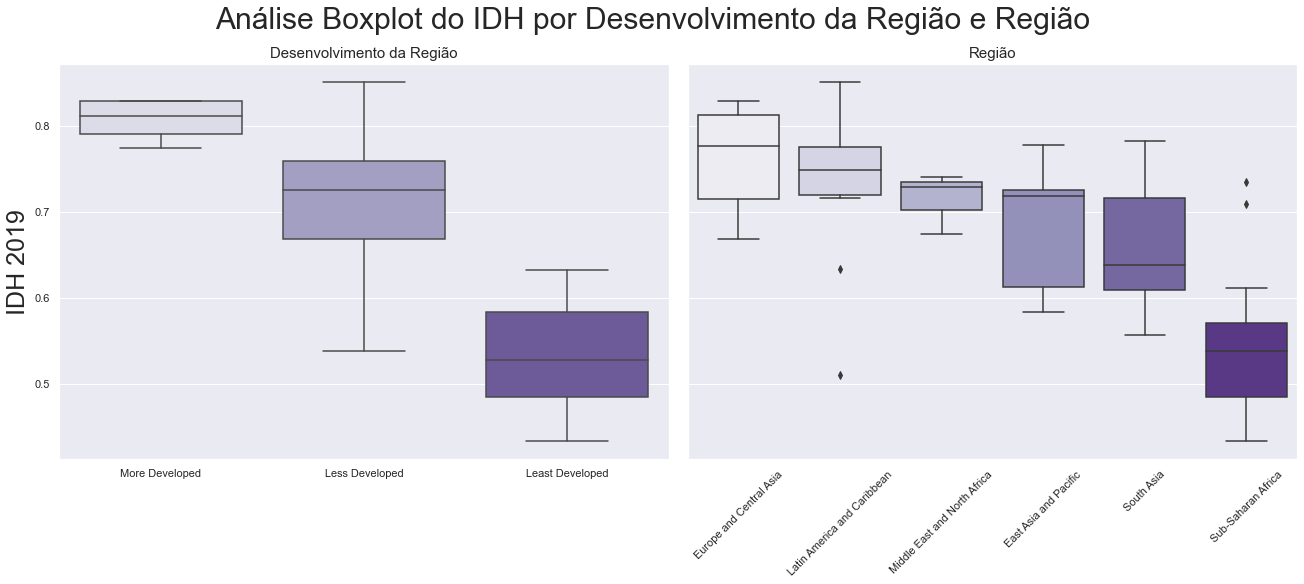

In [67]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(18,8)) 
fig.suptitle("Análise Boxplot do IDH por Desenvolvimento da Região e Região", fontsize=30)


sns.boxplot(ax=axs[0], x="Development Regions", y='idh_2019', data=pr_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("IDH 2019", fontsize=25)


sns.boxplot(ax=axs[1], x="regiao", y='idh_2019', data=pr_tratados, order=['Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'East Asia and Pacific', 'South Asia', 'Sub-Saharan Africa' ], palette="Purples")
plt.xticks(rotation=45)
axs[1].set_title("Região", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

Por conta da forte correlação entre IDH e % crianças fora da escola, plotamos novamente o boxplot, agora por IDH, das regiões.
- Há uma clara diferença no IDH dos países por desenvolvimento da região, sendo os países que compõem as regiões More Developed mais homogêneos em relação ao IDH e os países das regiões Less Developed mais heterogêneos.
- É possível observar outliers nas regiões da América Latina e Caribe e África Subssariana.<br><br>


Conclusão da análise:    
- Dada a relação entre IDH e % de crianças fora da escola e o comportamento semelhante dessas duas variáveis distruibuídas por região e seu desenvolvimento, acreditamos que existe um forte indicativo que condições de saúde (expectativa de vida) e renda para a população são fatores fundamentais para a maior presença de crianças na escola.

## 3) Análise Lower Secondary

### Análise Exploratória  📊🔎📈

In [68]:
ls.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   40.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    6.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   15.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    56.0  25.0             46.0             23.0                     50.0   
1     2.0   2.0              2.0              2.0                      4.0   
2     6.0   5.0              8.0              4.0                     12.0   
3     NaN   NaN              NaN              NaN                      NaN   
4    17.0  14.0             28.0             10.0                     31.0   

   Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
0                    48.0                    49.0                    33.0   
1                     2.0                     2.0                     1.0   
2                     6.0                     5.0                     3.0   
3                     NaN                     NaN                     NaN   
4                    26.0                    16.0                     6.0   

   Richest_Wealth quintile   Data source  Time period  
0                     21.0      DHS 2015       2015.0  
1                      1.0   DHS 2017-18       2018.0  
2                      2.0  MICS 2012-13       2013.0  
3                      NaN           NaN          NaN  
4                      4.0   DHS 2015-16       2016.0

In [69]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     202 non-null    object 
 1   Countries and areas      202 non-null    object 
 2   Region                   200 non-null    object 
 3   Sub-region               200 non-null    object 
 4   Development Regions      202 non-null    object 
 5   Total                    110 non-null    float64
 6   Female                   110 non-null    float64
 7   Male                     110 non-null    float64
 8   Rural_Residence          107 non-null    float64
 9   Urban_Residence          107 non-null    float64
 10  Poorest_Wealth quintile  102 non-null    float64
 11  Second_Wealth quintile   102 non-null    float64
 12  Middle_Wealth quintile   102 non-null    float64
 13  Fourth_Wealth quintile   102 non-null    float64
 14  Richest_Wealth quintile  1

In [70]:
ls.describe()

Total      Female        Male  Rural_Residence  Urban_Residence  \
count  110.000000  110.000000  110.000000       107.000000       107.000000   
mean    14.509091   15.200000   13.827273        17.822430         9.850467   
std     15.605072   17.246619   14.441822        18.571541        10.006417   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      3.000000    3.000000    4.000000         4.000000         3.000000   
50%      7.500000    7.000000    8.000000        10.000000         6.000000   
75%     21.750000   24.500000   20.000000        28.000000        14.500000   
max     70.000000   73.000000   67.000000        79.000000        46.000000   

       Poorest_Wealth quintile  Second_Wealth quintile  \
count               102.000000              102.000000   
mean                 24.519608               18.519608   
std                  22.782541               19.738754   
min                   0.000000                0.000000   
25%                   6.000000                3.000000   
50%                  15.000000               10.500000   
75%                  38.750000               29.000000   
max                  90.000000               80.000000   

       Middle_Wealth quintile  Fourth_Wealth quintile  \
count              102.000000              102.000000   
mean                15.137255               11.225490   
std                 17.696584               14.116143   
min                  0.000000                0.000000   
25%                  3.000000                2.000000   
50%                  8.000000                5.500000   
75%                 21.000000               15.000000   
max                 80.000000               72.000000   

       Richest_Wealth quintile  Time period  
count               102.000000   110.000000  
mean                  7.254902  2015.509091  
std                   9.293548     2.565635  
min                   0.000000  2010.000000  
25%                   1.000000  2014.000000  
50%                   3.000000  2016.000000  
75%                  10.750000  2018.000000  
max                  44.000000  2019.000000

### Limpeza e tratamento de dados 🧹🎲

In [71]:
# Adicionando datasets de informações e idh no dataframe Primary
ls = ls.merge(regioes[["id_regiao", "regiao"]], how='left', left_on='Region', right_on='id_regiao')
ls = ls.merge(desenv_regioes, how='left', left_on='Development Regions', right_on='desenvolvimento_regiao')
ls = ls.merge(idh, how='left', left_on='Countries and areas', right_on='pais_regiao')
ls = ls.merge(pib[["Country Code", "pib_per_capita_2019"]], how="left", left_on="ISO3", right_on="Country Code").drop(["Country Code"], axis=1)

ls_mesclado = ls.copy() #plotar o gráfico comparativo

ls.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   40.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    6.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   15.0   

   Female  Male  Rural_Residence  Urban_Residence  ...   Data source  \
0    56.0  25.0             46.0             23.0  ...      DHS 2015   
1     2.0   2.0              2.0              2.0  ...   DHS 2017-18   
2     6.0   5.0              8.0              4.0  ...  MICS 2012-13   
3     NaN   NaN              NaN              NaN  ...           NaN   
4    17.0  14.0             28.0             10.0  ...   DHS 2015-16   

   Time period  id_regiao                        regiao  \
0       2015.0         SA                    South Asia   
1       2018.0        ECA       Europe and Central Asia   
2       2013.0       MENA  Middle East and North Africa   
3          NaN        ECA       Europe and Central Asia   
4       2016.0        SSA            Sub-Saharan Africa   

   id_desenvolvimento_regiao desenvolvimento_regiao  HDI Rank  pais_regiao  \
0                          1        Least Developed       169  Afghanistan   
1                          3         More Developed        69      Albania   
2                          2         Less Developed        91      Algeria   
3                          3         More Developed        36      Andorra   
4                          1        Least Developed       148       Angola   

  idh_2019  pib_per_capita_2019  
0    0.511           577.563058  
1    0.795          4549.457441  
2    0.748          4111.306192  
3    0.868         39003.384448  
4    0.581          3458.650512  

[5 rows x 25 columns]

In [72]:
# Adicionando uma coluna de faixas do total

ls.loc[ls["Total"] <= 10, "Faixa Total"] = "Até 10%"
ls.loc[(ls["Total"] > 10) & (ls["Total"] <= 20), "Faixa Total"] = "Entre 10 e 20%"
ls.loc[(ls["Total"] > 20) & (ls["Total"] <= 30), "Faixa Total"] = "Entre 20 e 30%"
ls.loc[(ls["Total"] > 30) & (ls["Total"] <= 40), "Faixa Total"] = "Entre 30 e 40%"
ls.loc[(ls["Total"] > 40) & (ls["Total"] <= 50), "Faixa Total"] = "Entre 40 e 50%"

ls.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   40.0   
1  ALB             Albania    ECA       EECA      More Developed    2.0   
2  DZA             Algeria   MENA       MENA      Less Developed    6.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   15.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  Time period  \
0    56.0  25.0             46.0             23.0  ...       2015.0   
1     2.0   2.0              2.0              2.0  ...       2018.0   
2     6.0   5.0              8.0              4.0  ...       2013.0   
3     NaN   NaN              NaN              NaN  ...          NaN   
4    17.0  14.0             28.0             10.0  ...       2016.0   

   id_regiao                        regiao  id_desenvolvimento_regiao  \
0         SA                    South Asia                          1   
1        ECA       Europe and Central Asia                          3   
2       MENA  Middle East and North Africa                          2   
3        ECA       Europe and Central Asia                          3   
4        SSA            Sub-Saharan Africa                          1   

   desenvolvimento_regiao HDI Rank  pais_regiao idh_2019 pib_per_capita_2019  \
0         Least Developed      169  Afghanistan    0.511          577.563058   
1          More Developed       69      Albania    0.795         4549.457441   
2          Less Developed       91      Algeria    0.748         4111.306192   
3          More Developed       36      Andorra    0.868        39003.384448   
4         Least Developed      148       Angola    0.581         3458.650512   

      Faixa Total  
0  Entre 30 e 40%  
1         Até 10%  
2         Até 10%  
3             NaN  
4  Entre 10 e 20%  

[5 rows x 26 columns]

In [73]:
# Tratamento de países e regiões

# Nomeando as regiões desses países
#Canadá
ls['Region'][33]='NA'
ls['Sub-region'][33]='NA'

#USA
ls['Region'][193]='NA'
ls['Sub-region'][193]='NA'

# eliminando regiões sem nenhum dado que não é possível assumir uma média
ls.drop(ls[ls['Sub-region'] == 'WE'].index, inplace=True)
ls.drop(ls[ls['Sub-region'] == 'NA'].index, inplace=True)

ls_pais_com_dados = ls.copy() # plotar o gráfico comparativo

# Exclusão de dados anteriores a 2016

ls = ls[ls["Time period"] >= 2016]


ls.reset_index(inplace=True)
ls.drop(['index'], axis=1, inplace=True) 

ls_pais_com_dados_recente = ls.copy()

In [74]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       61 non-null     object 
 1   Countries and areas        61 non-null     object 
 2   Region                     61 non-null     object 
 3   Sub-region                 61 non-null     object 
 4   Development Regions        61 non-null     object 
 5   Total                      61 non-null     float64
 6   Female                     61 non-null     float64
 7   Male                       61 non-null     float64
 8   Rural_Residence            60 non-null     float64
 9   Urban_Residence            60 non-null     float64
 10  Poorest_Wealth quintile    55 non-null     float64
 11  Second_Wealth quintile     55 non-null     float64
 12  Middle_Wealth quintile     55 non-null     float64
 13  Fourth_Wealth quintile     55 non-null     float64
 

In [75]:
# preenchendo espaços vazios
subRegions = ls['Sub-region'].unique()
for i in subRegions:
    ls.loc[ls['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ]= ls.loc[ls['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ].fillna(ls[ls['Sub-region']==i].median().round(1))

In [76]:
# Exclusão de HDI sem informações

ls.dropna(subset=["HDI Rank"], inplace=True)

In [77]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       58 non-null     object 
 1   Countries and areas        58 non-null     object 
 2   Region                     58 non-null     object 
 3   Sub-region                 58 non-null     object 
 4   Development Regions        58 non-null     object 
 5   Total                      58 non-null     float64
 6   Female                     58 non-null     float64
 7   Male                       58 non-null     float64
 8   Rural_Residence            58 non-null     float64
 9   Urban_Residence            58 non-null     float64
 10  Poorest_Wealth quintile    58 non-null     float64
 11  Second_Wealth quintile     58 non-null     float64
 12  Middle_Wealth quintile     58 non-null     float64
 13  Fourth_Wealth quintile     58 non-null     float64
 

In [78]:
# organizando o novo dataframe tratado
ls.drop(['desenvolvimento_regiao', 'pais_regiao', 'id_regiao', 'Data source'], axis=1, inplace=True)
ls.to_csv('ls_tratados.csv', index=False)

### Análise dos dados 🔎🎲

#### Análise geral 📊📉📈

In [79]:
# importando e lendo o dataframe modificado
ls_tratados = pd.read_csv('ls_tratados.csv')
ls_tratados.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  ALB             Albania    ECA       EECA      More Developed    2.0   
1  AGO              Angola    SSA        ESA     Least Developed   15.0   
2  ARM             Armenia    ECA       EECA      Less Developed    1.0   
3  BGD          Bangladesh     SA         SA     Least Developed   13.0   
4  BLZ              Belize    LAC        LAC      Less Developed    9.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  \
0     2.0   2.0              2.0              2.0  ...   
1    17.0  14.0             28.0             10.0  ...   
2     1.0   1.0              0.0              1.0  ...   
3     8.0  18.0             13.0             12.0  ...   
4     9.0  10.0             12.0              4.0  ...   

   Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
0                     2.0                     1.0                      1.0   
1                    16.0                     6.0                      4.0   
2                     2.0                     0.0                      0.0   
3                    11.0                    11.0                      7.0   
4                     9.0                     4.0                      2.0   

   Time period                       regiao  id_desenvolvimento_regiao  \
0       2018.0      Europe and Central Asia                          3   
1       2016.0           Sub-Saharan Africa                          1   
2       2016.0      Europe and Central Asia                          2   
3       2019.0                   South Asia                          1   
4       2016.0  Latin America and Caribbean                          2   

  HDI Rank  idh_2019  pib_per_capita_2019     Faixa Total  
0       69     0.795          4549.457441         Até 10%  
1      148     0.581          3458.650512  Entre 10 e 20%  
2       81     0.776          4350.466198         Até 10%  
3      133     0.632          1603.953501  Entre 10 e 20%  
4      110     0.716          4701.089242         Até 10%  

[5 rows x 22 columns]

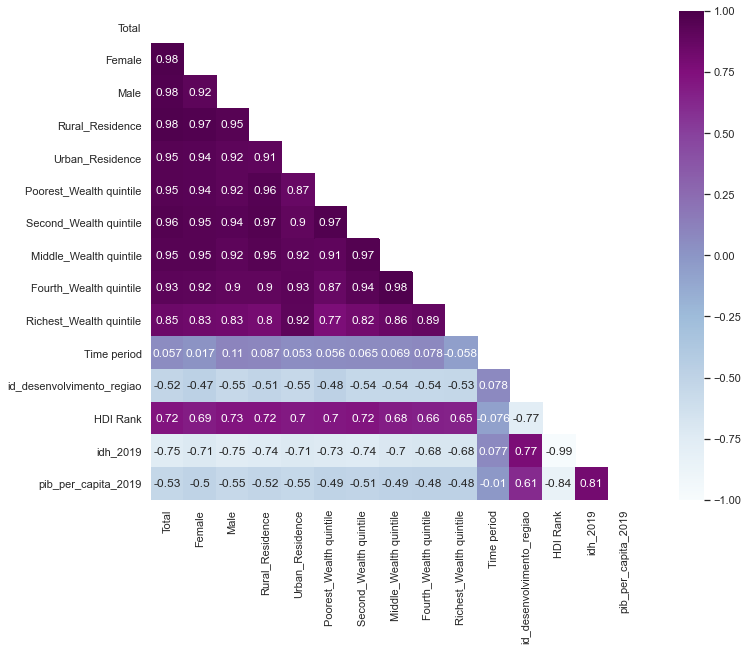

In [80]:
# Gráfico correlacional
corr = ls_tratados.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 9))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, center=0, cmap="BuPu", square=True)

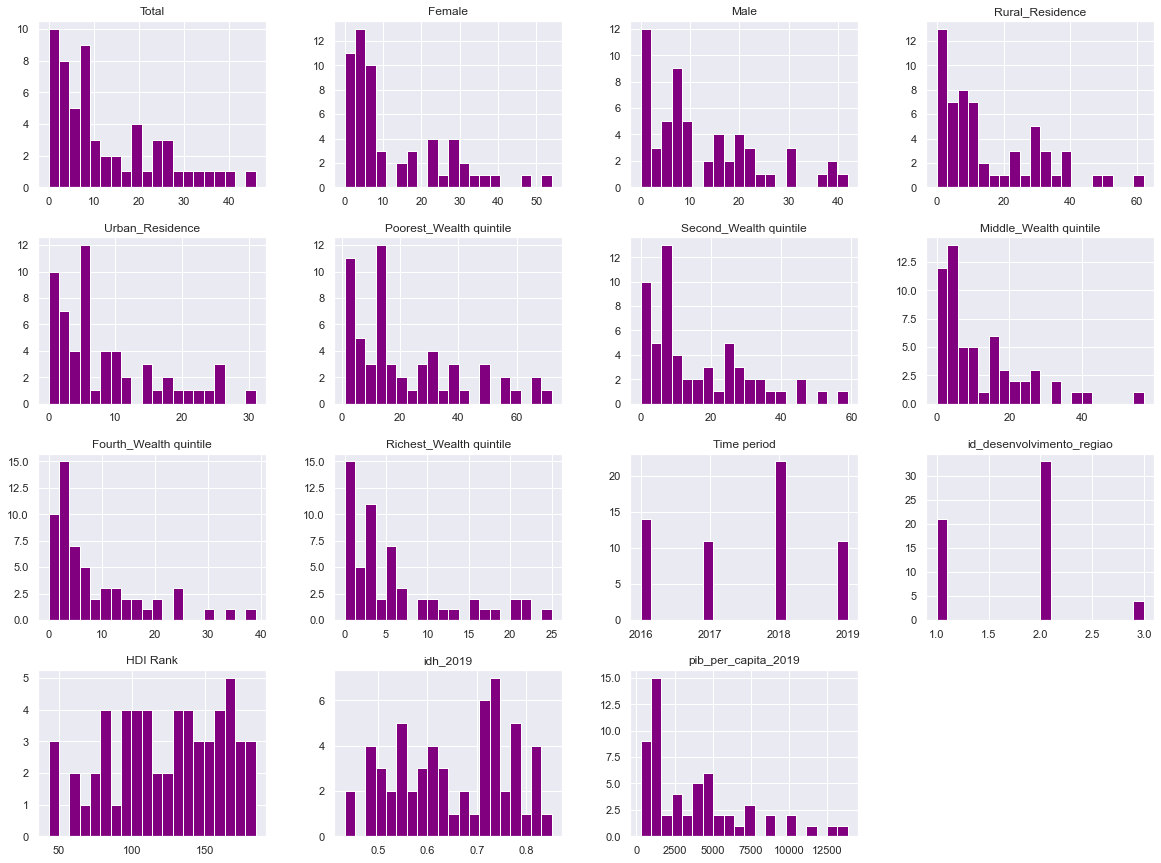

In [81]:
# plotagem de gráfico
ls_tratados.hist(bins=20, figsize=(20, 15), color="purple")
plt.show;

In [82]:
Piores10_ls=ls_tratados.sort_values(by=['Total'], ascending=False).head(10)

#### Região 🏡📍

In [83]:
# filtrando apenas regiões
ls_tratados[['regiao', 'Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','id_desenvolvimento_regiao', 'idh_2019']].sort_values(['Development Regions'])

regiao               Countries and areas  \
28            Sub-Saharan Africa                           Lesotho   
30            Sub-Saharan Africa                            Malawi   
29            Sub-Saharan Africa                        Madagascar   
56            Sub-Saharan Africa                            Zambia   
27         East Asia and Pacific  Lao People's Democratic Republic   
25         East Asia and Pacific                          Kiribati   
43            Sub-Saharan Africa                           Senegal   
44            Sub-Saharan Africa                      Sierra Leone   
19   Latin America and Caribbean                             Haiti   
18            Sub-Saharan Africa                     Guinea-Bissau   
17            Sub-Saharan Africa                            Guinea   
36                    South Asia                             Nepal   
14            Sub-Saharan Africa                          Ethiopia   
35         East Asia and Pacific                           Myanmar   
1             Sub-Saharan Africa                            Angola   
55            Sub-Saharan Africa                            Uganda   
50         East Asia and Pacific                       Timor-Leste   
51            Sub-Saharan Africa                              Togo   
8             Sub-Saharan Africa                           Burundi   
3                     South Asia                        Bangladesh   
5             Sub-Saharan Africa                             Benin   
48       Europe and Central Asia                        Tajikistan   
54       Europe and Central Asia                      Turkmenistan   
37            Sub-Saharan Africa                           Nigeria   
40   Latin America and Caribbean                          Paraguay   
47   Latin America and Caribbean                          Suriname   
41         East Asia and Pacific                       Philippines   
53  Middle East and North Africa                           Tunisia   
52         East Asia and Pacific                             Tonga   
49         East Asia and Pacific                          Thailand   
46                    South Asia                         Sri Lanka   
39                    South Asia                          Pakistan   
45            Sub-Saharan Africa                      South Africa   
57            Sub-Saharan Africa                          Zimbabwe   
16            Sub-Saharan Africa                             Ghana   
9             Sub-Saharan Africa                          Cameroon   
10   Latin America and Caribbean                             Chile   
11   Latin America and Caribbean                        Costa Rica   
12            Sub-Saharan Africa                     Côte d'Ivoire   
13   Latin America and Caribbean                           Ecuador   
15       Europe and Central Asia                           Georgia   
33         East Asia and Pacific                          Mongolia   
20   Latin America and Caribbean                          Honduras   
21                    South Asia                             India   
4    Latin America and Caribbean                            Belize   
22         East Asia and Pacific                         Indonesia   
23  Middle East and North Africa                              Iraq   
24  Middle East and North Africa                            Jordan   
2        Europe and Central Asia                           Armenia   
26       Europe and Central Asia                        Kyrgyzstan   
31                    South Asia                          Maldives   
32   Latin America and Caribbean                            Mexico   
7    Latin America and Caribbean                            Brazil   
6             Sub-Saharan Africa                          Botswana   
34       Europe and Central Asia                        Montenegro   
38       Europe and Central Asia                   North Macedonia   
42       Europe and Central Asia    

In [84]:
#Verificando a média do % de pessoas fora da escola em cada zona de residência e relacionando 
# com o desenvolvimento da região
ls_residence_dev = ls_tratados[['regiao','Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','idh_2019' ]]

ls_residence_dev

regiao               Countries and areas  \
0        Europe and Central Asia                           Albania   
1             Sub-Saharan Africa                            Angola   
2        Europe and Central Asia                           Armenia   
3                     South Asia                        Bangladesh   
4    Latin America and Caribbean                            Belize   
5             Sub-Saharan Africa                             Benin   
6             Sub-Saharan Africa                          Botswana   
7    Latin America and Caribbean                            Brazil   
8             Sub-Saharan Africa                           Burundi   
9             Sub-Saharan Africa                          Cameroon   
10   Latin America and Caribbean                             Chile   
11   Latin America and Caribbean                        Costa Rica   
12            Sub-Saharan Africa                     Côte d'Ivoire   
13   Latin America and Caribbean                           Ecuador   
14            Sub-Saharan Africa                          Ethiopia   
15       Europe and Central Asia                           Georgia   
16            Sub-Saharan Africa                             Ghana   
17            Sub-Saharan Africa                            Guinea   
18            Sub-Saharan Africa                     Guinea-Bissau   
19   Latin America and Caribbean                             Haiti   
20   Latin America and Caribbean                          Honduras   
21                    South Asia                             India   
22         East Asia and Pacific                         Indonesia   
23  Middle East and North Africa                              Iraq   
24  Middle East and North Africa                            Jordan   
25         East Asia and Pacific                          Kiribati   
26       Europe and Central Asia                        Kyrgyzstan   
27         East Asia and Pacific  Lao People's Democratic Republic   
28            Sub-Saharan Africa                           Lesotho   
29            Sub-Saharan Africa                        Madagascar   
30            Sub-Saharan Africa                            Malawi   
31                    South Asia                          Maldives   
32   Latin America and Caribbean                            Mexico   
33         East Asia and Pacific                          Mongolia   
34       Europe and Central Asia                        Montenegro   
35         East Asia and Pacific                           Myanmar   
36                    South Asia                             Nepal   
37            Sub-Saharan Africa                           Nigeria   
38       Europe and Central Asia                   North Macedonia   
39                    South Asia                          Pakistan   
40   Latin America and Caribbean                          Paraguay   
41         East Asia and Pacific                       Philippines   
42       Europe and Central Asia                           Romania   
43            Sub-Saharan Africa                           Senegal   
44            Sub-Saharan Africa                      Sierra Leone   
45            Sub-Saharan Africa                      South Africa   
46                    South Asia                         Sri Lanka   
47   Latin America and Caribbean                          Suriname   
48       Europe and Central Asia                        Tajikistan   
49         East Asia and Pacific                          Thailand   
50         East Asia and Pacific                       Timor-Leste   
51            Sub-Saharan Africa                              Togo   
52         East Asia and Pacific                             Tonga   
53  Middle East and North Africa                           Tunisia   
54       Europe and Central Asia                      Turkmenistan   
55            Sub-Saharan Africa                            Uganda   
56            Sub-Saharan Africa    

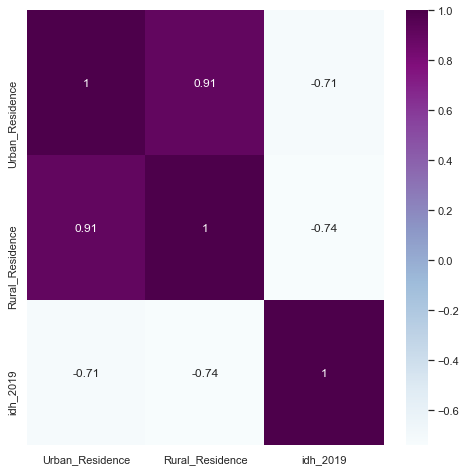

In [85]:
# Verificando a correlação entre desenvolvimento e % de pessoas fora da escola em cada zona de residência
plt.figure(figsize = (8,8))
ls_crr_residence = sns.heatmap(ls_residence_dev.corr(), annot = True, cmap = 'BuPu')

In [86]:
#Top 10 países com maior % de crianças fora da escola em zona rural
ls_top10Rural = ls_residence_dev.sort_values('Rural_Residence', ascending = False).head(10)
ls_top10Rural

regiao Countries and areas  Urban_Residence  \
17           Sub-Saharan Africa              Guinea             26.0   
43           Sub-Saharan Africa             Senegal             25.0   
5            Sub-Saharan Africa               Benin             31.0   
12           Sub-Saharan Africa       Côte d'Ivoire             26.0   
29           Sub-Saharan Africa          Madagascar             21.0   
37           Sub-Saharan Africa             Nigeria             11.0   
20  Latin America and Caribbean            Honduras             15.0   
14           Sub-Saharan Africa            Ethiopia             22.0   
39                   South Asia            Pakistan             18.0   
8            Sub-Saharan Africa             Burundi             20.0   

    Rural_Residence Development Regions  idh_2019  
17             62.0     Least Developed     0.477  
43             50.0     Least Developed     0.512  
5              48.0     Least Developed     0.545  
12             40.0      Less Developed     0.538  
29             40.0     Least Developed     0.528  
37             39.0      Less Developed     0.539  
20             35.0      Less Developed     0.634  
14             33.0     Least Developed     0.485  
39             31.0      Less Developed     0.557  
8              31.0     Least Developed     0.433

In [87]:
#Top 10 países com maior % de crianças fora da escola em zona urbana

ls_top10Urban = ls_residence_dev.sort_values('Urban_Residence', ascending = False).head(10)
ls_top10Urban

regiao Countries and areas  Urban_Residence  Rural_Residence  \
5   Sub-Saharan Africa               Benin             31.0             48.0   
12  Sub-Saharan Africa       Côte d'Ivoire             26.0             40.0   
17  Sub-Saharan Africa              Guinea             26.0             62.0   
43  Sub-Saharan Africa             Senegal             25.0             50.0   
55  Sub-Saharan Africa              Uganda             24.0             23.0   
14  Sub-Saharan Africa            Ethiopia             22.0             33.0   
29  Sub-Saharan Africa          Madagascar             21.0             40.0   
8   Sub-Saharan Africa             Burundi             20.0             31.0   
18  Sub-Saharan Africa       Guinea-Bissau             18.0             27.0   
39          South Asia            Pakistan             18.0             31.0   

   Development Regions  idh_2019  
5      Least Developed     0.545  
12      Less Developed     0.538  
17     Least Developed     0.477  
43     Least Developed     0.512  
55     Least Developed     0.544  
14     Least Developed     0.485  
29     Least Developed     0.528  
8      Least Developed     0.433  
18     Least Developed     0.480  
39      Less Developed     0.557

#### Gênero  🚹🚺⚧️

In [88]:
#Colocando o nome das regiões no ls.

conditions = [
    (ls_tratados['Region'] == 'EAP'),
    (ls_tratados['Region'] == 'ECA'),
    (ls_tratados['Region'] == 'LAC'),
    (ls_tratados['Region'] == 'MENA'),
    (ls_tratados['Region'] == 'SA'),
    (ls_tratados['Region'] == 'SSA')]
choices = ['East Asia and Pacific', 'Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'South Asia','Sub-Saharan Africa' ]
ls_tratados['Regiao'] = np.select(conditions, choices, default='black')

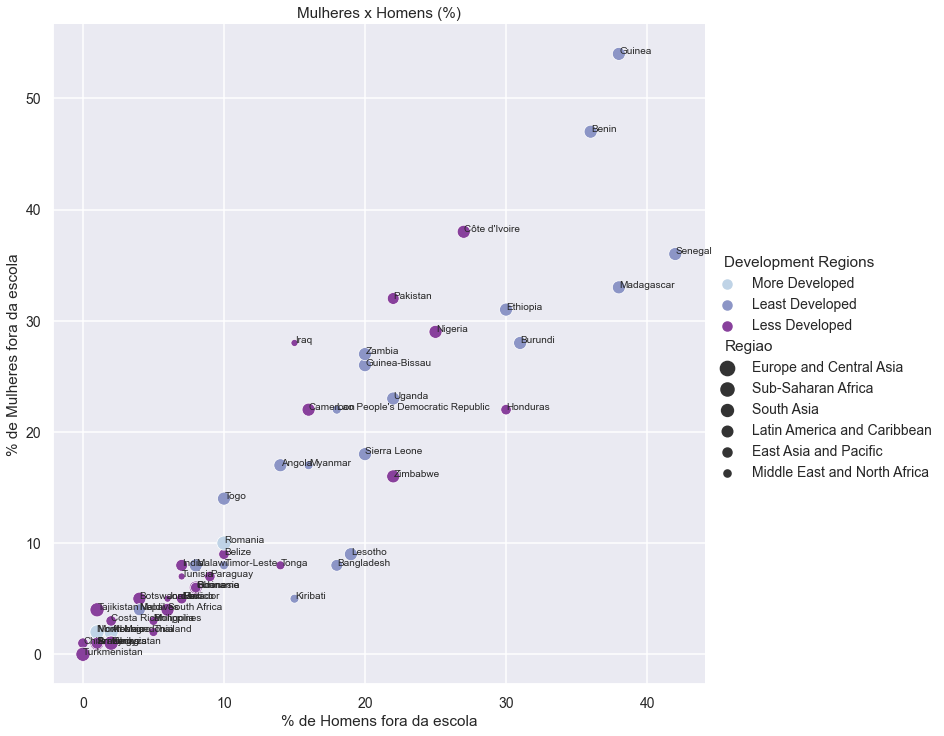

In [89]:
#plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid")
sns.set_context("talk", font_scale=0.85
               )
sns.relplot(
    data=ls_tratados,
    x="Male", y="Female", hue="Development Regions",
    size="Regiao",palette="BuPu", sizes=(50, 200), height = 10 
).set(title='Mulheres x Homens (%)')
plt.ylabel("% de Mulheres fora da escola")
plt.xlabel("% de Homens fora da escola")
#plt.title("Seaborn Default Legend Position")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=10)

label_point(ls_tratados.Male, ls_tratados.Female, ls_tratados['Countries and areas'], plt.gca()) 

plt.show()

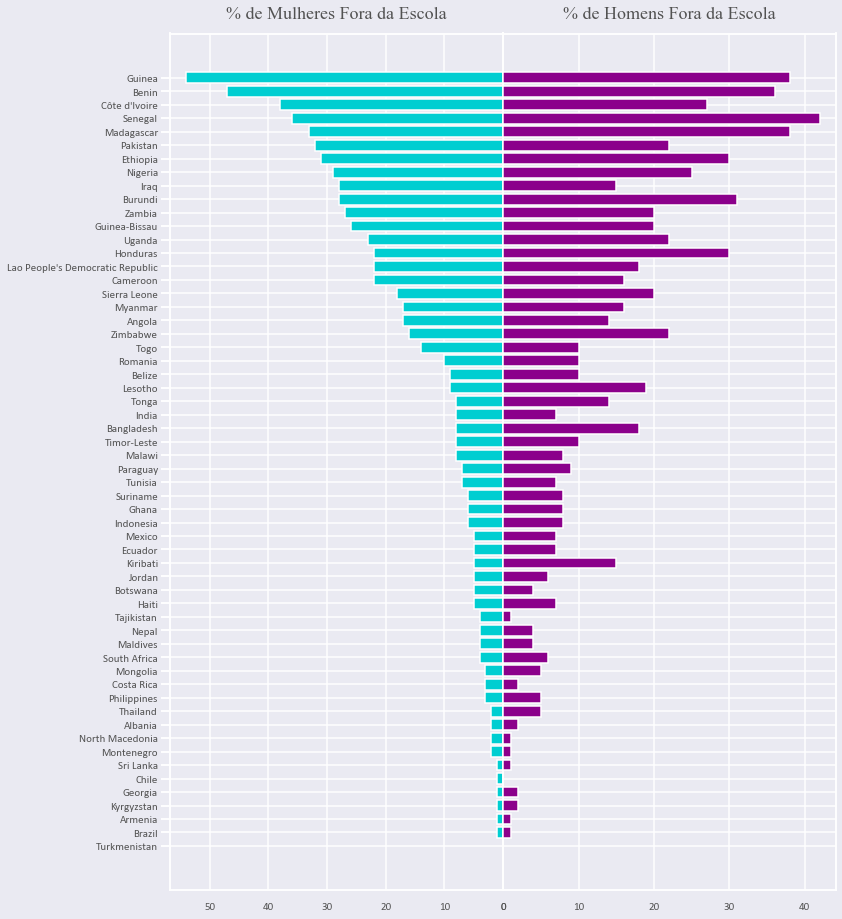

In [90]:
#Selecionando o dado que eu quero ordenado de acordo com o Female:
data = ls_tratados.sort_values(by=['Female'], ascending=False)[['Countries and areas','Female','Male']]
data.set_index('Countries and areas', inplace=True)


#Setando os parâmetros necessários para montar o gráfico:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
hfontitle = {'fontname':'Times New Roman'}
facecolor = '#eaeaf2'
color_title = '#525252'
color_red = '#00CED1'
color_blue = '#8B008B'
index = data.index
column0 = data['Female']
column1 = data['Male']
title0 = '% de Mulheres Fora da Escola'
title1 = '% de Homens Fora da Escola'

#Cosntruindo a figura:
fig, axes = plt.subplots(figsize=(12,14), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

#Plotando os gráficos de barra:
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_title, **hfontitle)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_title, **hfontitle)

#Invertendo o eixo do gráfico da esquerda:
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

#Modificando parametros de eixo:
axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


#Mudando a cor dos nomes de países
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=11, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=11, color=font_color, **hfont)

#Ajustando o plot:
plt.subplots_adjust(wspace=0, top=0.95, bottom=0.1, left=0.18, right=0.95)

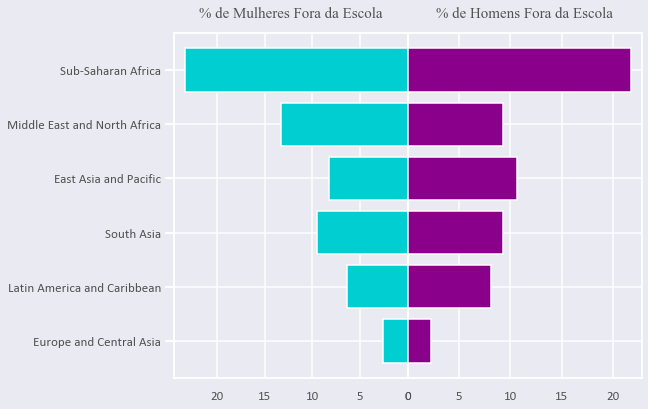

In [91]:
#Selecionando o dado que eu quero ordenado de acordo com o Total:
#data = pr_tratados.sort_values(by=['Total'], ascending=False)[['Regiao','Female','Male']]
#data = pr_tratados[['NomeRegiao','Female','Male']].groupby('NomeRegiao').mean().sort_values(by=['Female'], ascending=False)
data =ls_tratados[['Regiao','Female','Male', 'Total']].groupby('Regiao').mean().sort_values(by=['Total'], ascending=False)
#data = data.sort_values(by=['Total'], ascending=False)
#data.set_index('Regiao', inplace=True)
#data

#Setando os parâmetros necessários para montar o gráfico:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
hfontitle = {'fontname':'Times New Roman'}
facecolor = '#eaeaf2'
color_title = '#525252'
color_red = '#00CED1'
color_blue = '#8B008B'
index = data.index
column0 = data['Female']
column1 = data['Male']
title0 = '% de Mulheres Fora da Escola'
title1 = '% de Homens Fora da Escola'

#Cosntruindo a figura:
fig, axes = plt.subplots(figsize=(10,6), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

#Plotando os gráficos de barra:
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=15, pad=15, color=color_title, **hfontitle)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=15, pad=15, color=color_title, **hfontitle)

#Invertendo o eixo do gráfico da esquerda:
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

#Modificando parametros de eixo:
axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


#Mudando a cor dos nomes de países
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

#Ajustando o plot:
plt.subplots_adjust(wspace=0, top=0.9, bottom=0.1, left=0.25, right=0.9)

#### Condição Financeira 💵👑🤑

In [92]:
ls_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']].head()

Countries and areas  Total  Poorest_Wealth quintile  Second_Wealth quintile  \
0             Albania    2.0                      4.0                     2.0   
1              Angola   15.0                     31.0                    26.0   
2             Armenia    1.0                      1.0                     1.0   
3          Bangladesh   13.0                     19.0                    15.0   
4              Belize    9.0                     15.0                    13.0   

   Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  
0                     2.0                     1.0                      1.0  
1                    16.0                     6.0                      4.0  
2                     2.0                     0.0                      0.0  
3                    11.0                    11.0                      7.0  
4                     9.0                     4.0                      2.0

In [93]:
ls_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']].describe()

Total  Poorest_Wealth quintile  Second_Wealth quintile  \
count  58.000000                58.000000               58.000000   
mean   12.775862                22.362069               15.793103   
std    11.729470                19.244227               14.846299   
min     0.000000                 1.000000                0.000000   
25%     4.000000                 6.250000                5.250000   
50%     8.000000                15.000000                9.000000   
75%    19.750000                31.750000               26.000000   
max    46.000000                72.000000               59.000000   

       Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  
count               58.000000               58.000000                58.000000  
mean                11.922414                8.456897                 6.086207  
std                 12.077165                9.214921                 6.694550  
min                  0.000000                0.000000                 0.000000  
25%                  3.000000                2.000000                 1.250000  
50%                  7.000000                4.500000                 3.000000  
75%                 17.750000               12.750000                 8.500000  
max                 57.000000               39.000000                25.000000

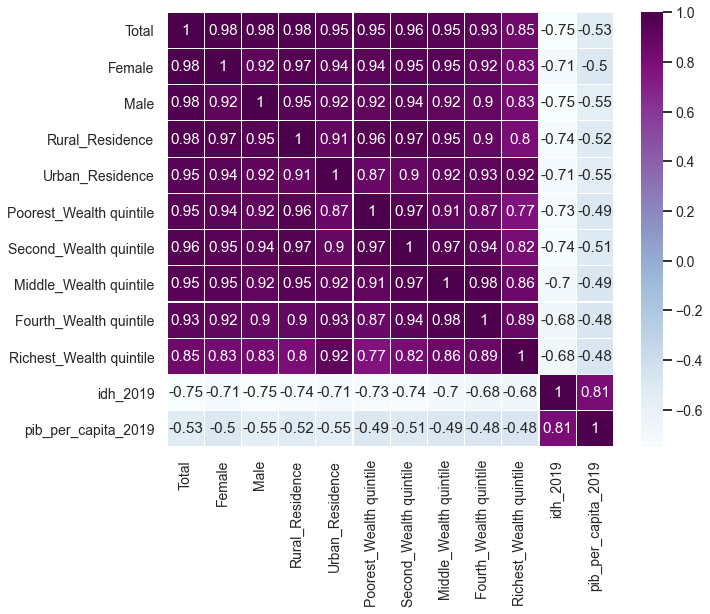

In [94]:
ls_heatmap = ls_tratados.drop(columns=['Time period', 'id_desenvolvimento_regiao', 'HDI Rank'])
sns.heatmap(ls_heatmap.corr(),annot=True,cmap='BuPu',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [95]:
ls_desigualdade = ls_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']]
ls_desigualdade['Diferença entre o mais rico e mais pobre'] = ls_desigualdade['Poorest_Wealth quintile'] - ls_desigualdade['Richest_Wealth quintile']
ls_desigualdade.sort_values(by=['Diferença entre o mais rico e mais pobre'], ascending=False).head(10)

Countries and areas  Total  Poorest_Wealth quintile  \
37             Nigeria   27.0                     68.0   
17              Guinea   46.0                     72.0   
29          Madagascar   36.0                     61.0   
39            Pakistan   27.0                     55.0   
5                Benin   41.0                     65.0   
43             Senegal   39.0                     57.0   
9             Cameroon   19.0                     40.0   
56              Zambia   23.0                     42.0   
44        Sierra Leone   19.0                     39.0   
12       Côte d'Ivoire   33.0                     50.0   

    Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
37                    34.0                    17.0                     7.0   
17                    59.0                    57.0                    39.0   
29                    47.0                    32.0                    24.0   
39                    31.0                    19.0                    15.0   
5                     52.0                    42.0                    31.0   
43                    47.0                    39.0                    34.0   
9                     27.0                    16.0                    10.0   
56                    32.0                    23.0                    17.0   
44                    29.0                    17.0                    10.0   
12                    37.0                    33.0                    25.0   

    Richest_Wealth quintile  Diferença entre o mais rico e mais pobre  
37                      5.0                                      63.0  
17                     20.0                                      52.0  
29                     12.0                                      49.0  
39                      7.0                                      48.0  
5                      18.0                                      47.0  
43                     17.0                                      40.0  
9                       5.0                                      35.0  
56                      9.0                                      33.0  
44                      7.0                                      32.0  
12                     22.0                                      28.0

In [96]:
Piores10_ls

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
17  GIN              Guinea    SSA        WCA     Least Developed   46.0   
5   BEN               Benin    SSA        WCA     Least Developed   41.0   
43  SEN             Senegal    SSA        WCA     Least Developed   39.0   
29  MDG          Madagascar    SSA        ESA     Least Developed   36.0   
12  CIV       Côte d'Ivoire    SSA        WCA      Less Developed   33.0   
14  ETH            Ethiopia    SSA        ESA     Least Developed   31.0   
8   BDI             Burundi    SSA        ESA     Least Developed   29.0   
39  PAK            Pakistan     SA         SA      Less Developed   27.0   
37  NGA             Nigeria    SSA        WCA      Less Developed   27.0   
20  HND            Honduras    LAC        LAC      Less Developed   26.0   

    Female  Male  Rural_Residence  Urban_Residence  ...  \
17    54.0  38.0             62.0             26.0  ...   
5     47.0  36.0             48.0             31.0  ...   
43    36.0  42.0             50.0             25.0  ...   
29    33.0  38.0             40.0             21.0  ...   
12    38.0  27.0             40.0             26.0  ...   
14    31.0  30.0             33.0             22.0  ...   
8     28.0  31.0             31.0             20.0  ...   
39    32.0  22.0             31.0             18.0  ...   
37    29.0  25.0             39.0             11.0  ...   
20    22.0  30.0             35.0             15.0  ...   

    Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
17                    57.0                    39.0                     20.0   
5                     42.0                    31.0                     18.0   
43                    39.0                    34.0                     17.0   
29                    32.0                    24.0                     12.0   
12                    33.0                    25.0                     22.0   
14                    28.0                    24.0                     20.0   
8                     26.0                    20.0                     22.0   
39                    19.0                    15.0                      7.0   
37                    17.0                     7.0                      5.0   
20                    23.0                    13.0                     16.0   

    Time period                       regiao  id_desenvolvimento_regiao  \
17       2018.0           Sub-Saharan Africa                          1   
5        2018.0           Sub-Saharan Africa                          1   
43       2019.0           Sub-Saharan Africa                          1   
29       2018.0           Sub-Saharan Africa                          1   
12       2016.0           Sub-Saharan Africa                          2   
14       2016.0           Sub-Saharan Africa                          1   
8        2017.0           Sub-Saharan Africa                          1   
39       2018.0                   South Asia                          2   
37       2018.0           Sub-Saharan Africa                          2   
20       2018.0  Latin America and Caribbean                          2   

   HDI Rank  idh_2019  pib_per_capita_2019     Faixa Total  
17      178     0.477           945.769349  Entre 40 e 50%  
5       158     0.545          1201.561388  Entre 40 e 50%  
43      168     0.512          1381.601793  Entre 30 e 40%  
29      164     0.528           488.913857  Entre 30 e 40%  
12      162     0.538          2327.745364  Entre 30 e 40%  
14      173     0.485           799.795134  Entre 30 e 40%  
8       185     0.433           278.319365  Entre 20 e 30%  
39      154     0.557          1487.357222  Entre 20 e 30%  
37      161     0.539          2502.652281  Entre 20 e 30%  
20      132     0.634          2499.492823  Entre 20 e 30%  

[10 rows x 22 columns]

#### Escala de desenvolvimento da região 📈🌍🗾

In [97]:
ls_tratados.groupby(["Development Regions"])[["ISO3"]].count()

ISO3
Development Regions      
Least Developed        21
Less Developed         33
More Developed          4

In [98]:
ls_tratados.pivot_table(index=["Development Regions"],
                        columns=["Faixa Total"],
                        values=["ISO3"],
                        aggfunc={"ISO3" : "count"},
                        fill_value=0,
                        margins=1,
                        margins_name="Total")

ISO3                                               \
Faixa Total         Até 10% Entre 10 e 20% Entre 20 e 30% Entre 30 e 40%   
Development Regions                                                        
Least Developed           5              7              4              3   
Less Developed           25              3              4              1   
More Developed            4              0              0              0   
Total                    34             10              8              4   

                                          
Faixa Total         Entre 40 e 50% Total  
Development Regions                       
Least Developed                  2    21  
Less Developed                   0    33  
More Developed                   0     4  
Total                            2    58

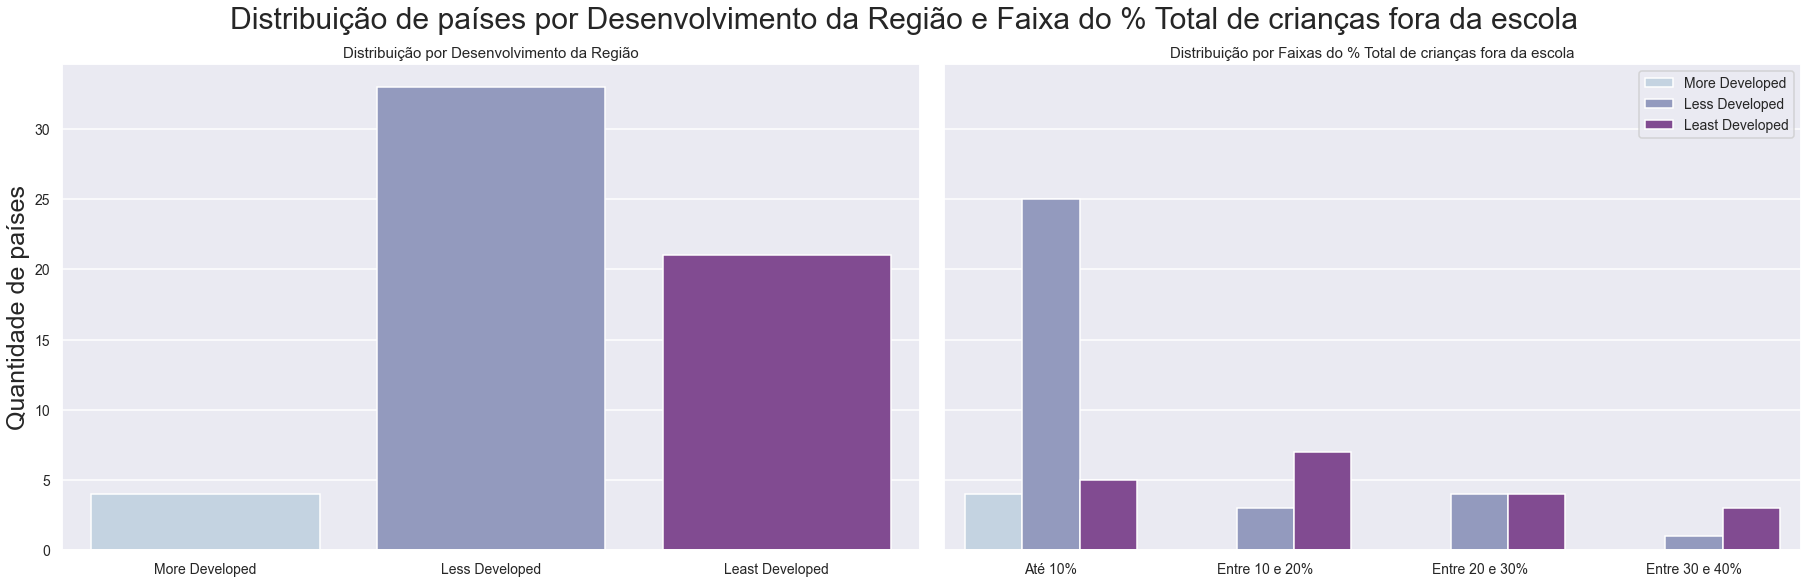

In [99]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(25,8)) 
fig.suptitle("Distribuição de países por Desenvolvimento da Região e Faixa do % Total de crianças fora da escola", fontsize=30)


sns.countplot(ax=axs[0], data = ls_tratados, x = "Development Regions", order=["More Developed", "Less Developed","Least Developed"], palette="BuPu")
sns.set_style("darkgrid")
axs[0].set_title("Distribuição por Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("Quantidade de países", fontsize=25)


sns.countplot(ax=axs[1], data = ls_tratados, x = "Faixa Total", hue="Development Regions", order=["Até 10%", "Entre 10 e 20%", "Entre 20 e 30%", "Entre 30 e 40%"],  hue_order=["More Developed", "Less Developed","Least Developed"], palette="BuPu")
plt.legend(loc="upper right")
axs[1].set_title("Distribuição por Faixas do % Total de crianças fora da escola", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)


plt.show()

In [100]:
ls_tratados.pivot_table(index=['regiao'],
                       columns=['Development Regions'],
                       values=['ISO3'],
                       aggfunc="count",
                       fill_value=0,
                       margins=1,
                       margins_name="Total")

ISO3                                \
Development Regions          Least Developed Less Developed More Developed   
regiao                                                                       
East Asia and Pacific                      4              5              0   
Europe and Central Asia                    0              5              4   
Latin America and Caribbean                1              9              0   
Middle East and North Africa               0              3              0   
South Asia                                 2              4              0   
Sub-Saharan Africa                        14              7              0   
Total                                     21             33              4   

                                    
Development Regions          Total  
regiao                              
East Asia and Pacific            9  
Europe and Central Asia          9  
Latin America and Caribbean     10  
Middle East and North Africa     3  
South Asia                       6  
Sub-Saharan Africa              21  
Total                           58

In [101]:
ls_tratados.groupby(["Development Regions", "regiao", "Countries and areas"])[["Total"]].mean().sort_values(["Development Regions", "regiao", "Total"], ascending=False)

Total
Development Regions regiao                       Countries and areas                    
More Developed      Europe and Central Asia      Romania                            10.0
                                                 Albania                             2.0
                                                 North Macedonia                     2.0
                                                 Montenegro                          1.0
Less Developed      Sub-Saharan Africa           Côte d'Ivoire                      33.0
                                                 Nigeria                            27.0
                                                 Cameroon                           19.0
                                                 Zimbabwe                           19.0
                                                 Ghana                               7.0
                                                 South Africa                        5.0
                                                 Botswana                            4.0
                    South Asia                   Pakistan                           27.0
                                                 India                               7.0
                                                 Maldives                            4.0
                                                 Sri Lanka                           1.0
                    Middle East and North Africa Iraq                               21.0
                                                 Tunisia                             7.0
                                                 Jordan                              5.0
                    Latin America and Caribbean  Honduras                           26.0
                                                 Belize                              9.0
                                                 Paraguay                            8.0
                                                 Suriname                            7.0
                                                 Ecuador                             6.0
                                                 Mexico                              6.0
                                                 Costa Rica                          3.0
                                                 Brazil                              1.0
                                                 Chile                               1.0
                    Europe and Central Asia      Tajikistan                          3.0
                                                 Armenia                             1.0
                                                 Georgia                             1.0
                                                 Kyrgyzstan                          1.0
                                                 Turkmenistan                        0.0
                    East Asia and Pacific        Tonga                              11.0
                                                 Indonesia                           7.0
                                                 Mongolia                            4.0
                                                 Philippines                         4.0
                                                 Thailand                            3.0
Least Developed     Sub-Saharan Africa           Guinea                             46.0
                                                 Benin                              41.0
                                                 Senegal                            39.0
                                                 Madagascar                         36.0
                                                 Ethiopia                           31.0
                                                 Burundi                            29.0
                                                 Guinea-Bissau                

Text(0, 0.5, '')

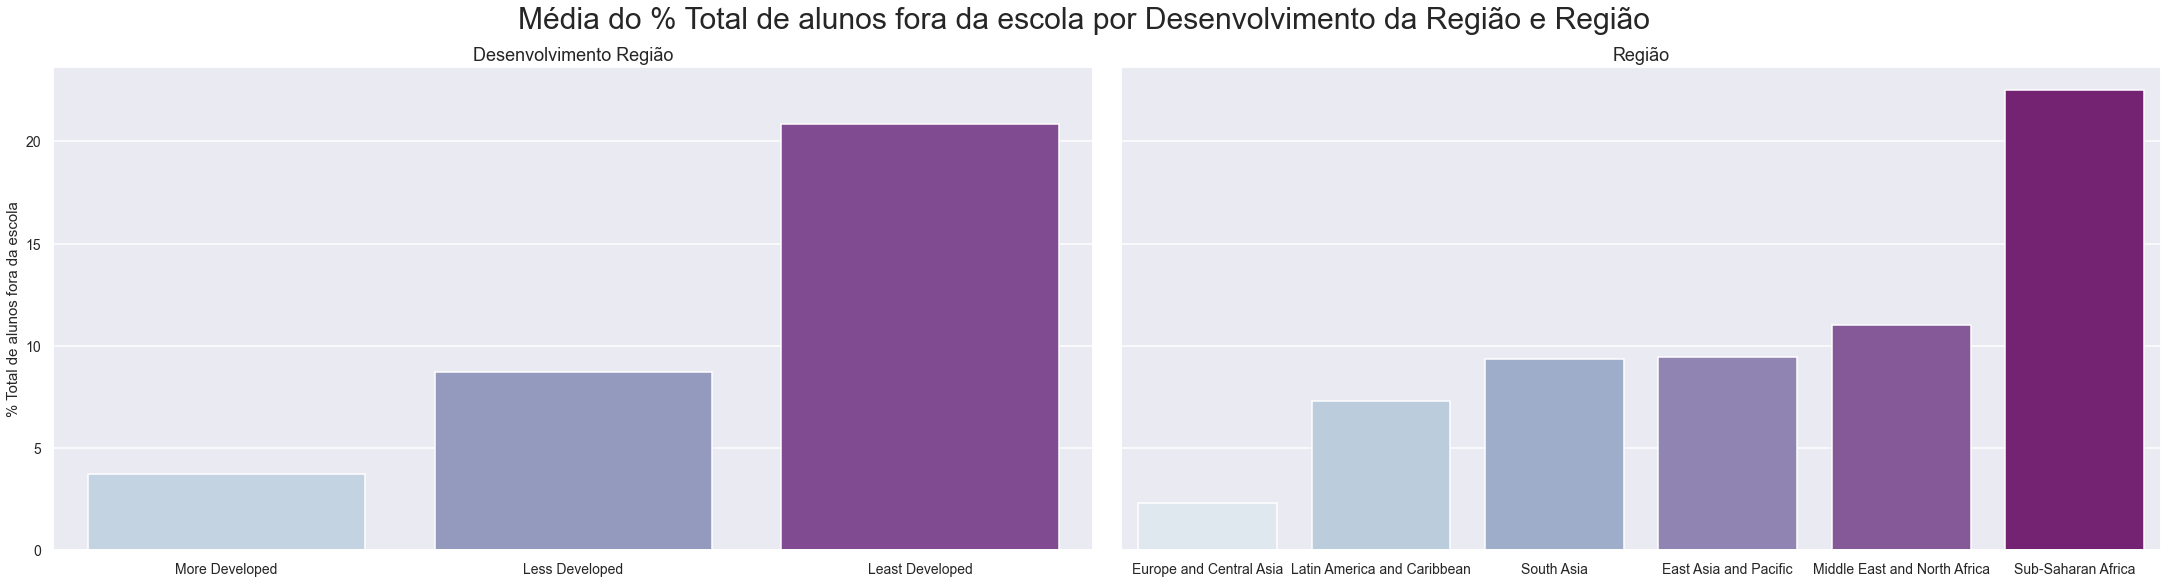

In [102]:
# Gráfico de colunas do % total de crianças fora da escola

ls_media_dev_regiao = ls_tratados.groupby(["Development Regions"])[["Total"]].mean().sort_values("Total").reset_index()
ls_media_regiao = ls_tratados.groupby(["regiao"])[["Total"]].mean().sort_values("Total").reset_index()


fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(30,8)) 
fig.suptitle("Média do % Total de alunos fora da escola por Desenvolvimento da Região e Região", fontsize=30)

sns.barplot(ax=axs[0], x="Development Regions", y='Total', data=ls_media_dev_regiao, palette="BuPu")
axs[0].set_title("Desenvolvimento Região", fontsize=18)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.barplot(ax=axs[1], x="regiao", y='Total', data=ls_media_regiao, palette="BuPu")
axs[1].set_title("Região", fontsize=18)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

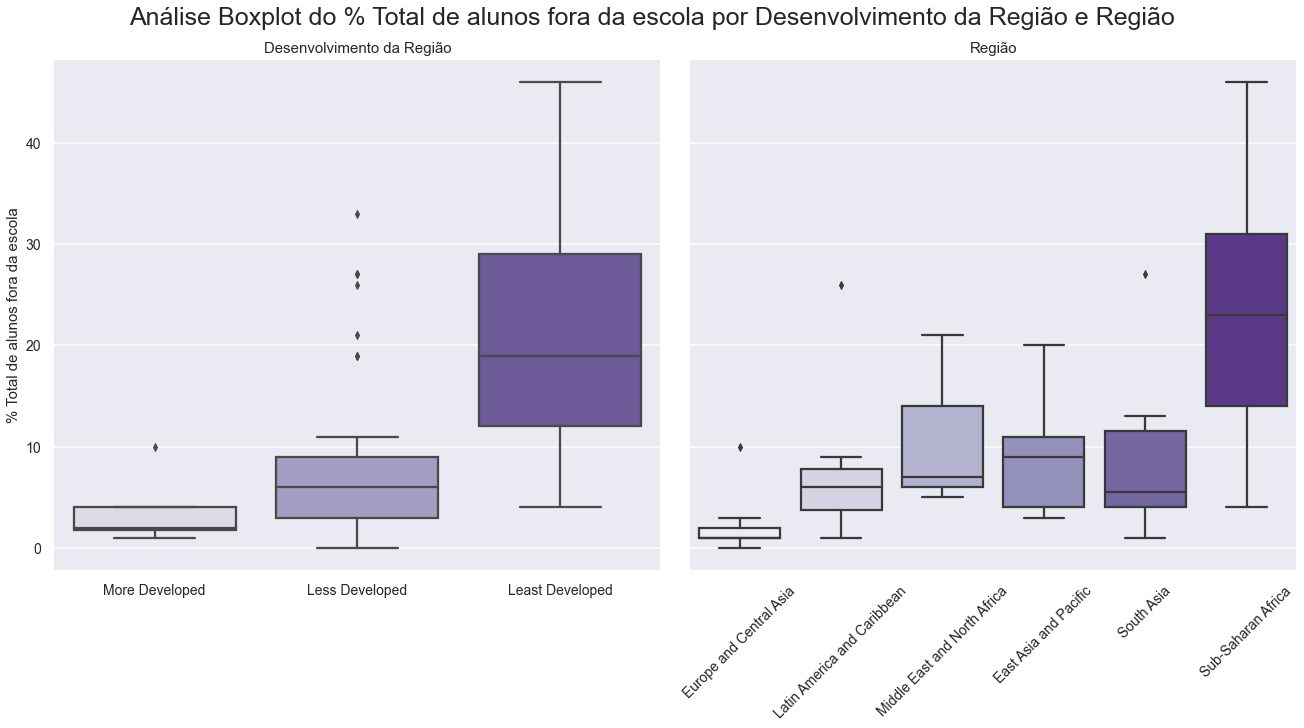

In [103]:
# Gráfico de boxplot do % total de crianças fora da escola

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(18,10)) 
fig.suptitle("Análise Boxplot do % Total de alunos fora da escola por Desenvolvimento da Região e Região", fontsize=25)


sns.boxplot(ax=axs[0], x="Development Regions", y='Total', data=ls_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.boxplot(ax=axs[1], x="regiao", y='Total', data=ls_tratados, order=['Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'East Asia and Pacific', 'South Asia', 'Sub-Saharan Africa' ], palette="Purples")
plt.xticks(rotation=45)
axs[1].set_title("Região", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)


plt.show()

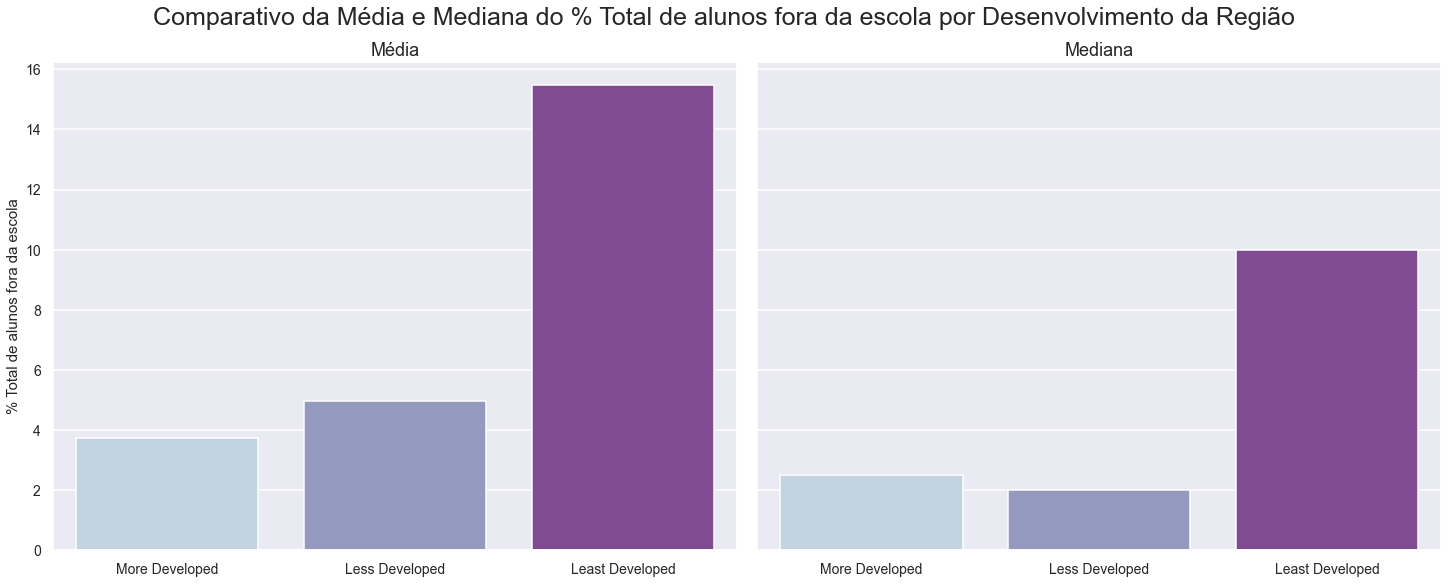

In [104]:
# comparativo da média e mediana

ls_mediana = pr_tratados.groupby(["Development Regions"])[["Total"]].median().sort_values("Total").reset_index()
ls_media = pr_tratados.groupby(["Development Regions"])[["Total"]].mean().sort_values("Total").reset_index()


fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(20,8)) 
fig.suptitle("Comparativo da Média e Mediana do % Total de alunos fora da escola por Desenvolvimento da Região", fontsize=25)

sns.barplot(ax=axs[0], x="Development Regions", y='Total', data=ls_media, order=['More Developed',  'Less Developed', 'Least Developed'], palette="BuPu")
axs[0].set_title("Média", fontsize=18)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.barplot(ax=axs[1], x="Development Regions", y='Total', data=ls_mediana, order=['More Developed',  'Less Developed', 'Least Developed'], palette="BuPu")
axs[1].set_title("Mediana", fontsize=18)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

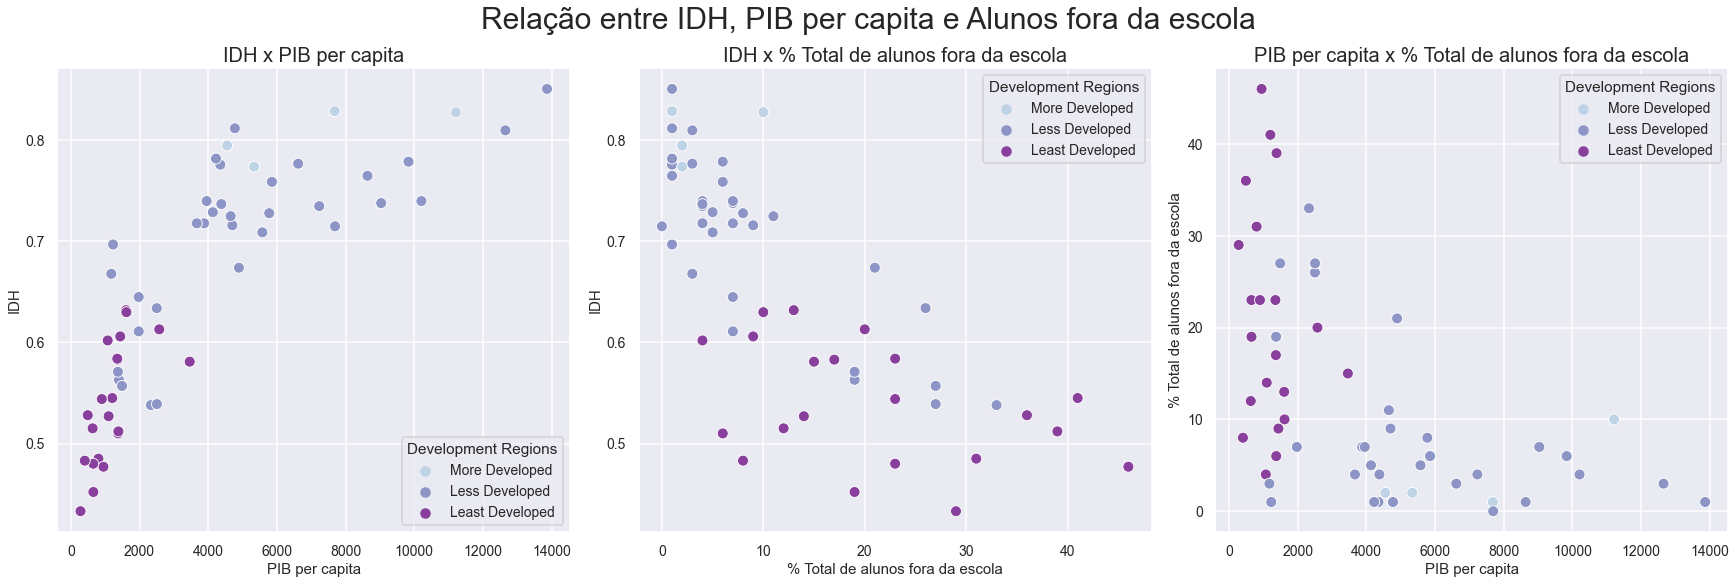

In [105]:
fig, axs = plt.subplots(1, 3, constrained_layout = True, figsize=(24,8)) 
fig.suptitle("Relação entre IDH, PIB per capita e Alunos fora da escola", fontsize=30)

# formato dos valores do dicionário [x, y, titulo, label x, label y]

dfs_infos = {0 : ["pib_per_capita_2019", "idh_2019", "IDH x PIB per capita", "PIB per capita", "IDH"],
             1 : ["Total", "idh_2019", "IDH x % Total de alunos fora da escola", "% Total de alunos fora da escola", "IDH"],
             2 : ["pib_per_capita_2019", "Total", "PIB per capita x % Total de alunos fora da escola", "PIB per capita", "% Total de alunos fora da escola"]}

lista_corr = []

for i in dfs_infos.keys():

    x = dfs_infos[i][0]
    y = dfs_infos[i][1]
    titulo = dfs_infos[i][2]
    label_x = dfs_infos[i][3]
    label_y = dfs_infos[i][4]

    sns.scatterplot(ax=axs[i], x=x, y=y, data=ls_tratados, hue='Development Regions', s=120, palette="BuPu", hue_order=["More Developed", "Less Developed", "Least Developed"])
    sns.set_style("darkgrid")
    axs[i].set_title(titulo, fontsize=20)
    axs[i].set_xlabel(label_x, fontsize=15)
    axs[i].set_ylabel(label_y, fontsize=15)


    # correlação entre variáveis e formatação do texto para imprimir

    correlacao = round(ls_tratados[x].corr(ls_tratados[y]), 2)
    txt = titulo + ": " + str(correlacao)
    lista_corr.append(txt)


plt.show()

In [106]:
print("Coeficiente de correlação de Pearson\n")

for txt in lista_corr:
    print(txt) 
    

Coeficiente de correlação de Pearson

IDH x PIB per capita: 0.81
IDH x % Total de alunos fora da escola: -0.75
PIB per capita x % Total de alunos fora da escola: -0.53


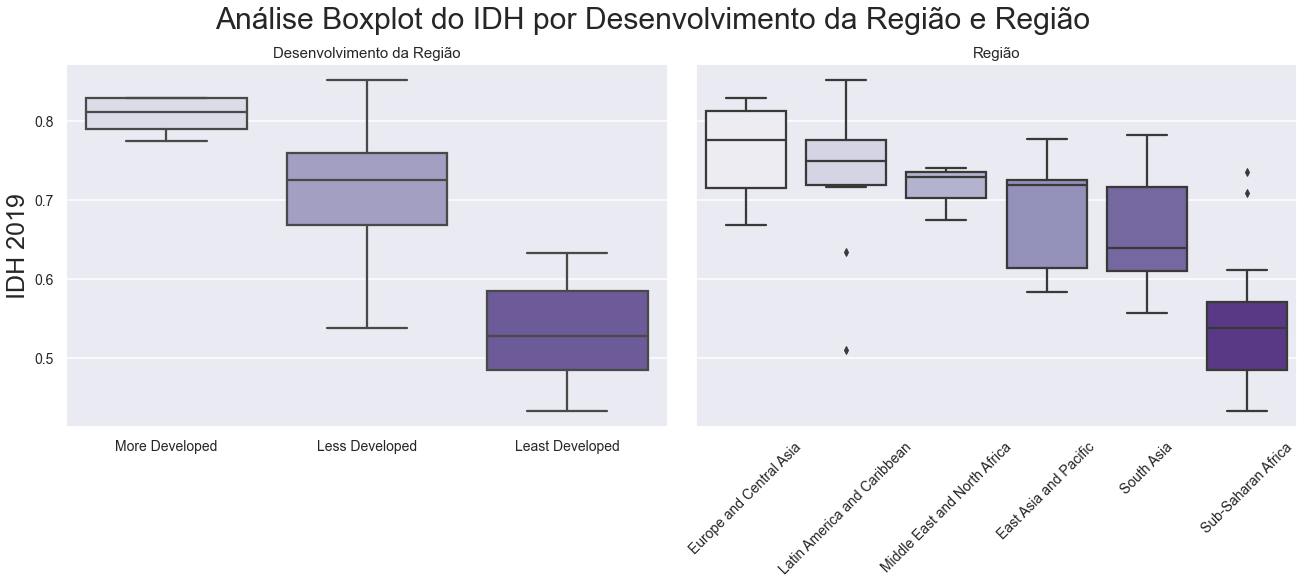

In [107]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(18,8)) 
fig.suptitle("Análise Boxplot do IDH por Desenvolvimento da Região e Região", fontsize=30)


sns.boxplot(ax=axs[0], x="Development Regions", y='idh_2019', data=ls_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("IDH 2019", fontsize=25)


sns.boxplot(ax=axs[1], x="regiao", y='idh_2019', data=ls_tratados, order=['Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'East Asia and Pacific', 'South Asia', 'Sub-Saharan Africa' ], palette="Purples")
plt.xticks(rotation=45)
axs[1].set_title("Região", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

## 4) Análise Upper Secondary

### Análise Exploratória  📊🔎📈

In [108]:
us.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   58.0   
1  ALB             Albania    ECA       EECA      More Developed   12.0   
2  DZA             Algeria   MENA       MENA      Less Developed   25.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   29.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    73.0  43.0             63.0             45.0                     70.0   
1    12.0  12.0             16.0              9.0                     27.0   
2    23.0  28.0             33.0             21.0                     40.0   
3     NaN   NaN              NaN              NaN                      NaN   
4    35.0  21.0             53.0             19.0                     58.0   

   Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
0                    64.0                    64.0                    54.0   
1                    11.0                    11.0                     5.0   
2                    29.0                    24.0                    20.0   
3                     NaN                     NaN                     NaN   
4                    50.0                    27.0                    17.0   

   Richest_Wealth quintile   Data source  Time period  
0                     40.0      DHS 2015       2015.0  
1                      5.0   DHS 2017-18       2018.0  
2                     12.0  MICS 2012-13       2013.0  
3                      NaN           NaN          NaN  
4                      9.0   DHS 2015-16       2016.0

In [109]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     202 non-null    object 
 1   Countries and areas      202 non-null    object 
 2   Region                   200 non-null    object 
 3   Sub-region               200 non-null    object 
 4   Development Regions      202 non-null    object 
 5   Total                    108 non-null    float64
 6   Female                   108 non-null    float64
 7   Male                     108 non-null    float64
 8   Rural_Residence          106 non-null    float64
 9   Urban_Residence          106 non-null    float64
 10  Poorest_Wealth quintile  101 non-null    float64
 11  Second_Wealth quintile   101 non-null    float64
 12  Middle_Wealth quintile   101 non-null    float64
 13  Fourth_Wealth quintile   101 non-null    float64
 14  Richest_Wealth quintile  1

In [110]:
us.describe()

Total      Female        Male  Rural_Residence  Urban_Residence  \
count  108.000000  108.000000  108.000000       106.000000       106.000000   
mean    30.268519   31.472222   28.833333        36.518868        23.556604   
std     19.849719   22.820493   17.692334        22.581168        15.129335   
min      1.000000    1.000000    0.000000         1.000000         0.000000   
25%     15.000000   14.000000   15.000000        19.000000        12.250000   
50%     25.500000   26.500000   26.000000        34.000000        20.000000   
75%     43.000000   49.000000   43.000000        54.750000        32.750000   
max     86.000000   91.000000   79.000000        95.000000        70.000000   

       Poorest_Wealth quintile  Second_Wealth quintile  \
count               101.000000              101.000000   
mean                 46.960396               37.891089   
std                  24.739410               24.458905   
min                   0.000000                1.000000   
25%                  29.000000               18.000000   
50%                  44.000000               36.000000   
75%                  68.000000               57.000000   
max                  99.000000               97.000000   

       Middle_Wealth quintile  Fourth_Wealth quintile  \
count              101.000000              101.000000   
mean                32.386139               25.524752   
std                 22.197284               19.998297   
min                  0.000000                0.000000   
25%                 15.000000               11.000000   
50%                 27.000000               20.000000   
75%                 45.000000               37.000000   
max                 97.000000               92.000000   

       Richest_Wealth quintile  Time period  
count               101.000000   108.000000  
mean                 16.910891  2015.527778  
std                  15.049318     2.577611  
min                   0.000000  2010.000000  
25%                   6.000000  2014.000000  
50%                  12.000000  2016.000000  
75%                  24.000000  2018.000000  
max                  63.000000  2019.000000

### Limpeza e tratamento dos dados 🧹🎲

In [111]:
# Adicionando datasets de informações e idh no dataframe Primary
us = us.merge(regioes[["id_regiao", "regiao"]], how='left', left_on='Region', right_on='id_regiao')
us = us.merge(desenv_regioes, how='left', left_on='Development Regions', right_on='desenvolvimento_regiao')
us = us.merge(idh, how='left', left_on='Countries and areas', right_on='pais_regiao')
us = us.merge(pib[["Country Code", "pib_per_capita_2019"]], how="left", left_on="ISO3", right_on="Country Code").drop(["Country Code"], axis=1)

us_mesclado = us.copy() #plotar o gráfico comparativo

us.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   58.0   
1  ALB             Albania    ECA       EECA      More Developed   12.0   
2  DZA             Algeria   MENA       MENA      Less Developed   25.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   29.0   

   Female  Male  Rural_Residence  Urban_Residence  ...   Data source  \
0    73.0  43.0             63.0             45.0  ...      DHS 2015   
1    12.0  12.0             16.0              9.0  ...   DHS 2017-18   
2    23.0  28.0             33.0             21.0  ...  MICS 2012-13   
3     NaN   NaN              NaN              NaN  ...           NaN   
4    35.0  21.0             53.0             19.0  ...   DHS 2015-16   

   Time period  id_regiao                        regiao  \
0       2015.0         SA                    South Asia   
1       2018.0        ECA       Europe and Central Asia   
2       2013.0       MENA  Middle East and North Africa   
3          NaN        ECA       Europe and Central Asia   
4       2016.0        SSA            Sub-Saharan Africa   

   id_desenvolvimento_regiao desenvolvimento_regiao  HDI Rank  pais_regiao  \
0                          1        Least Developed       169  Afghanistan   
1                          3         More Developed        69      Albania   
2                          2         Less Developed        91      Algeria   
3                          3         More Developed        36      Andorra   
4                          1        Least Developed       148       Angola   

  idh_2019  pib_per_capita_2019  
0    0.511           577.563058  
1    0.795          4549.457441  
2    0.748          4111.306192  
3    0.868         39003.384448  
4    0.581          3458.650512  

[5 rows x 25 columns]

In [112]:
# Adicionando uma coluna de faixas do total

us.loc[us["Total"] <= 10, "Faixa Total"] = "Até 10%"
us.loc[(us["Total"] > 10) & (us["Total"] <= 20), "Faixa Total"] = "Entre 10 e 20%"
us.loc[(us["Total"] > 20) & (us["Total"] <= 30), "Faixa Total"] = "Entre 20 e 30%"
us.loc[(us["Total"] > 30) & (us["Total"] <= 40), "Faixa Total"] = "Entre 30 e 40%"
us.loc[(us["Total"] > 40) & (us["Total"] <= 50), "Faixa Total"] = "Entre 40 e 50%"

us.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   58.0   
1  ALB             Albania    ECA       EECA      More Developed   12.0   
2  DZA             Algeria   MENA       MENA      Less Developed   25.0   
3  AND             Andorra    ECA         WE      More Developed    NaN   
4  AGO              Angola    SSA        ESA     Least Developed   29.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  Time period  \
0    73.0  43.0             63.0             45.0  ...       2015.0   
1    12.0  12.0             16.0              9.0  ...       2018.0   
2    23.0  28.0             33.0             21.0  ...       2013.0   
3     NaN   NaN              NaN              NaN  ...          NaN   
4    35.0  21.0             53.0             19.0  ...       2016.0   

   id_regiao                        regiao  id_desenvolvimento_regiao  \
0         SA                    South Asia                          1   
1        ECA       Europe and Central Asia                          3   
2       MENA  Middle East and North Africa                          2   
3        ECA       Europe and Central Asia                          3   
4        SSA            Sub-Saharan Africa                          1   

   desenvolvimento_regiao HDI Rank  pais_regiao idh_2019 pib_per_capita_2019  \
0         Least Developed      169  Afghanistan    0.511          577.563058   
1          More Developed       69      Albania    0.795         4549.457441   
2          Less Developed       91      Algeria    0.748         4111.306192   
3          More Developed       36      Andorra    0.868        39003.384448   
4         Least Developed      148       Angola    0.581         3458.650512   

      Faixa Total  
0             NaN  
1  Entre 10 e 20%  
2  Entre 20 e 30%  
3             NaN  
4  Entre 20 e 30%  

[5 rows x 26 columns]

In [113]:
# Tratamento de países e regiões

# Nomeando as regiões desses países
#Canadá
us['Region'][33]='NA'
us['Sub-region'][33]='NA'

#USA
us['Region'][193]='NA'
us['Sub-region'][193]='NA'

# eliminando regiões sem nenhum dado que não é possível assumir uma média
us.drop(us[us['Sub-region'] == 'WE'].index, inplace=True)
us.drop(us[us['Sub-region'] == 'NA'].index, inplace=True)

us_pais_com_dados = us.copy() # plotar o gráfico comparativo


# Exclusão de dados anteriores a 2016

us = us[us["Time period"] >= 2016]

us.reset_index(inplace=True)
us.drop(['index'], axis=1, inplace=True) 

us_pais_com_dados_recente = us.copy()

In [114]:
# preenchendo espaços vazios
subRegions = us['Sub-region'].unique()
for i in subRegions:
    us.loc[us['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ]= us.loc[us['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ].fillna(us[us['Sub-region']==i].median().round(1))

In [115]:
# Exclusão de HDI sem informações
us.dropna(subset=["HDI Rank"], inplace=True)

In [116]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       57 non-null     object 
 1   Countries and areas        57 non-null     object 
 2   Region                     57 non-null     object 
 3   Sub-region                 57 non-null     object 
 4   Development Regions        57 non-null     object 
 5   Total                      57 non-null     float64
 6   Female                     57 non-null     float64
 7   Male                       57 non-null     float64
 8   Rural_Residence            57 non-null     float64
 9   Urban_Residence            57 non-null     float64
 10  Poorest_Wealth quintile    57 non-null     float64
 11  Second_Wealth quintile     57 non-null     float64
 12  Middle_Wealth quintile     57 non-null     float64
 13  Fourth_Wealth quintile     57 non-null     float64
 

In [117]:
# organizando o novo dataframe tratado
us.drop(['desenvolvimento_regiao', 'pais_regiao', 'id_regiao', 'Data source'], axis=1, inplace=True)
us.to_csv('us_tratados.csv', index=False)

### Análise dos dados 🔎🎲

#### Análise geral 📊📉📈

In [118]:
# importando e lendo o dataframe modificado
us_tratados = pd.read_csv('us_tratados.csv')
us_tratados.head()

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  ALB             Albania    ECA       EECA      More Developed   12.0   
1  AGO              Angola    SSA        ESA     Least Developed   29.0   
2  ARM             Armenia    ECA       EECA      Less Developed    7.0   
3  BGD          Bangladesh     SA         SA     Least Developed   31.0   
4  BLZ              Belize    LAC        LAC      Less Developed   33.0   

   Female  Male  Rural_Residence  Urban_Residence  ...  \
0    12.0  12.0             16.0              9.0  ...   
1    35.0  21.0             53.0             19.0  ...   
2     4.0   9.0              9.0              5.0  ...   
3    26.0  37.0             32.0             30.0  ...   
4    35.0  30.0             38.0             24.0  ...   

   Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
0                    11.0                     5.0                      5.0   
1                    27.0                    17.0                      9.0   
2                    10.0                     5.0                      2.0   
3                    29.0                    28.0                     19.0   
4                    40.0                    13.0                      7.0   

   Time period                       regiao  id_desenvolvimento_regiao  \
0       2018.0      Europe and Central Asia                          3   
1       2016.0           Sub-Saharan Africa                          1   
2       2016.0      Europe and Central Asia                          2   
3       2019.0                   South Asia                          1   
4       2016.0  Latin America and Caribbean                          2   

  HDI Rank  idh_2019  pib_per_capita_2019     Faixa Total  
0       69     0.795          4549.457441  Entre 10 e 20%  
1      148     0.581          3458.650512  Entre 20 e 30%  
2       81     0.776          4350.466198         Até 10%  
3      133     0.632          1603.953501  Entre 30 e 40%  
4      110     0.716          4701.089242  Entre 30 e 40%  

[5 rows x 22 columns]

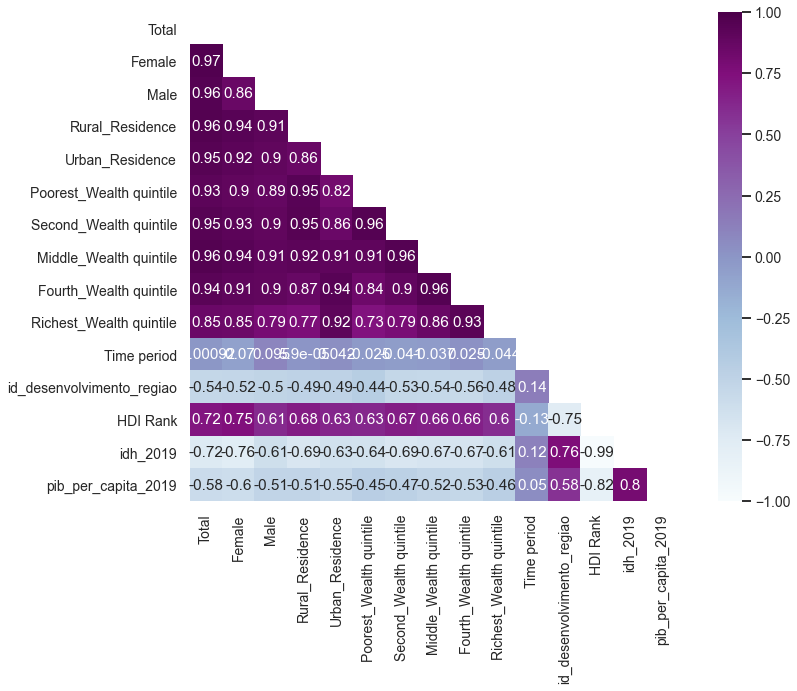

In [119]:
# Gráfico correlacional
corr = us_tratados.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 9))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, center=0, cmap="BuPu", square=True)

<function matplotlib.pyplot.show(close=None, block=None)>

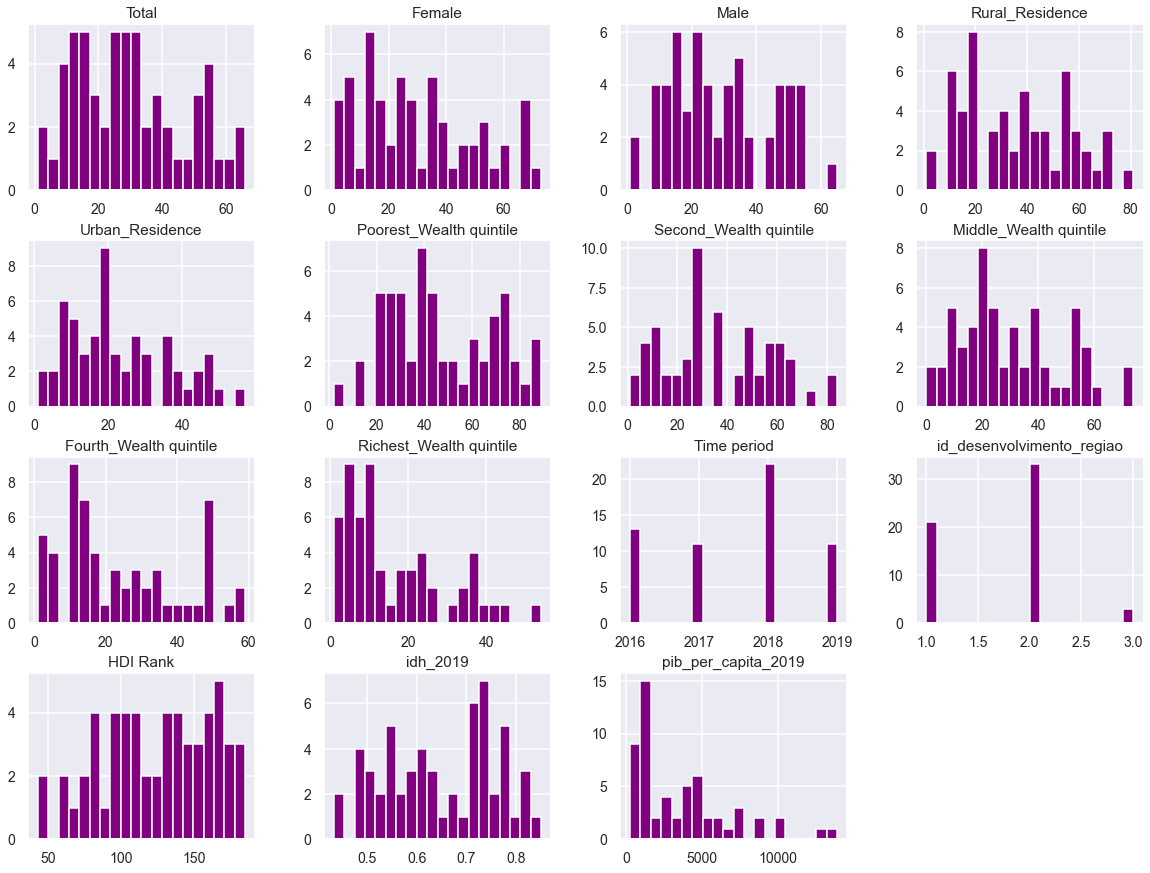

In [120]:
# plotagem de gráfico
us_tratados.hist(bins=20, figsize=(20, 15), color="purple")
plt.show

In [121]:
Piores10_us=us_tratados.sort_values(by=['Total'], ascending=False).head(10)
Piores10_us

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
29  MDG          Madagascar    SSA        ESA     Least Developed   66.0   
17  GIN              Guinea    SSA        WCA     Least Developed   63.0   
54  UGA              Uganda    SSA        ESA     Least Developed   61.0   
5   BEN               Benin    SSA        WCA     Least Developed   58.0   
12  CIV       Côte d'Ivoire    SSA        WCA      Less Developed   56.0   
42  SEN             Senegal    SSA        WCA     Least Developed   55.0   
14  ETH            Ethiopia    SSA        ESA     Least Developed   54.0   
8   BDI             Burundi    SSA        ESA     Least Developed   54.0   
55  ZMB              Zambia    SSA        ESA     Least Developed   52.0   
35  MMR             Myanmar    EAP        EAP     Least Developed   52.0   

    Female  Male  Rural_Residence  Urban_Residence  ...  \
29    67.0  65.0             72.0             47.0  ...   
17    73.0  50.0             81.0             40.0  ...   
54    68.0  53.0             62.0             57.0  ...   
5     66.0  50.0             65.0             50.0  ...   
12    66.0  46.0             70.0             47.0  ...   
42    56.0  53.0             69.0             40.0  ...   
14    59.0  48.0             58.0             41.0  ...   
8     54.0  53.0             55.0             44.0  ...   
55    61.0  44.0             58.0             46.0  ...   
35    49.0  54.0             58.0             35.0  ...   

    Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
29                    74.0                    59.0                     32.0   
17                    73.0                    56.0                     33.0   
54                    57.0                    57.0                     54.0   
5                     61.0                    48.0                     36.0   
12                    54.0                    50.0                     44.0   
42                    57.0                    49.0                     33.0   
14                    56.0                    48.0                     43.0   
8                     54.0                    46.0                     39.0   
55                    51.0                    50.0                     36.0   
35                    53.0                    43.0                     24.0   

    Time period                 regiao  id_desenvolvimento_regiao HDI Rank  \
29       2018.0     Sub-Saharan Africa                          1      164   
17       2018.0     Sub-Saharan Africa                          1      178   
54       2016.0     Sub-Saharan Africa                          1      159   
5        2018.0     Sub-Saharan Africa                          1      158   
12       2016.0     Sub-Saharan Africa                          2      162   
42       2019.0     Sub-Saharan Africa                          1      168   
14       2016.0     Sub-Saharan Africa                          1      173   
8        2017.0     Sub-Saharan Africa                          1      185   
55       2018.0     Sub-Saharan Africa                          1      146   
35       2016.0  East Asia and Pacific                          1      147   

    idh_2019  pib_per_capita_2019  Faixa Total  
29     0.528           488.913857          NaN  
17     0.477           945.769349          NaN  
54     0.544           898.407515          NaN  
5      0.545          1201.561388          NaN  
12     0.538          2327.745364          NaN  
42     0.512          1381.601793          NaN  
14     0.485           799.795134          NaN  
8      0.433           278.319365          NaN  
55     0.584          1348.743220          NaN  
35     0.583          1362.725439          NaN  

[10 rows x 22 columns]

#### Região  🏡📍

In [122]:
# ordenando por regiões menos desenvolvidas
us_tratados[['regiao', 'Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','id_desenvolvimento_regiao', 'idh_2019']].sort_values(['Development Regions'])

regiao               Countries and areas  \
28            Sub-Saharan Africa                           Lesotho   
30            Sub-Saharan Africa                            Malawi   
29            Sub-Saharan Africa                        Madagascar   
55            Sub-Saharan Africa                            Zambia   
27         East Asia and Pacific  Lao People's Democratic Republic   
25         East Asia and Pacific                          Kiribati   
42            Sub-Saharan Africa                           Senegal   
43            Sub-Saharan Africa                      Sierra Leone   
19   Latin America and Caribbean                             Haiti   
18            Sub-Saharan Africa                     Guinea-Bissau   
17            Sub-Saharan Africa                            Guinea   
36                    South Asia                             Nepal   
14            Sub-Saharan Africa                          Ethiopia   
35         East Asia and Pacific                           Myanmar   
1             Sub-Saharan Africa                            Angola   
54            Sub-Saharan Africa                            Uganda   
49         East Asia and Pacific                       Timor-Leste   
50            Sub-Saharan Africa                              Togo   
8             Sub-Saharan Africa                           Burundi   
3                     South Asia                        Bangladesh   
5             Sub-Saharan Africa                             Benin   
47       Europe and Central Asia                        Tajikistan   
53       Europe and Central Asia                      Turkmenistan   
37            Sub-Saharan Africa                           Nigeria   
40   Latin America and Caribbean                          Paraguay   
46   Latin America and Caribbean                          Suriname   
41         East Asia and Pacific                       Philippines   
52  Middle East and North Africa                           Tunisia   
51         East Asia and Pacific                             Tonga   
48         East Asia and Pacific                          Thailand   
45                    South Asia                         Sri Lanka   
39                    South Asia                          Pakistan   
44            Sub-Saharan Africa                      South Africa   
56            Sub-Saharan Africa                          Zimbabwe   
15       Europe and Central Asia                           Georgia   
7    Latin America and Caribbean                            Brazil   
9             Sub-Saharan Africa                          Cameroon   
10   Latin America and Caribbean                             Chile   
11   Latin America and Caribbean                        Costa Rica   
12            Sub-Saharan Africa                     Côte d'Ivoire   
13   Latin America and Caribbean                           Ecuador   
33         East Asia and Pacific                          Mongolia   
16            Sub-Saharan Africa                             Ghana   
20   Latin America and Caribbean                          Honduras   
21                    South Asia                             India   
22         East Asia and Pacific                         Indonesia   
23  Middle East and North Africa                              Iraq   
24  Middle East and North Africa                            Jordan   
2        Europe and Central Asia                           Armenia   
26       Europe and Central Asia                        Kyrgyzstan   
31                    South Asia                          Maldives   
32   Latin America and Caribbean                            Mexico   
6             Sub-Saharan Africa                          Botswana   
4    Latin America and Caribbean                            Belize   
34       Europe and Central Asia                        Montenegro   
38       Europe and Central Asia                   North Macedonia   
0        Europe and Central Asia    

In [123]:
#Verificando a média do % de pessoas fora da escola em cada zona de residência e relacionando 
# com o desenvolvimento da região
us_residence_dev = us_tratados[['regiao','Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','idh_2019' ]]

us_residence_dev

regiao               Countries and areas  \
0        Europe and Central Asia                           Albania   
1             Sub-Saharan Africa                            Angola   
2        Europe and Central Asia                           Armenia   
3                     South Asia                        Bangladesh   
4    Latin America and Caribbean                            Belize   
5             Sub-Saharan Africa                             Benin   
6             Sub-Saharan Africa                          Botswana   
7    Latin America and Caribbean                            Brazil   
8             Sub-Saharan Africa                           Burundi   
9             Sub-Saharan Africa                          Cameroon   
10   Latin America and Caribbean                             Chile   
11   Latin America and Caribbean                        Costa Rica   
12            Sub-Saharan Africa                     Côte d'Ivoire   
13   Latin America and Caribbean                           Ecuador   
14            Sub-Saharan Africa                          Ethiopia   
15       Europe and Central Asia                           Georgia   
16            Sub-Saharan Africa                             Ghana   
17            Sub-Saharan Africa                            Guinea   
18            Sub-Saharan Africa                     Guinea-Bissau   
19   Latin America and Caribbean                             Haiti   
20   Latin America and Caribbean                          Honduras   
21                    South Asia                             India   
22         East Asia and Pacific                         Indonesia   
23  Middle East and North Africa                              Iraq   
24  Middle East and North Africa                            Jordan   
25         East Asia and Pacific                          Kiribati   
26       Europe and Central Asia                        Kyrgyzstan   
27         East Asia and Pacific  Lao People's Democratic Republic   
28            Sub-Saharan Africa                           Lesotho   
29            Sub-Saharan Africa                        Madagascar   
30            Sub-Saharan Africa                            Malawi   
31                    South Asia                          Maldives   
32   Latin America and Caribbean                            Mexico   
33         East Asia and Pacific                          Mongolia   
34       Europe and Central Asia                        Montenegro   
35         East Asia and Pacific                           Myanmar   
36                    South Asia                             Nepal   
37            Sub-Saharan Africa                           Nigeria   
38       Europe and Central Asia                   North Macedonia   
39                    South Asia                          Pakistan   
40   Latin America and Caribbean                          Paraguay   
41         East Asia and Pacific                       Philippines   
42            Sub-Saharan Africa                           Senegal   
43            Sub-Saharan Africa                      Sierra Leone   
44            Sub-Saharan Africa                      South Africa   
45                    South Asia                         Sri Lanka   
46   Latin America and Caribbean                          Suriname   
47       Europe and Central Asia                        Tajikistan   
48         East Asia and Pacific                          Thailand   
49         East Asia and Pacific                       Timor-Leste   
50            Sub-Saharan Africa                              Togo   
51         East Asia and Pacific                             Tonga   
52  Middle East and North Africa                           Tunisia   
53       Europe and Central Asia                      Turkmenistan   
54            Sub-Saharan Africa                            Uganda   
55            Sub-Saharan Africa                            Zambia   
56            Sub-Saharan Africa    

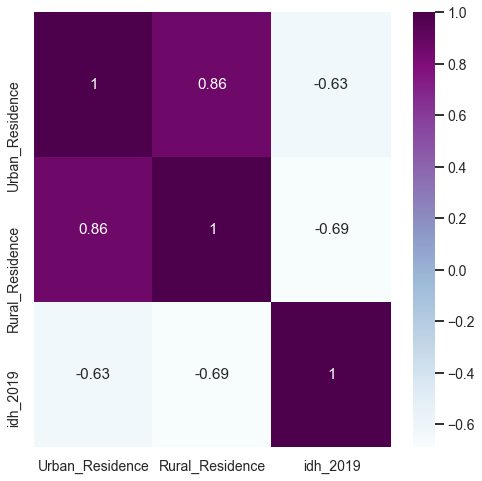

In [124]:
# Verificando a correlação entre desenvolvimento e % de pessoas fora da escola em cada zona de residência
plt.figure(figsize = (8,8))
us_corr_residence = sns.heatmap(us_residence_dev.corr(), annot = True, cmap = 'BuPu')

In [125]:
#Top 10 países com maior % de crianças fora da escola em zona rural
us_top10Rural = us_residence_dev.sort_values('Rural_Residence', ascending = False).head(10)
us_top10Rural

regiao Countries and areas  Urban_Residence  \
17           Sub-Saharan Africa              Guinea             40.0   
29           Sub-Saharan Africa          Madagascar             47.0   
12           Sub-Saharan Africa       Côte d'Ivoire             47.0   
42           Sub-Saharan Africa             Senegal             40.0   
5            Sub-Saharan Africa               Benin             50.0   
20  Latin America and Caribbean            Honduras             28.0   
54           Sub-Saharan Africa              Uganda             57.0   
35        East Asia and Pacific             Myanmar             35.0   
55           Sub-Saharan Africa              Zambia             46.0   
14           Sub-Saharan Africa            Ethiopia             41.0   

    Rural_Residence Development Regions  idh_2019  
17             81.0     Least Developed     0.477  
29             72.0     Least Developed     0.528  
12             70.0      Less Developed     0.538  
42             69.0     Least Developed     0.512  
5              65.0     Least Developed     0.545  
20             64.0      Less Developed     0.634  
54             62.0     Least Developed     0.544  
35             58.0     Least Developed     0.583  
55             58.0     Least Developed     0.584  
14             58.0     Least Developed     0.485

In [126]:
#Top 10 países com maior % de crianças fora da escola em zona urbana

us_top10Urban = us_residence_dev.sort_values('Urban_Residence', ascending = False).head(10)
us_top10Urban

regiao Countries and areas  Urban_Residence  Rural_Residence  \
54  Sub-Saharan Africa              Uganda             57.0             62.0   
5   Sub-Saharan Africa               Benin             50.0             65.0   
12  Sub-Saharan Africa       Côte d'Ivoire             47.0             70.0   
29  Sub-Saharan Africa          Madagascar             47.0             72.0   
55  Sub-Saharan Africa              Zambia             46.0             58.0   
8   Sub-Saharan Africa             Burundi             44.0             55.0   
56  Sub-Saharan Africa            Zimbabwe             43.0             55.0   
14  Sub-Saharan Africa            Ethiopia             41.0             58.0   
17  Sub-Saharan Africa              Guinea             40.0             81.0   
42  Sub-Saharan Africa             Senegal             40.0             69.0   

   Development Regions  idh_2019  
54     Least Developed     0.544  
5      Least Developed     0.545  
12      Less Developed     0.538  
29     Least Developed     0.528  
55     Least Developed     0.584  
8      Least Developed     0.433  
56      Less Developed     0.571  
14     Least Developed     0.485  
17     Least Developed     0.477  
42     Least Developed     0.512

#### Gênero  🚹🚺⚧️

In [127]:
#Colocando o nome das regiões no us.

conditions = [
    (us_tratados['Region'] == 'EAP'),
    (us_tratados['Region'] == 'ECA'),
    (us_tratados['Region'] == 'LAC'),
    (us_tratados['Region'] == 'MENA'),
    (us_tratados['Region'] == 'SA'),
    (us_tratados['Region'] == 'SSA')]
choices = ['East Asia and Pacific', 'Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'South Asia','Sub-Saharan Africa' ]
us_tratados['Regiao'] = np.select(conditions, choices, default='black')

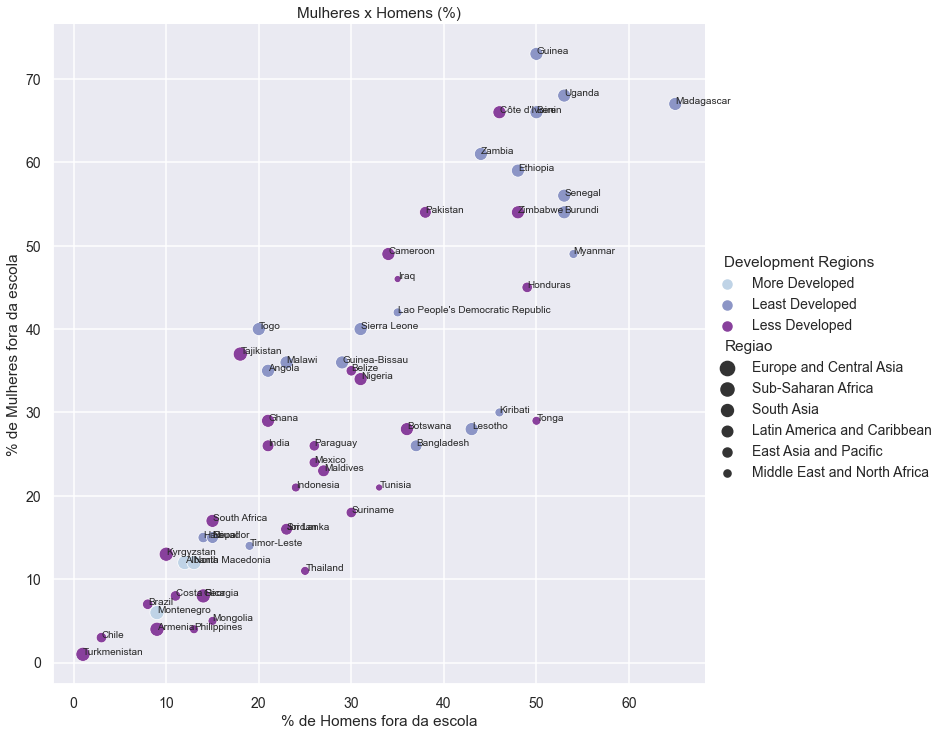

In [128]:
#plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid")
sns.set_context("talk", font_scale=0.85
               )
sns.relplot(
    data=us_tratados,
    x="Male", y="Female", hue="Development Regions",
    size="Regiao",palette="BuPu", sizes=(50, 200), height = 10 
).set(title='Mulheres x Homens (%)')
plt.ylabel("% de Mulheres fora da escola")
plt.xlabel("% de Homens fora da escola")
#plt.title("Seaborn Default Legend Position")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=10)

label_point(us_tratados.Male, us_tratados.Female, us_tratados['Countries and areas'], plt.gca()) 

plt.show()

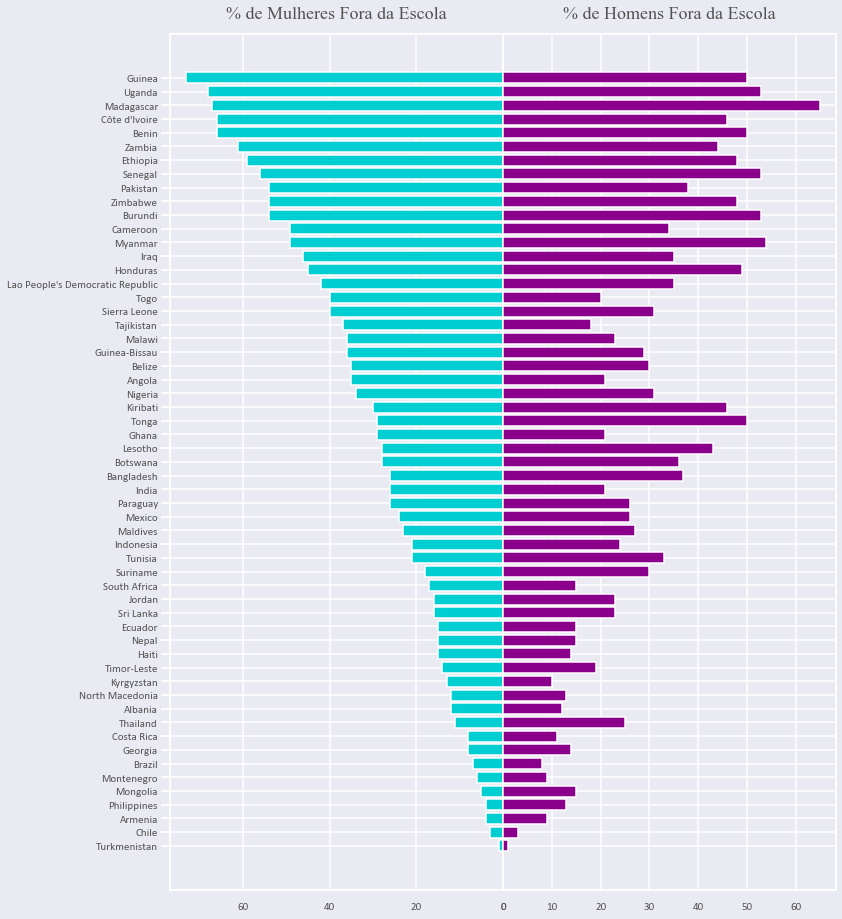

In [129]:
#Selecionando o dado que eu quero ordenado de acordo com o Female:
data = us_tratados.sort_values(by=['Female'], ascending=False)[['Countries and areas','Female','Male']]
data.set_index('Countries and areas', inplace=True)


#Setando os parâmetros necessários para montar o gráfico:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
hfontitle = {'fontname':'Times New Roman'}
facecolor = '#eaeaf2'
color_title = '#525252'
color_red = '#00CED1'
color_blue = '#8B008B'
index = data.index
column0 = data['Female']
column1 = data['Male']
title0 = '% de Mulheres Fora da Escola'
title1 = '% de Homens Fora da Escola'

#Cosntruindo a figura:
fig, axes = plt.subplots(figsize=(12,14), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

#Plotando os gráficos de barra:
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_title, **hfontitle)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_title, **hfontitle)

#Invertendo o eixo do gráfico da esquerda:
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

#Modificando parametros de eixo:
axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


#Mudando a cor dos nomes de países
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=11, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=11, color=font_color, **hfont)

#Ajustando o plot:
plt.subplots_adjust(wspace=0, top=0.95, bottom=0.1, left=0.18, right=0.95) 

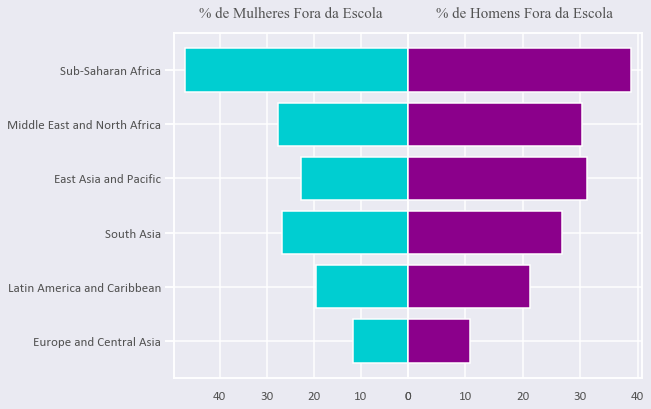

In [130]:
#Selecionando o dado que eu quero ordenado de acordo com o Total:
#data = pr_tratados.sort_values(by=['Total'], ascending=False)[['Regiao','Female','Male']]
#data = pr_tratados[['NomeRegiao','Female','Male']].groupby('NomeRegiao').mean().sort_values(by=['Female'], ascending=False)
data =us_tratados[['Regiao','Female','Male', 'Total']].groupby('Regiao').mean().sort_values(by=['Total'], ascending=False)
#data = data.sort_values(by=['Total'], ascending=False)
#data.set_index('Regiao', inplace=True)
#data

#Setando os parâmetros necessários para montar o gráfico:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
hfontitle = {'fontname':'Times New Roman'}
facecolor = '#eaeaf2'
color_title = '#525252'
color_red = '#00CED1'
color_blue = '#8B008B'
index = data.index
column0 = data['Female']
column1 = data['Male']
title0 = '% de Mulheres Fora da Escola'
title1 = '% de Homens Fora da Escola'

#Cosntruindo a figura:
fig, axes = plt.subplots(figsize=(10,6), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

#Plotando os gráficos de barra:
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=15, pad=15, color=color_title, **hfontitle)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=15, pad=15, color=color_title, **hfontitle)

#Invertendo o eixo do gráfico da esquerda:
axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

#Modificando parametros de eixo:
axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


#Mudando a cor dos nomes de países
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

#Ajustando o plot:
plt.subplots_adjust(wspace=0, top=0.9, bottom=0.1, left=0.25, right=0.9)

#### Condição Financeira 💵👑🤑

In [131]:
us_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']].head()

Countries and areas  Total  Poorest_Wealth quintile  Second_Wealth quintile  \
0             Albania   12.0                     27.0                    11.0   
1              Angola   29.0                     58.0                    50.0   
2             Armenia    7.0                     12.0                     6.0   
3          Bangladesh   31.0                     45.0                    35.0   
4              Belize   33.0                     54.0                    43.0   

   Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  
0                    11.0                     5.0                      5.0  
1                    27.0                    17.0                      9.0  
2                    10.0                     5.0                      2.0  
3                    29.0                    28.0                     19.0  
4                    40.0                    13.0                      7.0

In [132]:
us_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']].describe()

Total  Poorest_Wealth quintile  Second_Wealth quintile  \
count  57.00000                57.000000               57.000000   
mean   29.77193                46.842105               36.596491   
std    17.12769                22.176878               21.543859   
min     1.00000                 2.000000                1.000000   
25%    15.00000                29.000000               21.000000   
50%    28.00000                42.000000               35.000000   
75%    40.00000                68.000000               54.000000   
max    66.00000                89.000000               84.000000   

       Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  
count               57.000000               57.000000                57.000000  
mean                30.403509               23.842105                16.263158  
std                 18.083003               16.829809                13.133281  
min                  0.000000                1.000000                 1.000000  
25%                 17.000000               12.000000                 6.000000  
50%                 25.000000               18.000000                11.000000  
75%                 42.000000               35.000000                24.000000  
max                 74.000000               59.000000                54.000000

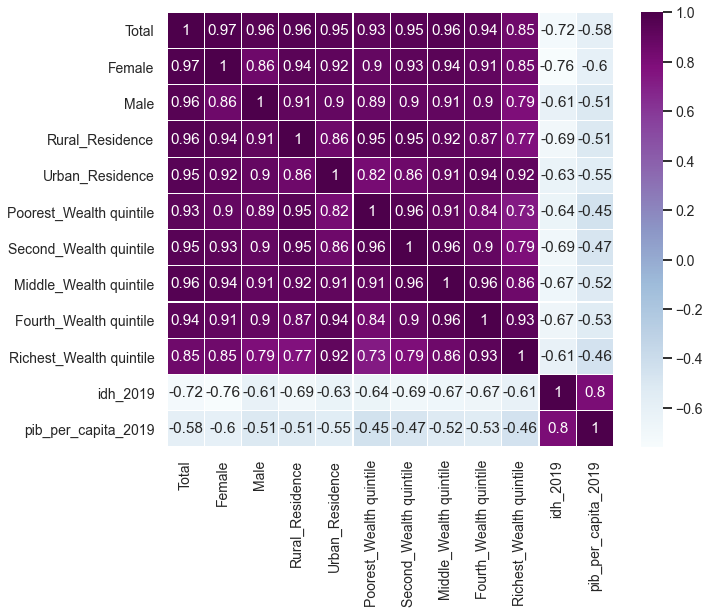

In [133]:
us_heatmap = us_tratados.drop(columns=['Time period', 'id_desenvolvimento_regiao', 'HDI Rank'])
sns.heatmap(us_heatmap.corr(),annot=True,cmap='BuPu',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [134]:
us_desigualdade = us_tratados[['Countries and areas', 'Total', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile']]
us_desigualdade['Diferença entre o mais rico e mais pobre'] = us_desigualdade['Poorest_Wealth quintile'] - us_desigualdade['Richest_Wealth quintile']
us_desigualdade.sort_values(by=['Diferença entre o mais rico e mais pobre'], ascending=False).head(10)

Countries and areas  Total  Poorest_Wealth quintile  \
37                           Nigeria   33.0                     75.0   
39                          Pakistan   46.0                     75.0   
29                        Madagascar   66.0                     89.0   
27  Lao People's Democratic Republic   38.0                     68.0   
17                            Guinea   63.0                     86.0   
43                      Sierra Leone   36.0                     66.0   
20                          Honduras   47.0                     71.0   
1                             Angola   29.0                     58.0   
35                           Myanmar   52.0                     73.0   
28                           Lesotho   36.0                     59.0   

    Second_Wealth quintile  Middle_Wealth quintile  Fourth_Wealth quintile  \
37                    46.0                    24.0                    10.0   
39                    57.0                    45.0                    31.0   
29                    84.0                    74.0                    59.0   
27                    50.0                    38.0                    23.0   
17                    84.0                    73.0                    56.0   
43                    55.0                    39.0                    26.0   
20                    52.0                    40.0                    34.0   
1                     50.0                    27.0                    17.0   
35                    60.0                    53.0                    43.0   
28                    47.0                    33.0                    28.0   

    Richest_Wealth quintile  Diferença entre o mais rico e mais pobre  
37                      6.0                                      69.0  
39                     14.0                                      61.0  
29                     32.0                                      57.0  
27                     11.0                                      57.0  
17                     33.0                                      53.0  
43                     15.0                                      51.0  
20                     20.0                                      51.0  
1                       9.0                                      49.0  
35                     24.0                                      49.0  
28                     11.0                                      48.0

In [135]:
Piores10_us

ISO3 Countries and areas Region Sub-region Development Regions  Total  \
29  MDG          Madagascar    SSA        ESA     Least Developed   66.0   
17  GIN              Guinea    SSA        WCA     Least Developed   63.0   
54  UGA              Uganda    SSA        ESA     Least Developed   61.0   
5   BEN               Benin    SSA        WCA     Least Developed   58.0   
12  CIV       Côte d'Ivoire    SSA        WCA      Less Developed   56.0   
42  SEN             Senegal    SSA        WCA     Least Developed   55.0   
14  ETH            Ethiopia    SSA        ESA     Least Developed   54.0   
8   BDI             Burundi    SSA        ESA     Least Developed   54.0   
55  ZMB              Zambia    SSA        ESA     Least Developed   52.0   
35  MMR             Myanmar    EAP        EAP     Least Developed   52.0   

    Female  Male  Rural_Residence  Urban_Residence  ...  \
29    67.0  65.0             72.0             47.0  ...   
17    73.0  50.0             81.0             40.0  ...   
54    68.0  53.0             62.0             57.0  ...   
5     66.0  50.0             65.0             50.0  ...   
12    66.0  46.0             70.0             47.0  ...   
42    56.0  53.0             69.0             40.0  ...   
14    59.0  48.0             58.0             41.0  ...   
8     54.0  53.0             55.0             44.0  ...   
55    61.0  44.0             58.0             46.0  ...   
35    49.0  54.0             58.0             35.0  ...   

    Middle_Wealth quintile  Fourth_Wealth quintile  Richest_Wealth quintile  \
29                    74.0                    59.0                     32.0   
17                    73.0                    56.0                     33.0   
54                    57.0                    57.0                     54.0   
5                     61.0                    48.0                     36.0   
12                    54.0                    50.0                     44.0   
42                    57.0                    49.0                     33.0   
14                    56.0                    48.0                     43.0   
8                     54.0                    46.0                     39.0   
55                    51.0                    50.0                     36.0   
35                    53.0                    43.0                     24.0   

    Time period                 regiao  id_desenvolvimento_regiao HDI Rank  \
29       2018.0     Sub-Saharan Africa                          1      164   
17       2018.0     Sub-Saharan Africa                          1      178   
54       2016.0     Sub-Saharan Africa                          1      159   
5        2018.0     Sub-Saharan Africa                          1      158   
12       2016.0     Sub-Saharan Africa                          2      162   
42       2019.0     Sub-Saharan Africa                          1      168   
14       2016.0     Sub-Saharan Africa                          1      173   
8        2017.0     Sub-Saharan Africa                          1      185   
55       2018.0     Sub-Saharan Africa                          1      146   
35       2016.0  East Asia and Pacific                          1      147   

    idh_2019  pib_per_capita_2019  Faixa Total  
29     0.528           488.913857          NaN  
17     0.477           945.769349          NaN  
54     0.544           898.407515          NaN  
5      0.545          1201.561388          NaN  
12     0.538          2327.745364          NaN  
42     0.512          1381.601793          NaN  
14     0.485           799.795134          NaN  
8      0.433           278.319365          NaN  
55     0.584          1348.743220          NaN  
35     0.583          1362.725439          NaN  

[10 rows x 22 columns]

#### Escala de desenvolvimento da região  📈🌍🗾

In [136]:
us_tratados.groupby(["Development Regions"])[["ISO3"]].count()

ISO3
Development Regions      
Least Developed        21
Less Developed         33
More Developed          3

In [137]:
us_tratados.pivot_table(index=["Development Regions"],
                        columns=["Faixa Total"],
                        values=["ISO3"],
                        aggfunc={"ISO3" : "count"},
                        fill_value=0,
                        margins=1,
                        margins_name="Total")

ISO3                                               \
Faixa Total         Até 10% Entre 10 e 20% Entre 20 e 30% Entre 30 e 40%   
Development Regions                                                        
Least Developed           0              3              3              6   
Less Developed            6              8              9              5   
More Developed            1              2              0              0   
Total                     7             13             12             11   

                                          
Faixa Total         Entre 40 e 50% Total  
Development Regions                       
Least Developed                  0    12  
Less Developed                   3    31  
More Developed                   0     3  
Total                            3    46

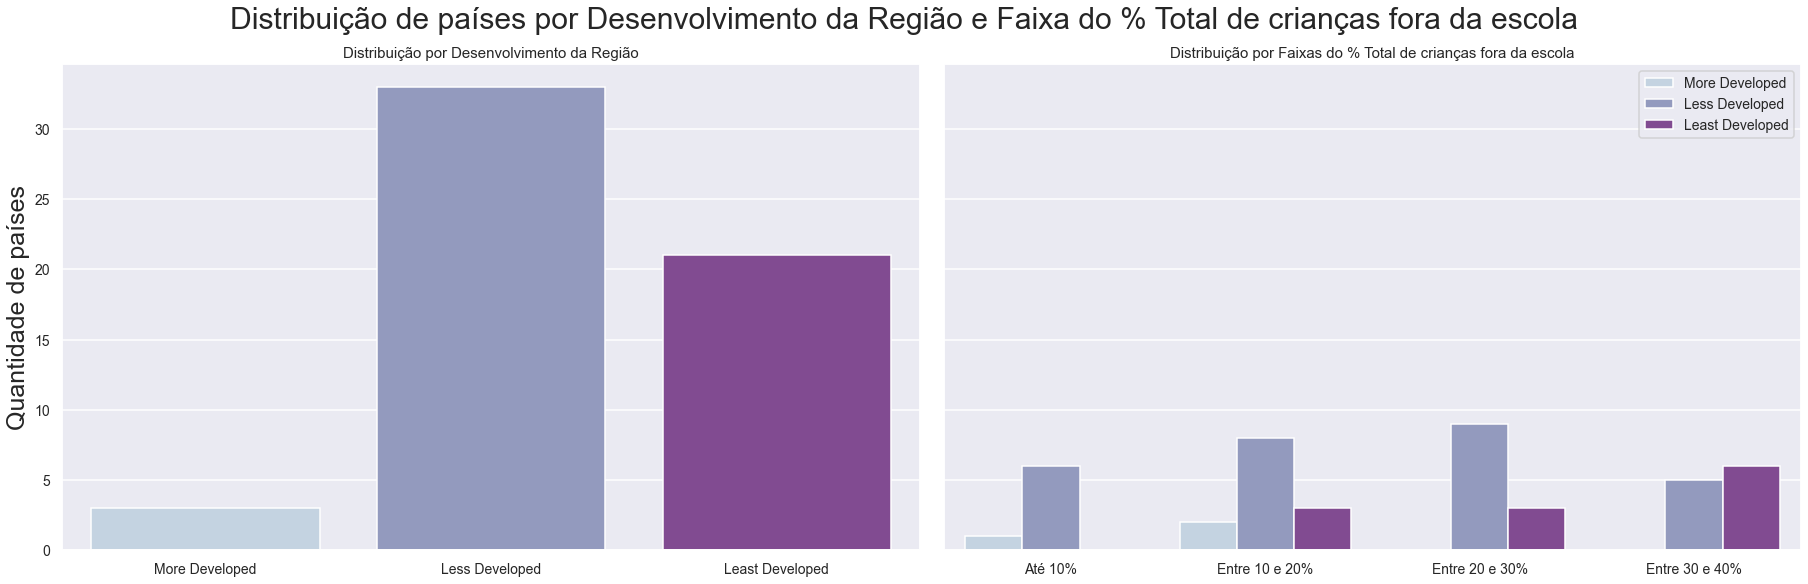

In [138]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(25,8)) 
fig.suptitle("Distribuição de países por Desenvolvimento da Região e Faixa do % Total de crianças fora da escola", fontsize=30)


sns.countplot(ax=axs[0], data = us_tratados, x = "Development Regions", order=["More Developed", "Less Developed","Least Developed"], palette="BuPu")
sns.set_style("darkgrid")
axs[0].set_title("Distribuição por Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("Quantidade de países", fontsize=25)


sns.countplot(ax=axs[1], data = us_tratados, x = "Faixa Total", hue="Development Regions", order=["Até 10%", "Entre 10 e 20%", "Entre 20 e 30%", "Entre 30 e 40%"],  hue_order=["More Developed", "Less Developed","Least Developed"], palette="BuPu")
plt.legend(loc="upper right")
axs[1].set_title("Distribuição por Faixas do % Total de crianças fora da escola", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)


plt.show()

In [139]:
us_tratados.pivot_table(index=['regiao'],
                       columns=['Development Regions'],
                       values=['ISO3'],
                       aggfunc="count",
                       fill_value=0,
                       margins=1,
                       margins_name="Total")

ISO3                                \
Development Regions          Least Developed Less Developed More Developed   
regiao                                                                       
East Asia and Pacific                      4              5              0   
Europe and Central Asia                    0              5              3   
Latin America and Caribbean                1              9              0   
Middle East and North Africa               0              3              0   
South Asia                                 2              4              0   
Sub-Saharan Africa                        14              7              0   
Total                                     21             33              3   

                                    
Development Regions          Total  
regiao                              
East Asia and Pacific            9  
Europe and Central Asia          8  
Latin America and Caribbean     10  
Middle East and North Africa     3  
South Asia                       6  
Sub-Saharan Africa              21  
Total                           57

In [140]:
us_tratados.groupby(["Development Regions", "regiao", "Countries and areas"])[["Total"]].mean().sort_values(["Development Regions", "regiao", "Total"], ascending=False)

Total
Development Regions regiao                       Countries and areas                    
More Developed      Europe and Central Asia      Albania                            12.0
                                                 North Macedonia                    12.0
                                                 Montenegro                          8.0
Less Developed      Sub-Saharan Africa           Côte d'Ivoire                      56.0
                                                 Zimbabwe                           51.0
                                                 Cameroon                           42.0
                                                 Nigeria                            33.0
                                                 Botswana                           32.0
                                                 Ghana                              25.0
                                                 South Africa                       16.0
                    South Asia                   Pakistan                           46.0
                                                 Maldives                           25.0
                                                 India                              23.0
                                                 Sri Lanka                          19.0
                    Middle East and North Africa Iraq                               40.0
                                                 Tunisia                            27.0
                                                 Jordan                             20.0
                    Latin America and Caribbean  Honduras                           47.0
                                                 Belize                             33.0
                                                 Paraguay                           26.0
                                                 Mexico                             25.0
                                                 Suriname                           24.0
                                                 Ecuador                            15.0
                                                 Costa Rica                          9.0
                                                 Brazil                              8.0
                                                 Chile                               3.0
                    Europe and Central Asia      Tajikistan                         28.0
                                                 Georgia                            11.0
                                                 Kyrgyzstan                         11.0
                                                 Armenia                             7.0
                                                 Turkmenistan                        1.0
                    East Asia and Pacific        Tonga                              39.0
                                                 Indonesia                          23.0
                                                 Thailand                           18.0
                                                 Mongolia                           11.0
                                                 Philippines                         9.0
Least Developed     Sub-Saharan Africa           Madagascar                         66.0
                                                 Guinea                             63.0
                                                 Uganda                             61.0
                                                 Benin                              58.0
                                                 Senegal                            55.0
                                                 Burundi                            54.0
                                                 Ethiopia                           54.0
                                                 Zambia                       

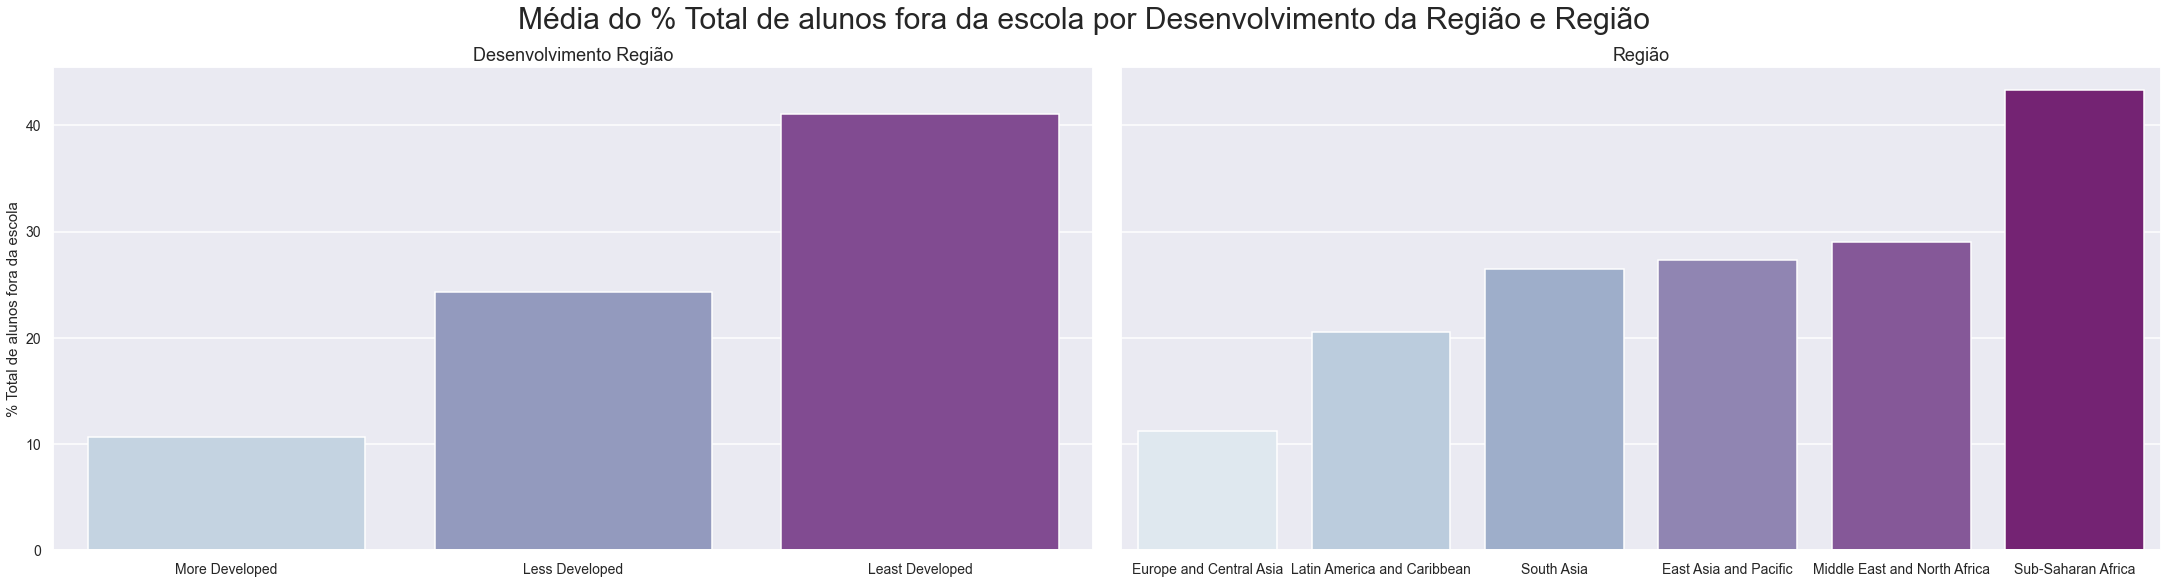

In [141]:
# Gráfico de colunas do % total de crianças fora da escola

us_media_dev_regiao = us_tratados.groupby(["Development Regions"])[["Total"]].mean().sort_values("Total").reset_index()
us_media_regiao = us_tratados.groupby(["regiao"])[["Total"]].mean().sort_values("Total").reset_index()


fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(30,8)) 
fig.suptitle("Média do % Total de alunos fora da escola por Desenvolvimento da Região e Região", fontsize=30)

sns.barplot(ax=axs[0], x="Development Regions", y='Total', data=us_media_dev_regiao, palette="BuPu")
axs[0].set_title("Desenvolvimento Região", fontsize=18)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.barplot(ax=axs[1], x="regiao", y='Total', data=us_media_regiao, palette="BuPu")
axs[1].set_title("Região", fontsize=18)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

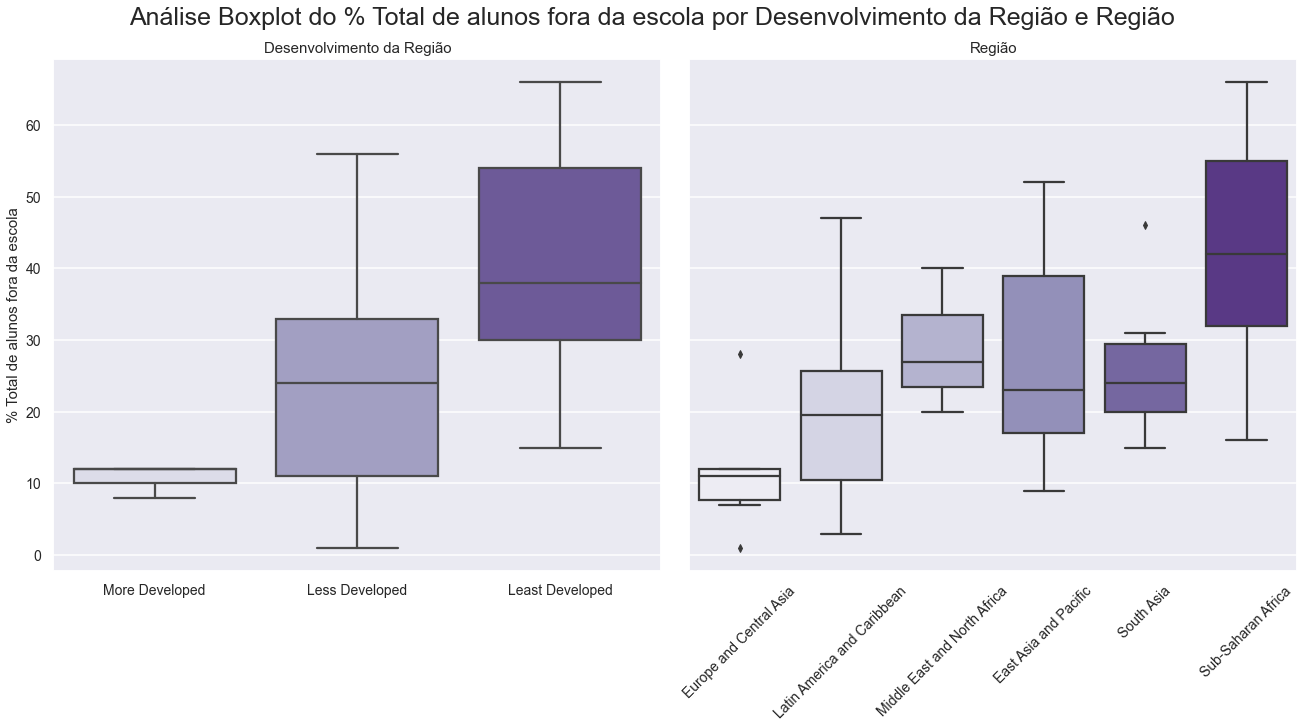

In [142]:
# Gráfico de boxplot do % total de crianças fora da escola

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(18,10)) 
fig.suptitle("Análise Boxplot do % Total de alunos fora da escola por Desenvolvimento da Região e Região", fontsize=25)


sns.boxplot(ax=axs[0], x="Development Regions", y='Total', data=us_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.boxplot(ax=axs[1], x="regiao", y='Total', data=us_tratados, order=['Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'East Asia and Pacific', 'South Asia', 'Sub-Saharan Africa' ], palette="Purples")
plt.xticks(rotation=45)
axs[1].set_title("Região", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)


plt.show()

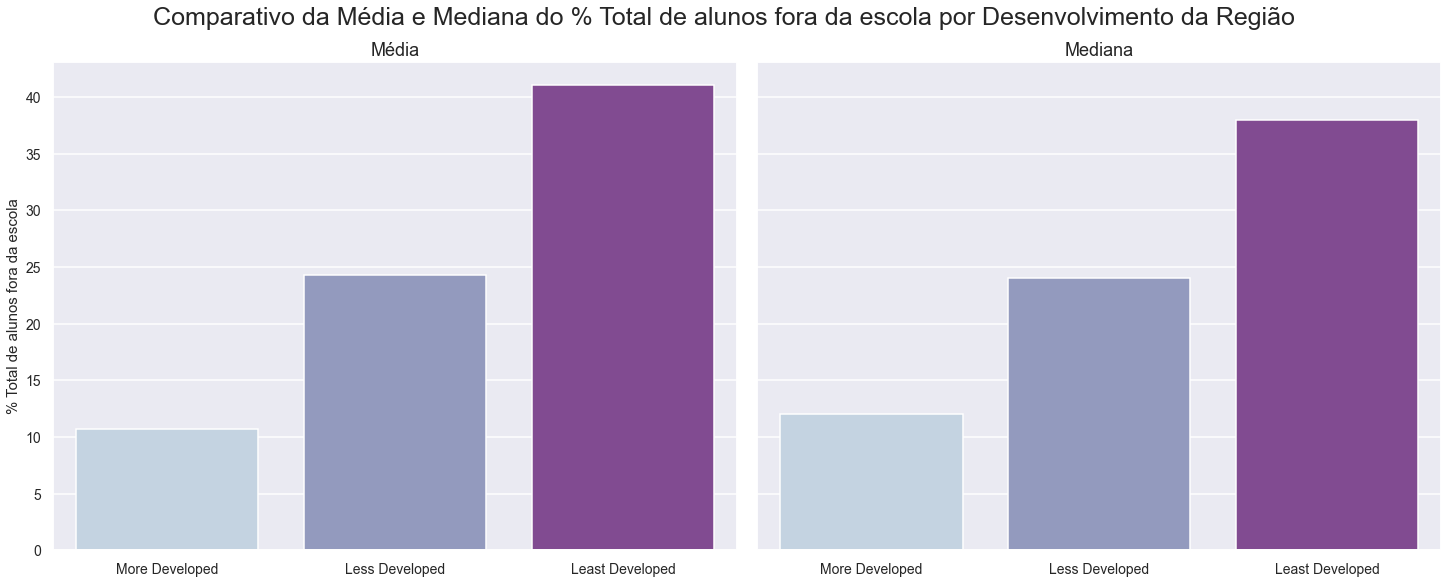

In [143]:
# comparativo da média e mediana

us_mediana = us_tratados.groupby(["Development Regions"])[["Total"]].median().sort_values("Total").reset_index()
us_media = us_tratados.groupby(["Development Regions"])[["Total"]].mean().sort_values("Total").reset_index()


fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(20,8)) 
fig.suptitle("Comparativo da Média e Mediana do % Total de alunos fora da escola por Desenvolvimento da Região", fontsize=25)

sns.barplot(ax=axs[0], x="Development Regions", y='Total', data=us_media, order=['More Developed',  'Less Developed', 'Least Developed'], palette="BuPu")
axs[0].set_title("Média", fontsize=18)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% Total de alunos fora da escola", fontsize=15)

sns.barplot(ax=axs[1], x="Development Regions", y='Total', data=us_mediana, order=['More Developed',  'Less Developed', 'Least Developed'], palette="BuPu")
axs[1].set_title("Mediana", fontsize=18)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

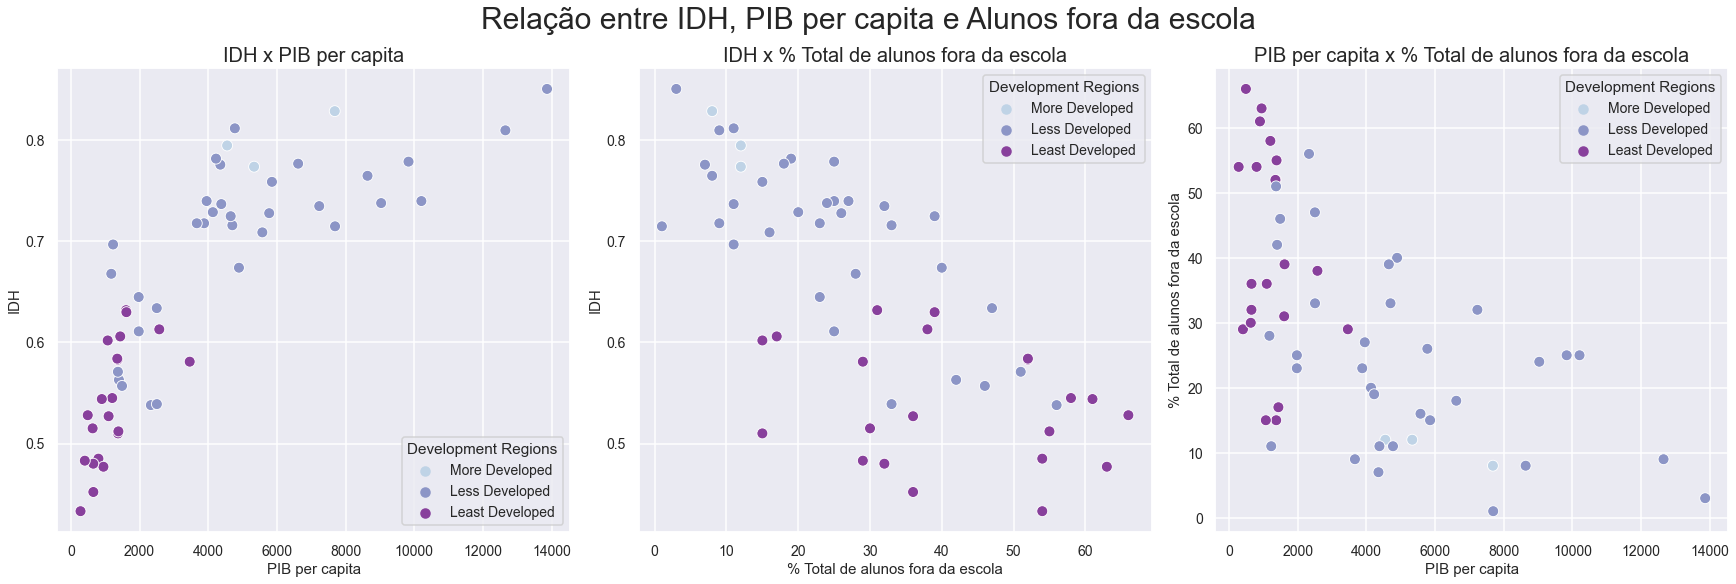

In [144]:
fig, axs = plt.subplots(1, 3, constrained_layout = True, figsize=(24,8)) 
fig.suptitle("Relação entre IDH, PIB per capita e Alunos fora da escola", fontsize=30)

# formato dos valores do dicionário [x, y, titulo, label x, label y]

dfs_infos = {0 : ["pib_per_capita_2019", "idh_2019", "IDH x PIB per capita", "PIB per capita", "IDH"],
             1 : ["Total", "idh_2019", "IDH x % Total de alunos fora da escola", "% Total de alunos fora da escola", "IDH"],
             2 : ["pib_per_capita_2019", "Total", "PIB per capita x % Total de alunos fora da escola", "PIB per capita", "% Total de alunos fora da escola"]}

lista_corr = []

for i in dfs_infos.keys():

    x = dfs_infos[i][0]
    y = dfs_infos[i][1]
    titulo = dfs_infos[i][2]
    label_x = dfs_infos[i][3]
    label_y = dfs_infos[i][4]

    sns.scatterplot(ax=axs[i], x=x, y=y, data=us_tratados, hue='Development Regions', s=120, palette="BuPu", hue_order=["More Developed", "Less Developed", "Least Developed"])
    sns.set_style("darkgrid")
    axs[i].set_title(titulo, fontsize=20)
    axs[i].set_xlabel(label_x, fontsize=15)
    axs[i].set_ylabel(label_y, fontsize=15)


    # correlação entre variáveis e formatação do texto para imprimir

    correlacao = round(us_tratados[x].corr(us_tratados[y]), 2)
    txt = titulo + ": " + str(correlacao)
    lista_corr.append(txt)


plt.show()

In [145]:
print("Coeficiente de correlação de Pearson\n")

for txt in lista_corr:
    print(txt) 

Coeficiente de correlação de Pearson

IDH x PIB per capita: 0.8
IDH x % Total de alunos fora da escola: -0.72
PIB per capita x % Total de alunos fora da escola: -0.58


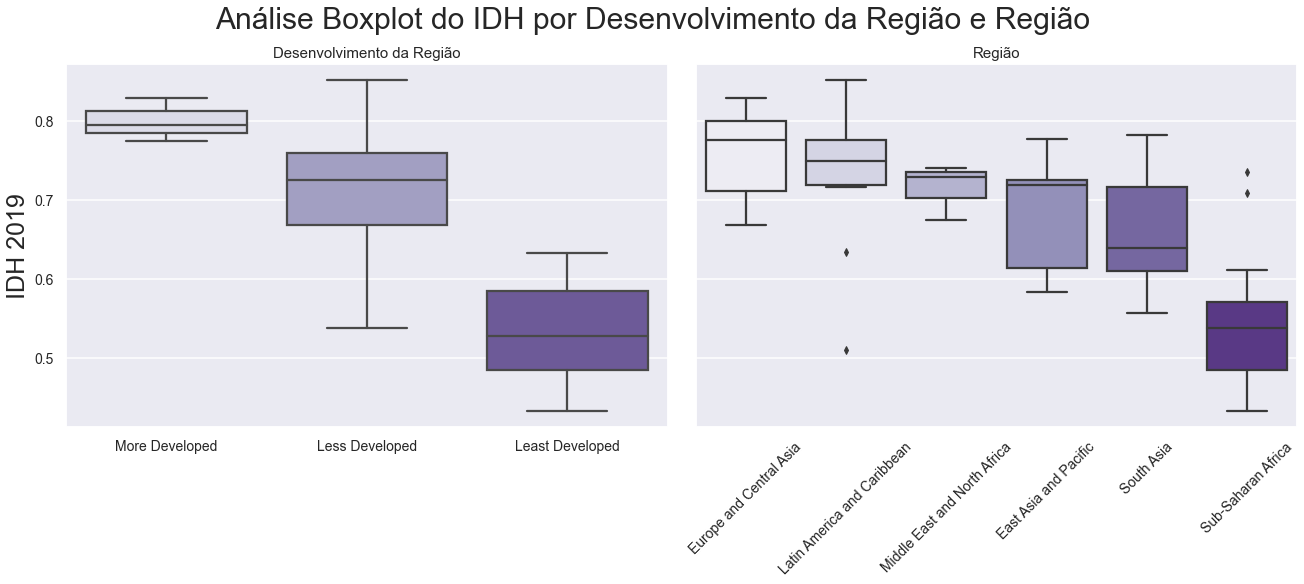

In [146]:
fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout = True, figsize=(18,8)) 
fig.suptitle("Análise Boxplot do IDH por Desenvolvimento da Região e Região", fontsize=30)


sns.boxplot(ax=axs[0], x="Development Regions", y='idh_2019', data=us_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Desenvolvimento da Região", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("IDH 2019", fontsize=25)


sns.boxplot(ax=axs[1], x="regiao", y='idh_2019', data=us_tratados, order=['Europe and Central Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'East Asia and Pacific', 'South Asia', 'Sub-Saharan Africa' ], palette="Purples")
plt.xticks(rotation=45)
axs[1].set_title("Região", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

## 5) Conclusão e resultados

### Conclusões finais região

A região com maior percentual de crianças fora da escola é a África Subsaariana: uma das regiões mais pobres do mundo, com altos índices de mortalidade infantil, analfabetismo e baixa expecativa de vida.

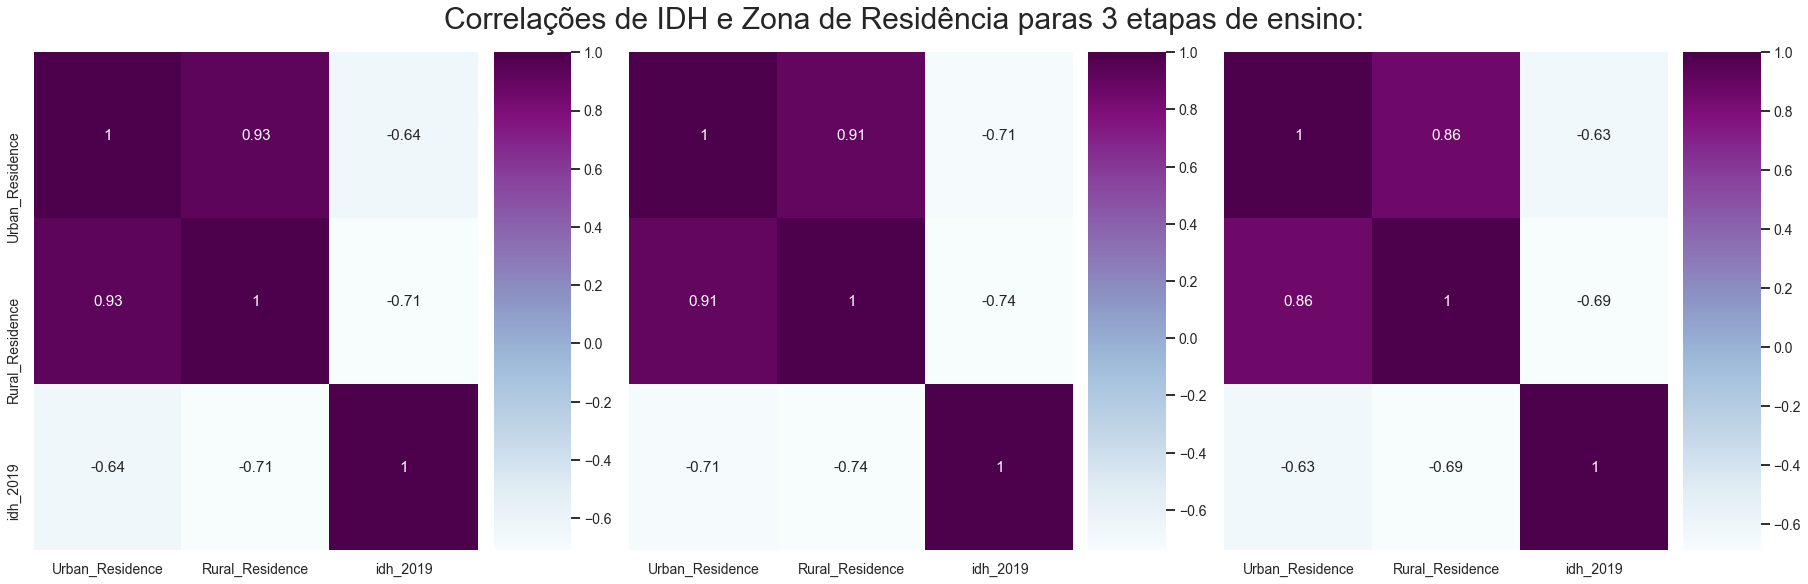

In [147]:
# Correlação das 3 etapas de ensino lado a lado:
# Criando a figura lado a lado 
fig, axs = plt.subplots(1, 3, sharey=True, constrained_layout = True, figsize=(25,8)) 
fig.suptitle("Correlações de IDH e Zona de Residência paras 3 etapas de ensino:", fontsize=30)


sns.heatmap(ax = axs[0], data = pr_residence_dev.corr(), annot = True, cmap = 'BuPu')

sns.heatmap(ax = axs[1], data = ls_residence_dev.corr(), annot = True, cmap = 'BuPu')


sns.heatmap(ax = axs[2], data = us_residence_dev.corr(), annot = True, cmap = 'BuPu')


plt.show()

 - Em todas as etapas de ensino, a Zona Rural é a mais afetada pelo IDH. 
 - O desenvolvimento do país está correlacionado inversamente com a alta taxa de não-matrícula na zona rural dos países. Isso acontece com mais força na etapa de ensino PRIMÁRIA.
 - No Ensino Médio, o IDH tem uma correlação relativamente baixa com a taxa de crianças fora da escola em ambas as zonas de residência.

### Conclusões finais gênero

In [149]:
#Concatenação
gender = pd.concat([pr_tratados.assign(dataset='Primário'), ls_tratados.assign(dataset='Ensino Fundamental'), us_tratados.assign(dataset='Ensino Médio') ]).drop('Sub-region', axis=1)

**Criei dentro do dataset uma coluna com o GPI, índice de paridade de gênero, ele mostra como o indicador se comporta no país**

- Se estiver entre 0.97 e 1.03, o indicador é considerado como equalitário.
- Se estiver acima de 1.03, o indicador é considerado desigual em favor das mulheres.
- Se estiver abaixo de 0.97, o indicador é considerado desigual em favor dos homens.

In [150]:
gender['GPI'] = (100 - gender['Female'])/(100 - gender['Male'])

In [151]:
#Identificando quais são equalitários ou não.
conditions = [
    (gender['GPI'] <= 1.03) & (gender['GPI'] >= 0.97),
    (gender['GPI'] < 0.97) ,
    (gender['GPI'] > 1.03)]
choices = ['Equidade de Gênero', 'Desigualdade em Favor dos Homens', 'Desigualdade em Favor das Mulheres']
gender['Paridade de Gênero'] = np.select(conditions, choices, default='black')
print(gender)

   ISO3 Countries and areas Region Development Regions  Total  Female  Male  \
0   ALB             Albania    ECA      More Developed    2.0     2.0   3.0   
1   AGO              Angola    SSA     Least Developed   22.0    22.0  21.0   
2   ARM             Armenia    ECA      Less Developed    5.0     4.0   5.0   
3   BGD          Bangladesh     SA     Least Developed    6.0     5.0   8.0   
4   BLZ              Belize    LAC      Less Developed    2.0     2.0   2.0   
..  ...                 ...    ...                 ...    ...     ...   ...   
52  TUN             Tunisia   MENA      Less Developed   27.0    21.0  33.0   
53  TKM        Turkmenistan    ECA      Less Developed    1.0     1.0   1.0   
54  UGA              Uganda    SSA     Least Developed   61.0    68.0  53.0   
55  ZMB              Zambia    SSA     Least Developed   52.0    61.0  44.0   
56  ZWE            Zimbabwe    SSA      Less Developed   51.0    54.0  48.0   

    Rural_Residence  Urban_Residence  Poorest_Wealt

In [152]:
#Plotei essa tabela para observar como os países se comportam com a paridade de genero com a mudança de level de ensino.

table = pd.pivot_table(gender, index=['Countries and areas','dataset','Paridade de Gênero',])
table.head(40)

Female  \
Countries and areas dataset            Paridade de Gênero                           
Albania             Ensino Fundamental Equidade de Gênero                     2.0   
                    Ensino Médio       Equidade de Gênero                    12.0   
                    Primário           Equidade de Gênero                     2.0   
Angola              Ensino Fundamental Desigualdade em Favor dos Homens      17.0   
                    Ensino Médio       Desigualdade em Favor dos Homens      35.0   
                    Primário           Equidade de Gênero                    22.0   
Armenia             Ensino Fundamental Equidade de Gênero                     1.0   
                    Ensino Médio       Desigualdade em Favor das Mulheres     4.0   
                    Primário           Equidade de Gênero                     4.0   
Bangladesh          Ensino Fundamental Desigualdade em Favor das Mulheres     8.0   
                    Ensino Médio       Desigualdade em Favor das Mulheres    26.0   
                    Primário           Desigualdade em Favor das Mulheres     5.0   
Belize              Ensino Fundamental Equidade de Gênero                     9.0   
                    Ensino Médio       Desigualdade em Favor dos Homens      35.0   
                    Primário           Equidade de Gênero                     2.0   
Benin               Ensino Fundamental Desigualdade em Favor dos Homens      47.0   
                    Ensino Médio       Desigualdade em Favor dos Homens      66.0   
                    Primário           Desigualdade em Favor dos Homens      35.0   
Botswana            Ensino Fundamental Equidade de Gênero                     5.0   
                    Ensino Médio       Desigualdade em Favor das Mulheres    28.0   
                    Primário           Equidade de Gênero                     1.0   
Brazil              Ensino Fundamental Equidade de Gênero                     1.0   
                    Ensino Médio       Equidade de Gênero                     7.0   
                    Primário           Equidade de Gênero                     0.0   
Burundi             Ensino Fundamental Desigualdade em Favor das Mulheres    28.0   
                    Ensino Médio       Equidade de Gênero                    54.0   
                    Primário           Equidade de Gênero                    18.0   
Cameroon            Ensino Fundamental Desigualdade em Favor dos Homens      22.0   
                    Ensino Médio       Desigualdade em Favor dos Homens      49.0   
                    Primário           Desigualdade em Favor dos Homens      17.0   
Chile               Ensino Fundamental Equidade de Gênero                     1.0   
                    Ensino Médio       Equidade de Gênero                     3.0   
                    Primário           Equidade de Gênero                     1.0   
Costa Rica          Ensino Fundamental Equidade de Gênero                     3.0   
                    Ensino Médio       Desigualdade em Favor das Mulheres     8.0   
                    Primário           Equidade de Gênero                     1.0   
Côte d'Ivoire       Ensino Fundamental Desigualdade em Favor dos Homens      38.0   
                    Ensino Médio       Desigualdade em Favor dos Homens      66.0   
                    Primário           Desigualdade em Favor dos Homens      26.0   
Ecuador             Ensino Fundamental Equidade de Gênero                     5.0   

                                                                           Fourth_Wealth quintile  \
Countries and areas dataset            Paridade de Gênero                                           
Albania             Ensino Fundamental Equidade de Gênero                                     1.0   
                    Ensino Médio       Equidade de Gênero                                     5.0   
                    Primário           Equidade de Gênero                                     2.0   

Ranking dos Países com maior percentual de crianças fora da escola.

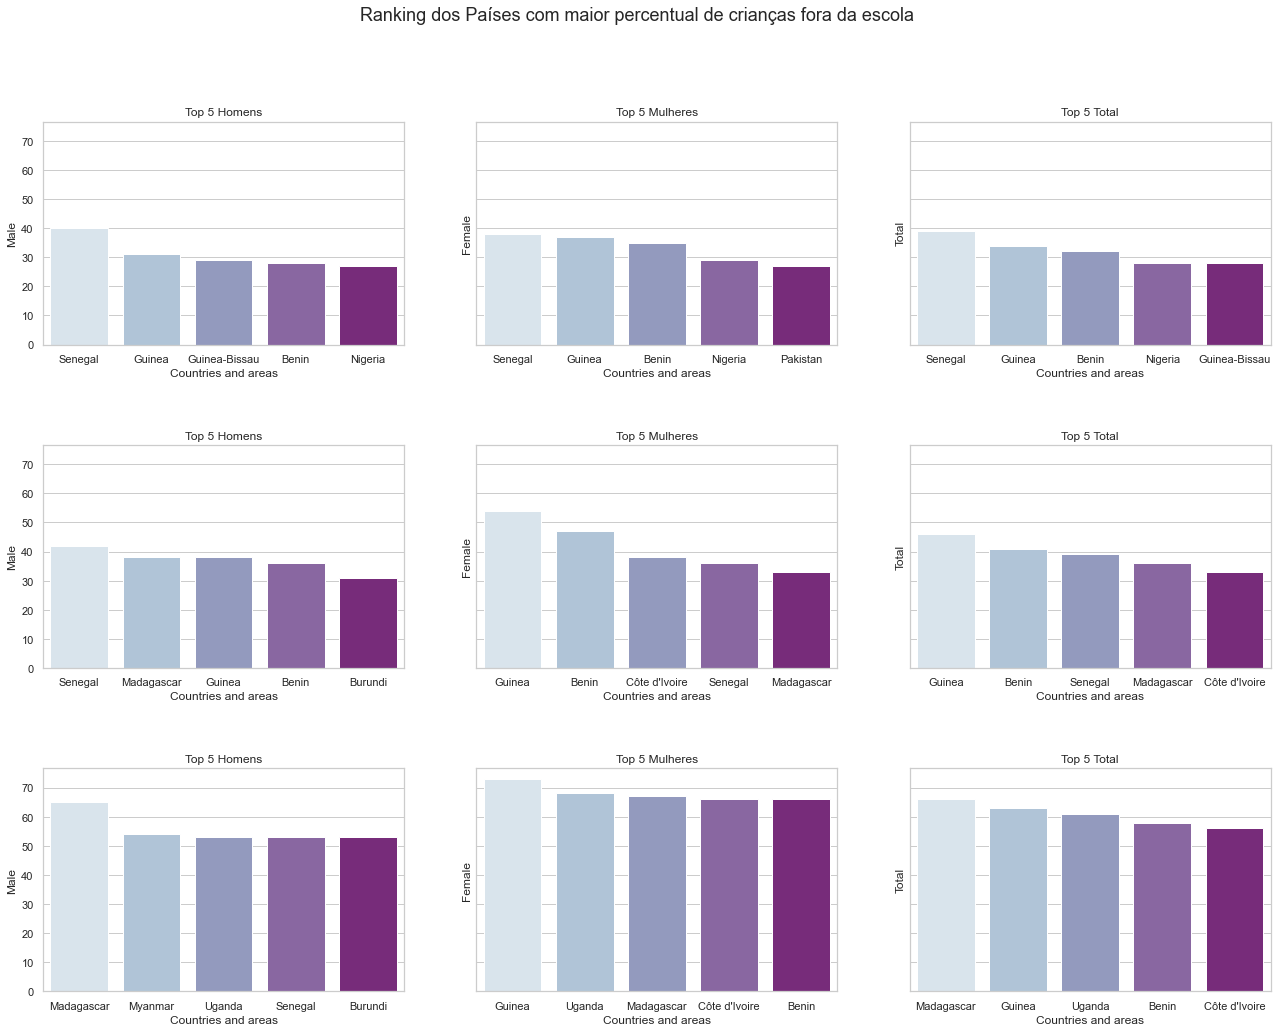

In [153]:
###################### Selecionando os dados ##########################################
#ranking primario
top5Femalepr = pr_tratados.groupby(['Countries and areas'])[['Female']].mean().sort_values(['Female'],ascending = False)
top5Femalepr.reset_index(inplace = True)
top5Malepr = pr_tratados.groupby(['Countries and areas'])[['Male']].mean().sort_values(['Male'],ascending = False)
top5Malepr.reset_index(inplace = True)
top5Totalpr =pr_tratados.groupby(['Countries and areas'])[['Total']].mean().sort_values(['Total'],ascending = False)
top5Totalpr.reset_index(inplace = True)

#ranking ensino fundamental
top5Femalels = ls_tratados.groupby(['Countries and areas'])[['Female']].mean().sort_values(['Female'],ascending = False)
top5Femalels.reset_index(inplace = True)
top5Malels = ls_tratados.groupby(['Countries and areas'])[['Male']].mean().sort_values(['Male'],ascending = False)
top5Malels.reset_index(inplace = True)
top5Totalls =ls_tratados.groupby(['Countries and areas'])[['Total']].mean().sort_values(['Total'],ascending = False)
top5Totalls.reset_index(inplace = True)

#ranking ensino medio
top5Femaleus = us_tratados.groupby(['Countries and areas'])[['Female']].mean().sort_values(['Female'],ascending = False)
top5Femaleus.reset_index(inplace = True)
top5Maleus = us_tratados.groupby(['Countries and areas'])[['Male']].mean().sort_values(['Male'],ascending = False)
top5Maleus.reset_index(inplace = True)
top5Totalus =us_tratados.groupby(['Countries and areas'])[['Total']].mean().sort_values(['Total'],ascending = False)
top5Totalus.reset_index(inplace = True)


###################### Plotando o Grafico ##########################################

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(22,16), sharey =True)
fig.suptitle('Ranking dos Países com maior percentual de crianças fora da escola', fontsize=18)

#Primary
sns.barplot(data = top5Malepr.iloc[0:5], x = 'Countries and areas', y = 'Male',
            palette = "BuPu", ax=axs[0,0]).set(title='Top 5 Homens')
sns.barplot(data = top5Femalepr.iloc[0:5], x = 'Countries and areas', y = 'Female',
            palette = "BuPu", ax=axs[0,1]).set(title='Top 5 Mulheres')
sns.barplot(data = top5Totalpr.iloc[0:5], x = 'Countries and areas', y = 'Total',
            palette = "BuPu", ax=axs[0,2]).set(title='Top 5 Total')


#Fundamental
sns.barplot(data = top5Malels.iloc[0:5], x = 'Countries and areas', y = 'Male',
            palette = "BuPu", ax=axs[1,0]).set(title='Top 5 Homens')
sns.barplot(data = top5Femalels.iloc[0:5], x = 'Countries and areas', y = 'Female',
            palette = "BuPu", ax=axs[1,1]).set(title='Top 5 Mulheres')
sns.barplot(data = top5Totalls.iloc[0:5], x = 'Countries and areas', y = 'Total',
            palette = "BuPu", ax=axs[1,2]).set(title='Top 5 Total')

#Médio
sns.barplot(data = top5Maleus.iloc[0:5], x = 'Countries and areas', y = 'Male',
            palette = "BuPu", ax=axs[2,0]).set(title='Top 5 Homens')
sns.barplot(data = top5Femaleus.iloc[0:5], x = 'Countries and areas', y = 'Female',
            palette = "BuPu", ax=axs[2,1]).set(title='Top 5 Mulheres')
sns.barplot(data = top5Totalus.iloc[0:5], x = 'Countries and areas', y = 'Total',
            palette = "BuPu", ax=axs[2,2]).set(title='Top 5 Total')

plt.subplots_adjust(hspace=0.45)

**Com a exposição acima, conseguimos perceber uma mudança nos rankings de acordo com o aumento do grau de ensino, porém, os países continuam sendo majoritariamente localizados na região Sub-Sahariana.**

Comportamento dos Países e Regiões com a mudança de nível de escolaridade.

[Text(0.5, 1.0, 'Male')]

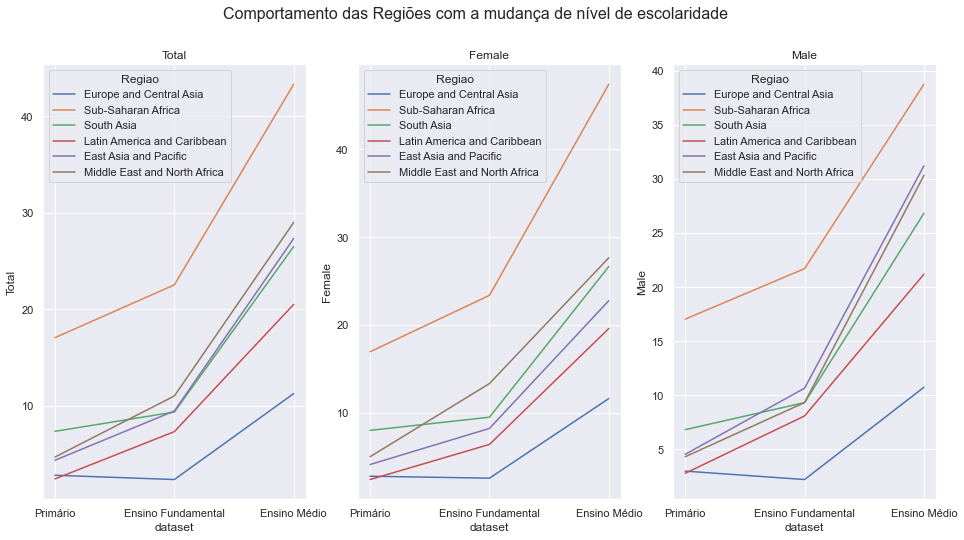

In [154]:
data3= gender[['Regiao', "Development Regions", "Total" , "dataset","Female", "Male"]].groupby(["dataset", "Regiao"], sort=False)[['Total', 'Female', 'Male']].mean()

sns.set_theme(style="darkgrid")

#plt.figure(figsize = (20,18))
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,8))
fig.suptitle('Comportamento das Regiões com a mudança de nível de escolaridade', fontsize=16)
# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="dataset", y="Total",
             hue="Regiao",
             data=data3, ax=axs[0]).set(title='Total')

sns.lineplot(x="dataset", y="Female",
             hue="Regiao",
             data=data3, ax=axs[1]).set(title='Female')

sns.lineplot(x="dataset", y="Male",
             hue="Regiao",
             data=data3, ax=axs[2]).set(title='Male')

**Visualizamos um aumento expressivo tanto na comparação por país quanto por região de crianças fora do colégio. A tendência se mantém ao separarmos os dados por gênero.**

**Por último, comparamos as médias entre os valores percentuais de homens e mulheres fora da escola, agrupando todos os países com dados disponibilizados. Os resultados evidenciaram uma queda nos percentuais durante o ensino fundamental e em seguida um aumento significativo dos índices.**

**Ainda pode-se observar a diferença entre as médias gerais para homens e mulheres, as quais podem ser influenciadas pelos seguintes fatores:**

- No período da transição entre o Fundamental e o Médio, geralmente ocorre o amadurecimento sexual dos jovens e devido a diversos fatores externos e culturais, em casos de gravidez, a maior impactada é a mulher.
- Despriorização em relação a educação da mulher.
- No ensino médio, principalmente em paises menos desenvolvidos, as situações sociais e familiares são favoráveis ao incremento do trabalho por parte dos jovens em busca de complementar a renda familiar.


Text(0.5, 1.0, 'Percentuais Médios de Homens e Mulheres fora da escola por nível de escolaridade.')

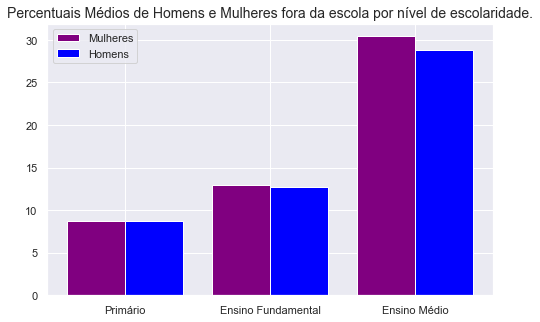

In [155]:
x_c = gender.groupby('dataset', sort=False)['Female'].mean()
y_c = gender.groupby('dataset', sort=False)['Male'].mean()

unit_topics = ['Primário', 'Ensino Fundamental', 'Ensino Médio']

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
# Make your chart here
school_a_x=create_x(2, 0.8, 1, len(x_c))
school_b_x=create_x(2, 0.8, 2, len(y_c))


middle_x = [ (a + b) / 2.0 for a, b in zip(school_a_x, school_b_x)]
plt.figure(figsize=(8,5))
ax=plt.subplot()
plt.bar(school_a_x, x_c, color = 'purple')
plt.bar(school_b_x, y_c, color = 'blue')


ax.set_xticks(middle_x)
ax.set_xticklabels(unit_topics)

plt.legend(['Mulheres', 'Homens'])
plt.title('Percentuais Médios de Homens e Mulheres fora da escola por nível de escolaridade.', fontsize = 14)

### Conclusões finais condição financeira

A medida que a taxa de matrícula vai caindo naturalmente ao longo dos anos, podemos observar que as classes mais pobres são visivelmente mais impactadas com isso. A média de não matrícula em classes inferiores é quase o dobro do que classes mais ricas.  

Text(0.5, 1.0, 'Percentuais por classe econômica por nível de escolaridade')

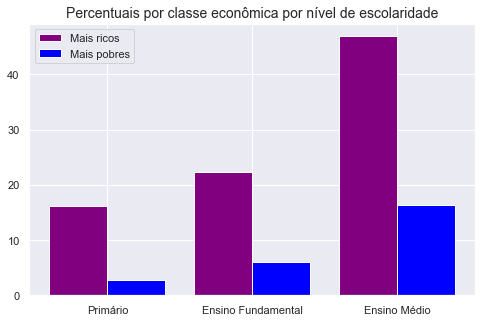

In [156]:
#Concatenação
riquezas = pd.concat([pr_tratados.assign(dataset='Primário'), ls_tratados.assign(dataset='Ensino Fundamental'), us_tratados.assign(dataset='Ensino Médio') ])
x_c = riquezas.groupby('dataset', sort=False)['Poorest_Wealth quintile'].mean()
y_c = riquezas.groupby('dataset', sort=False)['Richest_Wealth quintile'].mean()

unit_topics = ['Primário', 'Ensino Fundamental', 'Ensino Médio']

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
# Make your chart here
school_a_x=create_x(2, 0.8, 1, len(x_c))
school_b_x=create_x(2, 0.8, 2, len(y_c))


middle_x = [ (a + b) / 2.0 for a, b in zip(school_a_x, school_b_x)]
plt.figure(figsize=(8,5))
ax=plt.subplot()
plt.bar(school_a_x, x_c, color = 'purple')
plt.bar(school_b_x, y_c, color = 'blue')


ax.set_xticks(middle_x)
ax.set_xticklabels(unit_topics)

plt.legend(['Mais ricos', 'Mais pobres'])
plt.title('Percentuais por classe econômica por nível de escolaridade', fontsize = 14)

### Conclusões finais desenvolvimento da região

Dada a relação entre IDH e % de crianças fora da escola e o comportamento semelhante dessas duas variáveis distribuídas por região e seu desenvolvimento, acreditamos que existe um forte indicativo que condições de saúde (expectativa de vida) e renda para a população são fatores fundamentais para a maior presença de crianças na escola.
Vemos que os anos finais das crianças na escola são os mais desafiadores para conseguir manter as crianças estudando. Possivelmente isso ocorre porque nessa faixa etária as crianças já começam a trabalhar para ajudar em casa. Drogas e gravidez são outros fatores que podem impactar para não ir à escola nessa idade.
A variabilidade do % de crianças fora da escola das regiões menos desenvolvidas se torna bem maior na última etapa de ensino em relação aos países das regiões desenvolvidas.

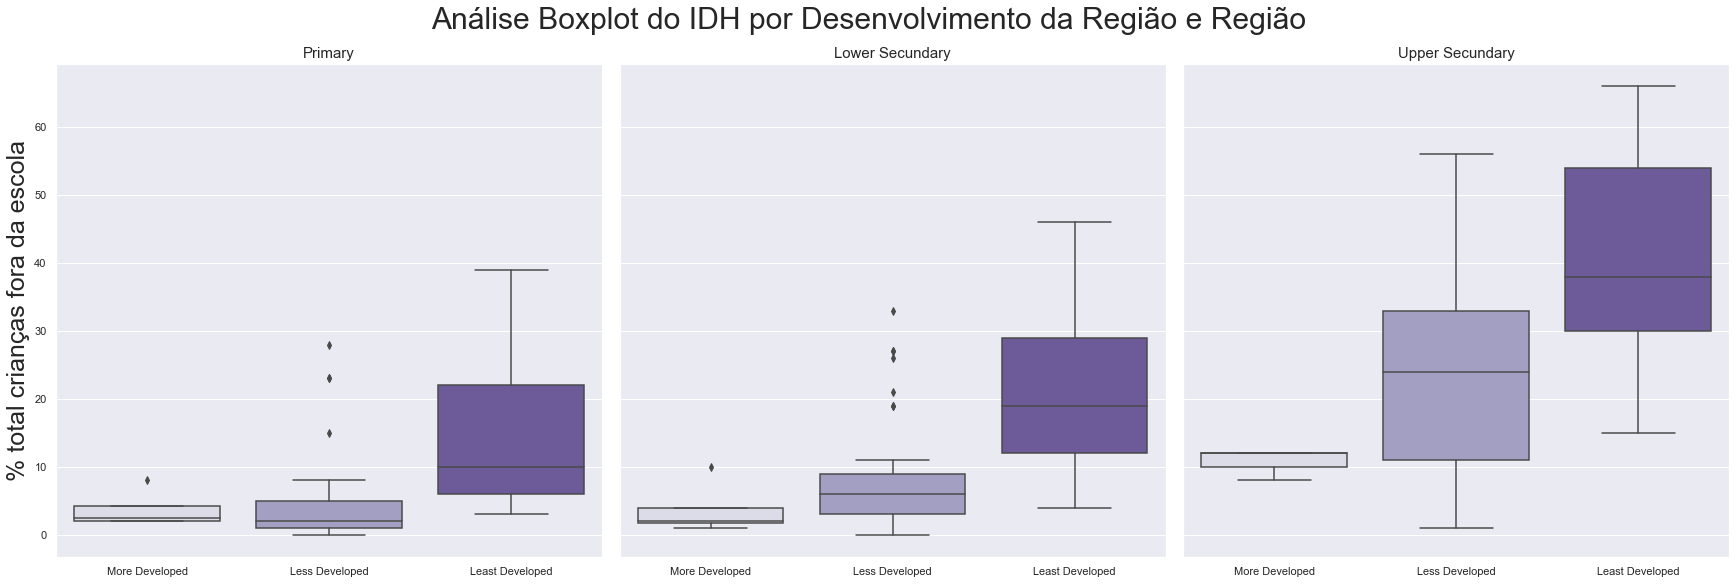

In [157]:
fig, axs = plt.subplots(1, 3, sharey=True, constrained_layout = True, figsize=(24,8)) 
fig.suptitle("Análise Boxplot do IDH por Desenvolvimento da Região e Região", fontsize=30)


sns.boxplot(ax=axs[0], x="Development Regions", y='Total', data=pr_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[0].set_title("Primary", fontsize=15)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% total crianças fora da escola", fontsize=25)

sns.boxplot(ax=axs[1], x="Development Regions", y='Total', data=ls_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[1].set_title("Lower Secundary", fontsize=15)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

sns.boxplot(ax=axs[2], x="Development Regions", y='Total', data=us_tratados, order=['More Developed',  'Less Developed', 'Least Developed'], palette="Purples")
sns.set_style("darkgrid")
axs[2].set_title("Upper Secundary", fontsize=15)
axs[2].set_xlabel(None)
axs[2].set_ylabel(None)

plt.show()